# Import

In [1929]:
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import matplotlib.pyplot as plt
import seaborn as sns


In [2488]:
pd.options.display.float_format = "{:.2f}".format

In [1930]:
import sys
sys.path

['/Users/Thome/Desktop/CoderSchool/Shopee_Phone_EDA/EDA',
 '/Users/thome/.vscode/extensions/ms-toolsai.jupyter-2021.9.1001312534/pythonFiles',
 '/Users/thome/.vscode/extensions/ms-toolsai.jupyter-2021.9.1001312534/pythonFiles/lib/python',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python39.zip',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9/lib-dynload',
 '',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9/site-packages',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9/site-packages/IPython/extensions',
 '/Users/thome/.ipython',
 '/Library/Python/3.8/site-packages',
 '/Library/Python/3.8/site-packages']

In [1931]:
# Để chạy jupyter trên vscode cần add python 3.8
sys.path.append('/Library/Python/3.8/site-packages')
sys.path

['/Users/Thome/Desktop/CoderSchool/Shopee_Phone_EDA/EDA',
 '/Users/thome/.vscode/extensions/ms-toolsai.jupyter-2021.9.1001312534/pythonFiles',
 '/Users/thome/.vscode/extensions/ms-toolsai.jupyter-2021.9.1001312534/pythonFiles/lib/python',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python39.zip',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9/lib-dynload',
 '',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9/site-packages',
 '/Users/thome/opt/anaconda3/envs/shopee_eda/lib/python3.9/site-packages/IPython/extensions',
 '/Users/thome/.ipython',
 '/Library/Python/3.8/site-packages',
 '/Library/Python/3.8/site-packages',
 '/Library/Python/3.8/site-packages']

# Prepare data

Scrape 100 page với gần 6000 sản phẩm trong ngành điện thoại.
Trong đó chỉ có 2078 sản phẩm bàn được nên EDA 2078 sản phẩm này, drop phần còn lại

In [1932]:
overall_data = pd.read_csv('/Users/Thome/Desktop/CoderSchool/Shopee_Phone_EDA/EDA/shopee_phone_final.csv')
overall_data.shape

(2078, 17)

In [1933]:
detailed_500 = pd.read_csv('/Users/Thome/Desktop/CoderSchool/Shopee_Phone_EDA/EDA/detailed_data_500.csv')
detailed_1000 = pd.read_csv('/Users/Thome/Desktop/CoderSchool/Shopee_Phone_EDA/EDA/detailed_data_1000.csv')
detailed_1500 = pd.read_csv('/Users/Thome/Desktop/CoderSchool/Shopee_Phone_EDA/EDA/detailed_data_1500.csv')
detailed_2078 = pd.read_csv('/Users/Thome/Desktop/CoderSchool/Shopee_Phone_EDA/EDA/detailed_data_2078.csv')

df_detailed = [detailed_500, detailed_1000, detailed_1500, detailed_2078]

In [1934]:
# Union data detaild các bảng này lại với nhau
detailed_data = pd.concat(df_detailed)

Merge 2 table: overall and detailed through url
before that, we drop columns unnamed

In [1935]:
overall_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'price_dis', 'price_nondis',
       'freeship', 'rating', 'rating_count', 'monthly_sold', 'store_location',
       'monthly_event', 'favorite_product', 'shopee_mall', 'discount_tag',
       'product_url', 'image', 'ShopDacBiet'],
      dtype='object')

In [1936]:
detailed_data.drop(columns=['Unnamed: 0'], inplace=True)

In [1937]:
overall_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [2659]:
df = pd.merge(detailed_data, overall_data, how='outer', left_on= 'product_url', right_on='product_url')

In [1939]:
df.shape

(2078, 43)

In [2660]:
df.T

0     \
product_url           https://shopee.vn/Mi%E1%BA%BFng-d%C3%A1n-%C4%9...   
name_product          Yêu Thích\nMiếng dán điện thoại may mắn, lung ...   
rating_product                                                     4.83   
rating_count_product                                             673.00   
quantity_5_star                                                     619   
quantity_4_star                                                   12.00   
quantity_3_star                                                     NaN   
quantity_2_star                                                     NaN   
quantity_1_star                                                     NaN   
count_cmt                                                           382   
images_video                                                        313   
sold_out                                                          16,4k   
low_price                                                       6700.00   
hight_price                                                     1400.00   
price                                                               NaN   
inventory                                                         21699   
return_7_days                                                       NaN   
authentic                                                           NaN   
freeship_x                                                          NaN   
shopee_guaranteed                           3 Ngày Trả Hàng / Hoàn Tiền   
company                                             Tổng kho hàng China   
shop_name                                               hung_pham130217   
shopee_mall_x                                                     False   
shop_total_review                                                  1,5k   
total_products                                                       14   
response_rate                                                       97%   
time_response                                             trong vài giờ   
years_ex                                                 28 tháng trước   
follower                                                           3,3k   
name                  Miếng dán điện thoại may mắn, lung linh phù hợ...   
price_dis                                                         1.400   
price_nondis                                            ₫1.400 - ₫6.700   
freeship_y                                                         True   
rating                                                             4.83   
rating_count                                                     616.00   
monthly_sold                                                 5,4k/tháng   
store_location                                                  Lào Cai   
monthly_event                                                     False   
favorite_product                                              Yêu thích   
shopee_mall_y                                                     False   
discount_tag                                                        NaN   
image                 https://cf.shopee.vn/file/cd7f36d677941ad531a8...   
ShopDacBiet                                                       False   

                                                                   1     \
product_url           https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...   
name_product          Điện thoại Vivo Y20 (2021) 4GB + 64GB - Hàng c...   
rating_product                                                     4.95   
rating_count_product                                             978.00   
quantity_5_star                                                     954   
quantity_4_star                                                    7.00   
quantity_3_star                                                     NaN   
quantity_2_star                                                     NaN   
quantity_1_star                                                     NaN   
count_cmt       

# Clean data

## Remove unwanted - columns

In [2060]:
df.columns

Index(['product_url', 'name_product', 'rating_product', 'rating_count_product',
       'quantity_5_star', 'quantity_4_star', 'quantity_3_star',
       'quantity_2_star', 'quantity_1_star', 'count_cmt', 'images_video',
       'sold_out', 'low_price', 'hight_price', 'price', 'inventory',
       'return_7_days', 'authentic', 'freeship_x', 'shopee_guaranteed',
       'company', 'shop_name', 'shopee_mall_x', 'shop_total_review',
       'total_products', 'response_rate', 'time_response', 'years_ex',
       'follower', 'name', 'price_dis', 'price_nondis', 'freeship_y', 'rating',
       'rating_count', 'monthly_sold', 'store_location', 'monthly_event',
       'favorite_product', 'shopee_mall_y', 'discount_tag', 'image',
       'ShopDacBiet'],
      dtype='object')

In [2061]:
df.drop(columns=['name_product', 'price_dis', 'price_nondis', 'freeship_y', 'rating', 'rating_count', 'shopee_mall_y', 'image', 'quantity_5_star', 'quantity_4_star', 'quantity_3_star', 'quantity_2_star', 'quantity_1_star', 'count_cmt', 'images_video'], inplace = True)

In [1942]:
df.shape

(2078, 28)

In [1943]:
df.T

0     \
product_url           https://shopee.vn/Mi%E1%BA%BFng-d%C3%A1n-%C4%9...   
rating_product                                                     4.83   
rating_count_product                                              673.0   
sold_out                                                          16,4k   
low_price                                                        6700.0   
hight_price                                                      1400.0   
price                                                               NaN   
inventory                                                         21699   
return_7_days                                                       NaN   
authentic                                                           NaN   
freeship_x                                                          NaN   
shopee_guaranteed                           3 Ngày Trả Hàng / Hoàn Tiền   
company                                             Tổng kho hàng China   
shop_name                                               hung_pham130217   
shopee_mall_x                                                     False   
shop_total_review                                                  1,5k   
total_products                                                       14   
response_rate                                                       97%   
time_response                                             trong vài giờ   
years_ex                                                 28 tháng trước   
follower                                                           3,3k   
name                  Miếng dán điện thoại may mắn, lung linh phù hợ...   
monthly_sold                                                 5,4k/tháng   
store_location                                                  Lào Cai   
monthly_event                                                     False   
favorite_product                                              Yêu thích   
discount_tag                                                        NaN   
ShopDacBiet                                                       False   

                                                                   1     \
product_url           https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...   
rating_product                                                     4.95   
rating_count_product                                              978.0   
sold_out                                                           4,9k   
low_price                                                           NaN   
hight_price                                                         NaN   
price                                                         3990000.0   
inventory                                                          1711   
return_7_days                                  7 ngày miễn phí trả hàng   
authentic                                          Hàng chính hãng 100%   
freeship_x                                          Miễn phí vận chuyển   
shopee_guaranteed                                                   NaN   
company                                             VIVO OFFICIAL STORE   
shop_name                                        vivo_official_store_vn   
shopee_mall_x                                                      True   
shop_total_review                                                  6,7k   
total_products                                                       28   
response_rate                                                      100%   
time_response                                             trong vài giờ   
years_ex                                                    3 năm trước   
follower                                                         170,5k   
name                  Điện thoại Vivo Y20 (2021) 4GB + 64GB - Hàng c...   
monthly_sold                                                 1,8k/tháng   
store_location                                          TP. Hồ Chí Minh   
monthly_event   

## Work with missing values

In [2062]:
df.fillna('unknown', inplace=True)

In [2063]:
df_test = df.copy()

Work with numerical columns:
1. inventory            - dtype
2. total_products        - dtype
3. response_rate        - dtype
4. years_ex             - calculate
5. monthly_sold         - calculate
6. discount_tag         - calculate
7. sold_out             - calculate
8. shop_total_review   - calculate

### Inventory

In [1946]:
df_test['inventory'].unique()

array([21699, 1711, 0, 19190, 42, 47327, 68, 223, 1046, 51, 30, 3, 118,
       54, 4733, 109, 4, 9, 6210, 628, 14, 25, 666, 121, 144, 1613, 227,
       4355, 274, 75, 390, 728, 1708, 1, 899, 96, 17, 393, 6, 26, 266,
       36594, 5332, 504, 34, 23, 46, 22, 39935, 1365, 49949, 134, 28973,
       4171, 44, 971, 5, 2126, 299, 388, 3885, 2793, 596, 61, 569, 173,
       295, 4802, 31, 20056, 145, 119, 28, 100711, 1544, 398, 236, 2, 256,
       90, 328, 380, 15, 140, 20971, 471, 6410, 73, 906, 27, 419, 192,
       807, 609, 87, 10, 126, 110, 106, 39, 916, 3810, 1638, 269, 97, 238,
       2768, 2775, 37, 570, 86, 1578, 524, 2848, 177, 234, 11, 351, 13,
       11176, 25865, 311, 72, 8, 10665, 927, 156, 2895, 267, 56, 3768,
       1751, 18, 372473, 113, 130, 546, 427, 89, 9879, 793, 1580, 175,
       105, 24, 150, 79, 979, 71, 2995, 21, 1917, 3647, 135, 92, 1591,
       10079, 1176, 2343, 29, 10402, 45, 9665, 7, 455, 1154, 50, 148, 83,
       1777, 2717, 3383, 65, 283, 69978, 70, 9378, 18877, 1

In [2064]:
df_test[df_test['inventory'] == 'Số Lượng']

product_url rating_product  \
1552  https://shopee.vn/Main-7plus-kh%C3%B4ng-%E1%BB...        unknown   

     rating_count_product sold_out low_price hight_price     price inventory  \
1552              unknown        1   unknown     unknown  199999.0  Số Lượng   

     return_7_days authentic  ...  time_response        years_ex follower  \
1552       unknown   unknown  ...  trong vài giờ  25 tháng trước       30   

                                           name monthly_sold store_location  \
1552  Main 7plus không ổ cứng cắm máy tính nhận      1/tháng       Tây Ninh   

     monthly_event favorite_product discount_tag ShopDacBiet  
1552         False          unknown      unknown       False  

[1 rows x 28 columns]

In [2065]:
df_test.drop([1552], inplace=True)

In [2066]:
def inventory(series):
    if series == 'unknown':
        return 0.0
    else:
        return float(series)

In [2067]:
df_test['inventory'] = df_test['inventory'].apply(inventory)

In [1955]:
df_test['inventory'] 

0       21699.0
1        1711.0
2           0.0
3       19190.0
4          42.0
         ...   
2073        0.0
2074        0.0
2075        0.0
2076        0.0
2077        0.0
Name: inventory, Length: 2077, dtype: float64

Apply on data frame got bug

In [703]:
def numerical(row):
    
    # total_products
    i =  row['total_products']
    if ',' in i or 'k' in i:
            i = i.replace(',', '.').strip('k')
            i = float(i)*1000
    else:
            i = float(i)
           

    # response_rate
    j = row['response_rate']
    j = float(j.strip('%'))/100
        

    # change year experience to month experince
    y = row['years_ex']
    if "ngày trước" in y:
        y = round(float(y.strip(" ngày trước"))/30, 1)
    elif "tháng trước" in y:
        y = float(y.strip(" tháng trước"))
    else:
        y = float(y.strip(" năm trước"))*12


    # monthly_sold
    s = row['monthly_sold']
    s = s.strip('/tháng')
    if 'k' in s:
        try:
            s = float(s.replace(',', '.').strip('k'))*1000
        except:
            s = float(s.trip('k'))*1000
    else:
        s = float(s)


    # discount_tag
    dis = row['discount_tag']
    if dis != 'nan':
        dis = float(str(dis).strip("%\nGIẢM"))/100


    # sold_out
    so = row['sold_out']
    if 'k' in so:
            try:
                so = float(so.replace(',', '').strip('k'))*1000
            except:
                so = float(so.strip('k'))*1000
    else:
            so = float(so)
    

    # shop_total_review
    views = row['shop_total_review']
    if 'k' in views:
            try:
                views = float(views.replace(',', '').strip('k'))*1000
            except:
                views = float(views.strip('k'))*1000
    else:
            views = float(views)

### Total_products

In [1957]:
def total_products(series):
    
        # total_products
        i =  series
        if i == 'unknown':
                return 0.0
                
        if ',' in i or 'k' in i:
                i = i.replace(',', '.').strip('k')
                i = float(i)*1000
                return i
        else:
                i = float(i)
                return i

In [2068]:
df_test['total_products'] = df_test['total_products'].apply(total_products)

In [1959]:
df_test['total_products']

0        14.0
1        28.0
2       129.0
3        29.0
4       367.0
        ...  
2073      0.0
2074      0.0
2075      0.0
2076      0.0
2077      0.0
Name: total_products, Length: 2077, dtype: float64

### Response_rate

In [1960]:
df_test['response_rate'].unique()

array(['97%', '100%', '99%', '17%', '83%', '96%', '95%', '90%', '88%',
       '98%', '86%', '87%', '74%', '63%', '65%', '93%', '84%', '57%',
       '70%', '92%', '76%', '94%', '48%', '75%', '73%', '89%', '12%',
       '60%', '18%', '79%', '47%', '69%', '30%', '71%', '8%', '53%',
       '66%', '7%', '81%', '34%', '55%', '59%', '61%', '24%', '85%',
       '67%', '91%', '50%', '80%', '27%', '51%', '78%', '77%', '33%',
       '64%', '68%', '62%', '72%', '46%', '11%', '22%', '5%', '1%', '23%',
       '82%', '39%', '19%', '28%', '52%', '42%', '36%', '37%', '45%',
       '13%', '54%', '41%', '21%', '32%', '26%', '29%', '2%', '44%',
       '38%', '15%', '25%', '10%', '31%', '43%', '3%', '56%', '49%',
       '35%', '14%', '6%', '20%', '40%', 'unknown'], dtype=object)

In [1961]:
def response_rate(series):
    j = series
    if j == 'unknown':
        return 0.0
    else:
        j = float(j.strip('%'))/100
        return j

In [2069]:
df_test['response_rate'] = df_test['response_rate'].apply(response_rate)

In [1963]:
df_test['response_rate']

0       0.97
1       1.00
2       0.99
3       0.17
4       0.99
        ... 
2073    0.00
2074    0.00
2075    0.00
2076    0.00
2077    0.00
Name: response_rate, Length: 2077, dtype: float64

### Years experience

In [1815]:
df_test['years_ex'].unique()

array(['28 tháng trước', '3 năm trước', '18 tháng trước', '6 năm trước',
       '4 tháng trước', '24 tháng trước', '31 tháng trước', '4 năm trước',
       '19 tháng trước', '23 tháng trước', '25 tháng trước',
       '7 tháng trước', '11 tháng trước', '17 tháng trước',
       '5 tháng trước', '20 tháng trước', '2 tháng trước',
       '35 tháng trước', '34 tháng trước', '3 tháng trước',
       '15 tháng trước', '55 ngày trước', '22 tháng trước',
       '30 tháng trước', '5 năm trước', '8 tháng trước', '31 ngày trước',
       '6 tháng trước', '10 tháng trước', '29 tháng trước',
       '12 tháng trước', '44 ngày trước', '33 tháng trước',
       '16 tháng trước', '13 tháng trước', '21 tháng trước',
       '14 tháng trước', '58 ngày trước', '9 tháng trước',
       '32 tháng trước', '36 tháng trước', '26 tháng trước',
       '27 tháng trước', '17 ngày trước', '45 ngày trước',
       '39 ngày trước', '32 ngày trước', '56 ngày trước', '25 ngày trước',
       'unknow'], dtype=object)

In [1964]:
def years_ex(series):

# change year experience to month experince
    y = series
    if y == 'unknown':
        return 0.0
    elif "ngày trước" in y:
        y = round(float(y.strip(" ngày trước"))/30, 1)
        return y
    elif "tháng trước" in y:
        y = float(y.strip(" tháng trước"))
        return y
    else:
        y = float(y.strip(" năm trước"))*12
        return y

In [2070]:
df_test['years_ex'] = df_test['years_ex'].apply(years_ex)

In [1966]:
df_test['years_ex'].unique()

array([28. , 36. , 18. , 72. ,  4. , 24. , 31. , 48. , 19. , 23. , 25. ,
        7. , 11. , 17. ,  5. , 20. ,  2. , 35. , 34. ,  3. , 15. ,  1.8,
       22. , 30. , 60. ,  8. ,  1. ,  6. , 10. , 29. , 12. ,  1.5, 33. ,
       16. , 13. , 21. , 14. ,  1.9,  9. , 32. , 26. , 27. ,  0.6,  1.3,
        1.1,  0.8,  0. ])

### Monthly sold

In [1821]:
df_test['monthly_sold'].unique()

array(['5,4k/tháng', '1,8k/tháng', '1,1k/tháng', '763/tháng', '715/tháng',
       '677/tháng', '665/tháng', '599/tháng', '564/tháng', '534/tháng',
       '490/tháng', '324/tháng', '321/tháng', '281/tháng', '271/tháng',
       '270/tháng', '204/tháng', '199/tháng', '194/tháng', '186/tháng',
       '174/tháng', '164/tháng', '155/tháng', '153/tháng', '162/tháng',
       '152/tháng', '147/tháng', '140/tháng', '139/tháng', '129/tháng',
       '130/tháng', '124/tháng', '115/tháng', '159/tháng', '104/tháng',
       '103/tháng', '110/tháng', '101/tháng', '100/tháng', '99/tháng',
       '95/tháng', '89/tháng', '84/tháng', '82/tháng', '81/tháng',
       '79/tháng', '367/tháng', '71/tháng', '70/tháng', '67/tháng',
       '68/tháng', '63/tháng', '62/tháng', '60/tháng', '61/tháng',
       '59/tháng', '56/tháng', '1k/tháng', '828/tháng', '54/tháng',
       '53/tháng', '52/tháng', '50/tháng', '51/tháng', '108/tháng',
       '49/tháng', '48/tháng', '46/tháng', '45/tháng', '44/tháng',
       '43/tháng'

In [1967]:
def monthly_sold(series):
    # monthly_sold
    s = series
    s = s.strip('/tháng')
    if 'k' in s:
        try:
            s = float(s.replace(',', '.').strip('k'))*1000
            return s
        except:
            s = float(s.trip('k'))*1000
            return s
    else:
        s = float(s)
        return s

In [2071]:
df_test['monthly_sold'] = df_test['monthly_sold'].apply(monthly_sold)

In [1969]:
df_test['monthly_sold']

0       5400.0
1       1800.0
2       1100.0
3        763.0
4        715.0
         ...  
2073       1.0
2074       1.0
2075       1.0
2076       1.0
2077       1.0
Name: monthly_sold, Length: 2077, dtype: float64

### Discount tag

In [1970]:
df_test['discount_tag'].unique()

array(['unknown', '15%\nGIẢM', '36%\nGIẢM', '50%\nGIẢM', '47%\nGIẢM',
       '4%\nGIẢM', '24%\nGIẢM', '7%\nGIẢM', '20%\nGIẢM', '19%\nGIẢM',
       '48%\nGIẢM', '44%\nGIẢM', '43%\nGIẢM', '8%\nGIẢM', '17%\nGIẢM',
       '31%\nGIẢM', '25%\nGIẢM', '18%\nGIẢM', '49%\nGIẢM', '12%\nGIẢM',
       '32%\nGIẢM', '5%\nGIẢM', '13%\nGIẢM', '9%\nGIẢM', '6%\nGIẢM',
       '14%\nGIẢM', '29%\nGIẢM', '11%\nGIẢM', '3%\nGIẢM', '28%\nGIẢM',
       '41%\nGIẢM', '34%\nGIẢM', '33%\nGIẢM', '22%\nGIẢM', '16%\nGIẢM',
       '35%\nGIẢM', '38%\nGIẢM', '1%\nGIẢM', '23%\nGIẢM', '27%\nGIẢM',
       '2%\nGIẢM', '26%\nGIẢM', '45%\nGIẢM', '30%\nGIẢM', '10%\nGIẢM',
       '46%\nGIẢM', '40%\nGIẢM', '37%\nGIẢM', '42%\nGIẢM', '21%\nGIẢM',
       '39%\nGIẢM', '70%\nGIẢM'], dtype=object)

In [1971]:
def discount_tag(series):    
    # discount_tag
    dis = series
    if dis != 'unknown':
        dis = float(str(dis).strip("%\nGIẢM"))/100
        return dis
    else:
        return 0.0

In [2072]:
df_test['discount_tag'] = df_test['discount_tag'].apply(discount_tag)


In [1973]:
df_test['discount_tag']

0       0.00
1       0.15
2       0.36
3       0.00
4       0.00
        ... 
2073    0.38
2074    0.00
2075    0.00
2076    0.00
2077    0.00
Name: discount_tag, Length: 2077, dtype: float64

### Sold out

In [1832]:
df_test['sold_out'].unique()

array(['16,4k', '4,9k', '3,5k', '767', '2,6k', '5k', '9,2k', '1,1k',
       '4,2k', '965', '781', '10,5k', '701', '3,7k', '5,8k', '3,1k',
       '270', '212', '1,6k', '667', '650', '603', '392', '256', '1,2k',
       '335', '176', '2,5k', '227', '566', '1,7k', '167', '2,8k', '169',
       '495', '418', '217', '164', '778', '175', '100', '141', '2,2k',
       '791', '328', '2,4k', '239', '368', '1,8k', '647', '907', '126',
       '595', '745', '572', '60', '61', '133', '236', '115', '799', '293',
       '137', '53', '118', '259', '209', '211', '63', '830', '720', '441',
       '315', '128', '796', '65', '210', '99', '251', '260', '83', '114',
       '588', '76', '733', '411', '344', '159', '45', '417', '350', '434',
       '503', '323', '7,2k', '452', '59', '44', '57', '34', '284', '186',
       '69', '41', '33', '592', '204', '337', '94', '73', '292', '397',
       '1,5k', '30', '356', '29', '484', '506', '48', '709', '149', '191',
       '276', '111', '36', '26', '333', '113', '123', 

In [1974]:
def sold_out(serise):
    # sold_out
    so = serise
    if so == 'unknown':
        return 0.0

    elif 'k' in so:
            try:
                so = float(so.replace(',', '').strip('k'))*1000
                return so
            except:
                so = float(so.strip('k'))*1000
                return so

    else:
            so = float(so)
            return so

In [2073]:
df_test['sold_out'] = df_test['sold_out'].apply(sold_out)

In [1976]:
df_test['sold_out']

0       164000.0
1        49000.0
2        35000.0
3          767.0
4        26000.0
          ...   
2073         0.0
2074         0.0
2075         0.0
2076         0.0
2077         0.0
Name: sold_out, Length: 2077, dtype: float64

### Total_reivew

In [1839]:
df_test['shop_total_review'].unique()

array(['1,5k', '6,7k', '18,5k', '25', '39,7k', '3,6k', '22,5k', '547',
       '19,8k', '3,5k', '29k', '304', '3,8k', '7,2k', '1,3k', '22k',
       '2,9k', '1,1k', '2,5k', '616', '18,6k', '68', '6,9k', '36k', '871',
       '2,7k', '5,9k', '866', '37,6k', '10,1k', '1,4k', '3,2k', '5,2k',
       '718', '194', '2k', '724', '29', '250', '527', '22', '435', '220',
       '1,2k', '1,7k', '316', '281', '5,6k', '290', '265', '112', '75',
       '3,7k', '45', '3', '13', '3,1k', '4,8k', '164', '661', '6,8k',
       '459', '207,1k', '351', '28,5k', '593', '11', '231', '27,6k',
       '5,5k', '6,4k', '239', '576', '100', '266', '340', '457', '32,9k',
       '649', '897', '199', '122', '12', '706', '65', '156', '4,5k',
       '1,8k', '205', '1,6k', '90', '157', '3,3k', '19', '1,9k', '854',
       '14,3k', '197', '908', '4,7k', '2,8k', '131', '662', '274', '30',
       '9k', '90,6k', '7,3k', '471', '560', '539', '898', '568', '531',
       '407', '856', '2,3k', '402', '295', '405', '86', '74', '298',

In [1977]:
def total_review(series):

    # shop_total_review
    views = series
    if views == 'unknown':
        return 0.0
    elif 'k' in views:
            try:
                views = float(views.replace(',', '').strip('k'))*1000
                return views
            except:
                views = float(views.strip('k'))*1000
                return views

    else:
            views = float(views)
            return views

In [2074]:
df_test['shop_total_review'] = df_test['shop_total_review'].apply(total_review)

In [1979]:
df_test['shop_total_review']

0        15000.0
1        67000.0
2       185000.0
3           25.0
4       397000.0
          ...   
2073         0.0
2074         0.0
2075         0.0
2076         0.0
2077         0.0
Name: shop_total_review, Length: 2077, dtype: float64

### Shopee mall, monthly event, special shop

Encoder True = 1 and false = 2

In [1844]:
df_test['shopee_mall_x'].unique()

array([False, True, 'unknow'], dtype=object)

In [1980]:
def auto_encode(series):
    if series  == True:
            series = 1
            return series
    elif series == False:
            series = 0
            return series
    else:  
            return 0.0



In [2075]:
df_test['shopee_mall_x'] = df_test['shopee_mall_x'].apply(auto_encode)
df_test['monthly_event'] = df_test['monthly_event'].apply(auto_encode)
df_test['ShopDacBiet'] = df_test['ShopDacBiet'].apply(auto_encode)

In [1982]:
df_test['shopee_mall_x']

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
2073    0.0
2074    0.0
2075    0.0
2076    0.0
2077    0.0
Name: shopee_mall_x, Length: 2077, dtype: float64

In [1984]:
df_test['monthly_event']

0       0
1       1
2       1
3       0
4       1
       ..
2073    0
2074    0
2075    1
2076    1
2077    1
Name: monthly_event, Length: 2077, dtype: int64

In [1985]:
df_test['ShopDacBiet']

0       0
1       0
2       0
3       0
4       0
       ..
2073    0
2074    0
2075    0
2076    0
2077    1
Name: ShopDacBiet, Length: 2077, dtype: int64

### Price

Fill low price, high price  unknown equal 0
Calculate price NaN = mean(low+high)/2

In [2076]:
def low_high_price(series):
    if series == 'unknown':
        return 0.0
    else:
        return float(series)

In [2077]:
df_test['low_price'] = df_test['low_price'].apply(low_high_price)
df_test['high_price'] = df_test['hight_price'].apply(low_high_price)

In [2078]:
def price_calculate(row):
    if row['price'] == 'unknown':
        row['price'] = (float(row['low_price']) + float(row['high_price']))/2
        return row['price']
    else:
        return float(row['price'])


In [2079]:
df_test['price'] = df_test.apply(price_calculate, axis=1)


In [2017]:
df_test['price']

0           4050.0
1        3990000.0
2       17990000.0
3         239000.0
4        3490000.0
           ...    
2073           0.0
2074           0.0
2075           0.0
2076           0.0
2077           0.0
Name: price, Length: 2078, dtype: float64

### Final price work with discount tag

In [2036]:
df_test['discount_tag'].unique()

array([0.  , 0.15, 0.36, 0.5 , 0.47, 0.04, 0.24, 0.07, 0.2 , 0.19, 0.48,
       0.44, 0.43, 0.08, 0.17, 0.31, 0.25, 0.18, 0.49, 0.12, 0.32, 0.05,
       0.13, 0.09, 0.06, 0.14, 0.29, 0.11, 0.03, 0.28, 0.41, 0.34, 0.33,
       0.22, 0.16, 0.35, 0.38, 0.01, 0.23, 0.27, 0.02, 0.26, 0.45, 0.3 ,
       0.1 , 0.46, 0.4 , 0.37, 0.42, 0.21, 0.39, 0.7 ])

In [2080]:
def final_price(row):
    if row['discount_tag'] != 0.00:
        row['price'] = row['price'] * (1 - float(row['discount_tag']))
        return row['price']
    else:
        return row['price']

In [2040]:
df_test.iloc[2073]

product_url             https://shopee.vn/%E1%BB%90p-IPHONE-g%E1%BA%A5...
rating_product                                                    unknown
rating_count_product                                              unknown
sold_out                                                              0.0
low_price                                                             0.0
hight_price                                                       unknown
price                                                                 0.0
inventory                                                             0.0
return_7_days                                                     unknown
authentic                                                         unknown
freeship_x                                                        unknown
shopee_guaranteed                                                 unknown
company                                                           unknown
shop_name                             

In [2081]:
df_test['price'] = df_test.apply(final_price, axis=1)


In [2042]:
df_test['price']

0           4050.0
1        3391500.0
2       11513600.0
3         239000.0
4        3490000.0
           ...    
2073           0.0
2074           0.0
2075           0.0
2076           0.0
2077           0.0
Name: price, Length: 2077, dtype: float64

### Favorite product

Change favorite_product:
Yêu thích - 1
NaN - 0

In [2083]:
df_test['favorite_product'].unique()

array(['Yêu thích', 'unknown'], dtype=object)

In [2082]:
def favorite_product(series):
    if series != 'unknown':
        series = 1
        return series
    else:
        series = 0
        return series

In [2085]:
df_test['favorite_product'] = df_test['favorite_product'].apply(favorite_product)

In [2086]:
df_test['favorite_product'].unique()

array([1, 0])

### time_response:

Change time_response:
+ unknown -         -1
+ trong vài giờ -    0
+ trong vài phút -   1

In [2047]:
df_test['time_response'].unique()

array(['trong vài giờ', 'trong vài phút', 'unknown'], dtype=object)

In [2087]:
def time_response(series):
    if series == 'unknown':
        return -1
    elif series == 'trong vài giờ':
        return 0
    elif series == 'trong vài phút':
        return 1

In [2088]:
df_test['time_response'] = df_test['time_response'].apply(time_response)

In [2050]:
df_test['time_response'].apply(time_response)

0       0
1       0
2       0
3       0
4       0
       ..
2073   -1
2074   -1
2075   -1
2076   -1
2077   -1
Name: time_response, Length: 2077, dtype: int64

### follower

In [2052]:
df_test['follower'].unique()

array(['3,3k', '170,5k', '311,3k', '2,6k', '342,2k', '43k', '141,1k',
       '125,6k', '4,5k', '30,6k', '194', '2,8k', '246,6k', '5,1k',
       '26,4k', '91,8k', '4,6k', '3,7k', '481', '17,6k', '621', '66',
       '11,3k', '79,7k', '1,8k', '20,8k', '60,1k', '44,5k', '1,2k',
       '44,6k', '22,1k', '63,1k', '10k', '3,1k', '118', '4,8k', '1,6k',
       '5,6k', '1,3k', '192', '2,9k', '34', '474', '9,4k', '7,2k',
       '60,9k', '15,4k', '399,4k', '3,5k', '2,7k', '12,2k', '4,2k', '52',
       '246,7k', '50k', '3,6k', '24,5k', '482', '14k', '44', '21', '3,8k',
       '15,1k', '22k', '13,9k', '18', '278', '6,1k', '4,7k', '24,2k',
       '1,1k', '9,7k', '67k', '8,9k', '20', '15', '25,2k', '9,6k', '5,2k',
       '50,1k', '5k', '10,9k', '4,1k', '20,3k', '380', '577', '2,2k',
       '25', '322', '769', '342k', '111', '2,3k', '12,4k', '2k', '73',
       '177', '414', '2,5k', '11,4k', '15,5k', '673', '12,7k', '311,4k',
       '895', '483', '415', '435', '11,9k', '24,1k', '8,5k', '11,1k',
       '

In [2089]:
def follower(series):
    if series == 'unknown':
        return 0
    elif 'k' in series:
        series = float(series.replace(',', '.').strip('k'))*1000
        return series
    else:
        series = float(series)
        return series

In [2090]:
df_test['follower'] = df_test['follower'].apply(follower)

In [2055]:
df_test['follower'].apply(follower)

0         3300.0
1       170500.0
2       311300.0
3         2600.0
4       342200.0
          ...   
2073         0.0
2074         0.0
2075         0.0
2076         0.0
2077         0.0
Name: follower, Length: 2077, dtype: float64

### shopee_guaranteed

In [2371]:
df_test['shopee_guaranteed'].unique()

array(['3 Ngày Trả Hàng / Hoàn Tiền', 'unknown'], dtype=object)

In [2372]:
def shopee_guaranteed(series):
    if series == 'unknown':
        return 0
    else:
        return 1


In [2374]:
df_test['shopee_guaranteed'] = df_test['shopee_guaranteed'].apply(shopee_guaranteed)

### Clear name and define where is phone

In [2099]:
def lower_name(series):
    series = series.lower()
    return series

In [2375]:
df_test_2 = df_test.copy()

In [2376]:
df_test_2['name'] = df_test_2['name'].apply(lower_name)

In [2287]:
name_remove_1 = ['miếng', 'tài', 'tai', 'jack', 
                'vỏ', 'ốp', 'khăn', 'đồng', 'main', 
                'phím', 'đỡ', 'nút', 'mic', 'nắp',
                'loa', 'móc', 'quả',
                'quạt']

In [2335]:
df_test_2[df_test_2['name'].str.contains('ốp', regex=True)]['name']

188     điện thoại oppo a7x (oppo f9 ) ram 4/128g hàng...
190     điện thoại oppo a1k ram 3gb-32 gb tặng kèm ốp ...
196     💥 free ship💥điện thoại vivo y53 ram 2gb, rom 1...
353     điện thoại google pixel 2 - snap 835 , tặng ốp...
368                  trâu vàng, mèo vàng để ốp điện thoại
378         điện thoại mini kiểu dáng s8 tặng kèm ốp lưng
462     freeship đơn 99k_ốp silicon xiaomi redmi note ...
486     điện thoại oneplus 8t - ram 8/128gb fullbox li...
556     điện thoại xiaomi redmi k40 pro - ram 6-128gb ...
636     ốp lưng nokia 8.1(nokia x7),nokia 5.1 plus(nok...
702     điện thoại cũ samsung j7 prime ram 3g tặng kèm...
757     ốp lưng nokia 8.1(nokia x7),nokia 5.1 plus(nok...
804     điện thoại baby hình gấu [ hot trend hỗ trợ đị...
823     ốp điện thoại iphone em về tinh khôi- odt17 (k...
868     điện thoại smartphone masstel q3 màn hình 5inc...
884                    ốp iphone - ốp viền màu phản quang
946     ốp lưng samsung s21 s21 plus s21 ultra ốp nhám...
1103          

In [2379]:
import numpy as np
for i in name_remove_1:
    a = df_test_2['name'].str.contains(i, regex=True)
    df_test_2['name'] = np.where(a, 'unknown', df_test_2['name'])
    print(df_test_2['name'])
    


0                                                 unknown
1       điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...
2                                    apple iphone 11 64gb
3       [hàng chính hãng 100%] nokia 1280, điện thoại ...
4       điện thoại samsung galaxy m12 (3gb/32gb) - hãn...
                              ...                        
2073    【hàng zin 100%】điện thoại cổ nokia 1280 đen có...
2074        ốp iphone gấu nâu phối dây xích nhựa hologram
2075    siêu ưu đãi kyocera miraie kc01- điện thoại nh...
2076                                              unknown
2077                                              unknown
Name: name, Length: 2077, dtype: object
0                                                 unknown
1       điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...
2                                    apple iphone 11 64gb
3       [hàng chính hãng 100%] nokia 1280, điện thoại ...
4       điện thoại samsung galaxy m12 (3gb/32gb) - hãn...
                              ..

### Calculate total revenue, monthly revenue

In [2380]:
df_test_2['monthly_revenue'] = df_test_2['price'] * df_test_2['monthly_sold']
df_test_2['total_revenue'] = df_test_2['price'] * df_test_2['sold_out']

### Check and drop columns

In [2381]:
df_test_3 = df_test_2.copy()

In [2382]:
df_test_3.columns

Index(['product_url', 'rating_product', 'rating_count_product', 'sold_out',
       'low_price', 'hight_price', 'price', 'inventory', 'return_7_days',
       'authentic', 'freeship_x', 'shopee_guaranteed', 'company', 'shop_name',
       'shopee_mall_x', 'shop_total_review', 'total_products', 'response_rate',
       'time_response', 'years_ex', 'follower', 'name', 'monthly_sold',
       'store_location', 'monthly_event', 'favorite_product', 'discount_tag',
       'ShopDacBiet', 'high_price', 'monthly_revenue', 'total_revenue'],
      dtype='object')

In [2383]:
df_test_3.drop(columns=['low_price', 'hight_price', 'return_7_days', 'authentic', 'freeship_x', 'high_price', ], inplace=True)

Reset index, columns

In [2384]:
df_test_3.columns

Index(['product_url', 'rating_product', 'rating_count_product', 'sold_out',
       'price', 'inventory', 'shopee_guaranteed', 'company', 'shop_name',
       'shopee_mall_x', 'shop_total_review', 'total_products', 'response_rate',
       'time_response', 'years_ex', 'follower', 'name', 'monthly_sold',
       'store_location', 'monthly_event', 'favorite_product', 'discount_tag',
       'ShopDacBiet', 'monthly_revenue', 'total_revenue'],
      dtype='object')

In [2385]:
columns_order = ['name', 'price', 'sold_out', 'monthly_sold', 'monthly_revenue', 'total_revenue', 'rating_product',         # product
                'rating_count_product', 'inventory', 'monthly_event', 'favorite_product', 'discount_tag',                   # product
                'company', 'shop_name', 'shopee_mall_x', 'shopee_guaranteed', 'shop_total_review', 'total_products',        # shop
                 'response_rate', 'time_response', 'years_ex', 'follower', 'store_location', 'ShopDacBiet', 'product_url']  # shop

In [2386]:
df_test_3 = df_test_3.reindex(columns=columns_order)

## Check data type

In [2387]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2077
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2077 non-null   object 
 1   price                 2077 non-null   float64
 2   sold_out              2077 non-null   float64
 3   monthly_sold          2077 non-null   float64
 4   monthly_revenue       2077 non-null   float64
 5   total_revenue         2077 non-null   float64
 6   rating_product        2077 non-null   object 
 7   rating_count_product  2077 non-null   object 
 8   inventory             2077 non-null   float64
 9   monthly_event         2077 non-null   int64  
 10  favorite_product      2077 non-null   int64  
 11  discount_tag          2077 non-null   float64
 12  company               2077 non-null   object 
 13  shop_name             2077 non-null   object 
 14  shopee_mall_x         2077 non-null   float64
 15  shopee_guaranteed    

In [2389]:
df_test_3.head()

name       price  sold_out  \
0                                            unknown      4050.0  164000.0   
1  điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...   3391500.0   49000.0   
2                               apple iphone 11 64gb  11513600.0   35000.0   
3  [hàng chính hãng 100%] nokia 1280, điện thoại ...    239000.0     767.0   
4  điện thoại samsung galaxy m12 (3gb/32gb) - hãn...   3490000.0   26000.0   

   monthly_sold  monthly_revenue  total_revenue rating_product  \
0        5400.0     2.187000e+07   6.642000e+08           4.83   
1        1800.0     6.104700e+09   1.661835e+11           4.95   
2        1100.0     1.266496e+10   4.029760e+11           4.83   
3         763.0     1.823570e+08   1.833130e+08           4.83   
4         715.0     2.495350e+09   9.074000e+10           4.92   

  rating_count_product  inventory  monthly_event  ...  shopee_guaranteed  \
0                673.0    21699.0              0  ...                  1   
1                978.0     1711.0              1  ...                  0   
2               1184.0        0.0              1  ...                  0   
3                  6.0    19190.0              0  ...                  1   
4                763.0       42.0              1  ...                  0   

   shop_total_review total_products response_rate  time_response  years_ex  \
0            15000.0           14.0          0.97              0      28.0   
1            67000.0           28.0          1.00              0      36.0   
2           185000.0          129.0          0.99              0      36.0   
3               25.0           29.0          0.17              0      18.0   
4           397000.0          367.0          0.99              0      36.0   

   follower   store_location  ShopDacBiet  \
0    3300.0          Lào Cai            0   
1  170500.0  TP. Hồ Chí Minh            0   
2  311300.0  TP. Hồ Chí Minh            0   
3    2600.0         Hưng Yên            0   
4  342200.0  TP. Hồ Chí Minh            0   

                                         product_url  
0  https://shopee.vn/Mi%E1%BA%BFng-d%C3%A1n-%C4%9...  
1  https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...  
2  https://shopee.vn/Apple-iPhone-11-64GB-i.88201...  
3  https://shopee.vn/-H%C3%A0ng-Ch%C3%ADnh-H%C3%A...  
4  https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...  

[5 rows x 25 columns]

### rating_product and rating_count_product

In [2391]:
df_test_3['rating_product'].unique

<bound method Series.unique of 0          4.83
1          4.95
2          4.83
3          4.83
4          4.92
         ...   
2073    unknown
2074    unknown
2075    unknown
2076    unknown
2077    unknown
Name: rating_product, Length: 2077, dtype: object>

In [2392]:
df_test_3['rating_count_product'].unique

<bound method Series.unique of 0         673.0
1         978.0
2        1184.0
3           6.0
4         763.0
         ...   
2073    unknown
2074    unknown
2075    unknown
2076    unknown
2077    unknown
Name: rating_count_product, Length: 2077, dtype: object>

In [2393]:
def rating(series):
    if series == 'unknown':
        return 0.0
    else:
        return float(series)

In [2395]:
df_test_3['rating_product'] = df_test_3['rating_product'].apply(rating)
df_test_3['rating_count_product'] = df_test_3['rating_count_product'].apply(rating)

In [2396]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2077
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2077 non-null   object 
 1   price                 2077 non-null   float64
 2   sold_out              2077 non-null   float64
 3   monthly_sold          2077 non-null   float64
 4   monthly_revenue       2077 non-null   float64
 5   total_revenue         2077 non-null   float64
 6   rating_product        2077 non-null   float64
 7   rating_count_product  2077 non-null   float64
 8   inventory             2077 non-null   float64
 9   monthly_event         2077 non-null   int64  
 10  favorite_product      2077 non-null   int64  
 11  discount_tag          2077 non-null   float64
 12  company               2077 non-null   object 
 13  shop_name             2077 non-null   object 
 14  shopee_mall_x         2077 non-null   float64
 15  shopee_guaranteed    

## Check duplication

In [2399]:
df_test_3.duplicated().sum()

0

In [2429]:
# Remove name unknown
df_test_3 = df_test_3.drop(df_test_3[df_test_3['name'] == 'unknown'].index)

In [2452]:
# Remove shop and company unknown
df_test_3['shop_name'].value_counts()

unknown               290
smartphone_baochau     91
ljnh1993               23
thelinhstore           23
thuythuy889            22
                     ... 
trangramsn              1
shophunghuy             1
dienthoaidoc2           1
daucase                 1
ddghn                   1
Name: shop_name, Length: 504, dtype: int64

In [2451]:
df_test_3['company'].value_counts()

unknown                       290
smartphone_baochau             91
ATU MOBILE                     23
Thế Linh Store                 23
hà bắc Store                   22
                             ... 
trangramsn                      1
Micro loa karaoke               1
dien.thoai.2tek.1.h             1
Đậu Case Trùm Sỉ Ốp Lưng        1
CTCP TẬP ĐOÀN ĐẠI ĐOÀN GIA      1
Name: company, Length: 504, dtype: int64

In [2453]:
df_test_3 = df_test_3.drop(df_test_3[df_test_3['company'] == 'unknown'].index)

In [2457]:
# store location
df_test_3.shape

(1342, 25)

## Handel mislabeled and corrupted data

In [2401]:
df_test_3.columns

Index(['name', 'price', 'sold_out', 'monthly_sold', 'monthly_revenue',
       'total_revenue', 'rating_product', 'rating_count_product', 'inventory',
       'monthly_event', 'favorite_product', 'discount_tag', 'company',
       'shop_name', 'shopee_mall_x', 'shopee_guaranteed', 'shop_total_review',
       'total_products', 'response_rate', 'time_response', 'years_ex',
       'follower', 'store_location', 'ShopDacBiet', 'product_url'],
      dtype='object')

In [2430]:
df_test_3.describe()

price       sold_out  monthly_sold  monthly_revenue  \
count  1.632000e+03    1632.000000   1632.000000     1.632000e+03   
mean   1.826586e+06    1803.162990     15.582108     4.660181e+07   
std    3.498295e+06    8532.626163     79.436408     4.013426e+08   
min    0.000000e+00       0.000000      1.000000     0.000000e+00   
25%    9.101250e+04       1.000000      1.000000     1.490000e+05   
50%    4.748500e+05      11.000000      2.000000     1.234520e+06   
75%    2.488000e+06      78.000000      7.000000     6.694538e+06   
max    4.499000e+07  105000.000000   1800.000000     1.266496e+10   

       total_revenue  rating_product  rating_count_product     inventory  \
count   1.632000e+03     1632.000000           1632.000000  1.632000e+03   
mean    3.006261e+09        3.422341             37.147059  7.961225e+03   
std     2.889433e+10        2.180644            185.655794  8.048413e+04   
min     0.000000e+00        0.000000              0.000000  0.000000e+00   
25%     4.000000e+05        0.000000              0.000000  1.000000e+00   
50%     8.695000e+06        4.780000              3.000000  2.900000e+01   
75%     8.719695e+07        5.000000             18.250000  2.365000e+02   
max     7.804104e+11        5.000000           4863.000000  2.006989e+06   

       monthly_event  favorite_product  discount_tag  shopee_mall_x  \
count    1632.000000       1632.000000   1632.000000    1632.000000   
mean        0.700980          0.374387      0.089369       0.072304   
std         0.457969          0.484113      0.144561       0.259070   
min         0.000000          0.000000      0.000000       0.000000   
25%         0.000000          0.000000      0.000000       0.000000   
50%         1.000000          0.000000      0.000000       0.000000   
75%         1.000000          1.000000      0.140000       0.000000   
max         1.000000          1.000000      0.500000       1.000000   

       shopee_guaranteed  shop_total_review  total_products  response_rate  \
count        1632.000000       1.632000e+03     1632.000000    1632.000000   
mean            0.750613       3.443582e+04      261.354167       0.646863   
std             0.432791       1.033305e+05      464.905077       0.359762   
min             0.000000       0.000000e+00        0.000000       0.000000   
25%             1.000000       2.200000e+01       22.000000       0.440000   
50%             1.000000       3.560000e+02       80.000000       0.810000   
75%             1.000000       2.700000e+04      264.500000       0.930000   
max             1.000000       2.071000e+06     5000.000000       1.000000   

       time_response     years_ex       follower  ShopDacBiet  
count    1632.000000  1632.000000    1632.000000  1632.000000  
mean       -0.123162    25.749020   16861.329657     0.411152  
std         0.466041    19.950929   51604.653787     0.492194  
min        -1.000000     0.000000       0.000000     0.000000  
25%         0.000000     6.000000      44.000000     0.000000  
50%         0.000000    25.000000    2100.000000     0.000000  
75%         0.000000    36.000000   12700.000000     1.000000  
max         1.000000    72.000000  399400.000000     1.000000

In [2431]:
df_test_3['name'].unique()

array(['điện thoại vivo y20 (2021) 4gb + 64gb - hàng chính hãng',
       'apple iphone 11 64gb',
       '[hàng chính hãng 100%] nokia 1280, điện thoại nokia1280 zin chính hãng đủ phụ kiện pin sài cả tuần',
       ...,
       '<hot 2021> [ rẻ - đẹp - có quà tặng kèm ] ốp điện thoại samsung a31 - samsung a51 - samsung a71',
       '【hàng zin 100%】điện thoại cổ nokia 1280 đen có kèm pin và sạc, zin 100% - bh 12 tháng 1 đổi 1 trong 1 tháng đầu tiên',
       'siêu ưu đãi kyocera miraie kc01- điện thoại nhật chơi liên quân giá rẻ siêu ưu đãi'],
      dtype=object)

In [2409]:
df_test_3[df_test_3['name'] == 'ốp iphone gấu nâu phối dây xích nhựa hologram']

name  price  sold_out  \
2074  ốp iphone gấu nâu phối dây xích nhựa hologram    0.0       0.0   

      monthly_sold  monthly_revenue  total_revenue  rating_product  \
2074           1.0              0.0            0.0             0.0   

      rating_count_product  inventory  monthly_event  ...  shopee_guaranteed  \
2074                   0.0        0.0              0  ...                  0   

      shop_total_review total_products response_rate  time_response  years_ex  \
2074                0.0            0.0           0.0             -1       0.0   

      follower  store_location  ShopDacBiet  \
2074       0.0         Đà Nẵng            0   

                                            product_url  
2074  https://shopee.vn/%E1%BB%90p-IPHONE-g%E1%BA%A5...  

[1 rows x 25 columns]

In [2412]:
df_test_3.drop(index=2074, inplace=True)

# EDA

## Correlation

In [2455]:
df_test_3.corr()

price  sold_out  monthly_sold  monthly_revenue  \
price                 1.000000 -0.034693      0.057440         0.213888   
sold_out             -0.034693  1.000000      0.278952         0.188975   
monthly_sold          0.057440  0.278952      1.000000         0.686287   
monthly_revenue       0.213888  0.188975      0.686287         1.000000   
total_revenue         0.216416  0.436462      0.307253         0.552631   
rating_product        0.027442  0.071400      0.075441         0.053604   
rating_count_product  0.048416  0.606883      0.423426         0.332272   
inventory             0.010361  0.015782     -0.008369        -0.011882   
monthly_event         0.185315  0.096334      0.017867         0.065768   
favorite_product     -0.052891  0.204546     -0.029497        -0.055844   
discount_tag         -0.007175  0.210172      0.051289         0.050683   
shopee_mall_x         0.353653  0.030131      0.213730         0.278132   
shopee_guaranteed    -0.355218 -0.030865     -0.215018        -0.279520   
shop_total_review     0.050952  0.164311      0.094823         0.118301   
total_products       -0.059572  0.117717     -0.054616        -0.031291   
response_rate         0.181929  0.054108      0.032539         0.087921   
time_response        -0.009290 -0.007002      0.023781        -0.023698   
years_ex             -0.009695  0.105436      0.010254         0.003417   
follower              0.366391  0.078624      0.262281         0.363598   
ShopDacBiet          -0.006934  0.165501     -0.039624        -0.056663   

                      total_revenue  rating_product  rating_count_product  \
price                      0.216416        0.027442              0.048416   
sold_out                   0.436462        0.071400              0.606883   
monthly_sold               0.307253        0.075441              0.423426   
monthly_revenue            0.552631        0.053604              0.332272   
total_revenue              1.000000        0.042382              0.533363   
rating_product             0.042382        1.000000              0.086588   
rating_count_product       0.533363        0.086588              1.000000   
inventory                  0.000994       -0.048781             -0.011555   
monthly_event              0.065978        0.093999              0.090989   
favorite_product           0.009273        0.091543              0.041717   
discount_tag               0.077297        0.101312              0.088935   
shopee_mall_x              0.189214        0.089120              0.169012   
shopee_guaranteed         -0.190246       -0.088117             -0.170210   
shop_total_review          0.112916        0.099263              0.176405   
total_products             0.030601       -0.048941             -0.011364   
response_rate              0.073842        0.248143              0.097217   
time_response             -0.028682       -0.026525              0.059359   
years_ex                   0.020412        0.074263              0.086734   
follower                   0.250841        0.118415              0.190742   
ShopDacBiet               -0.003897        0.134990              0.042855   

                      inventory  monthly_event  favorite_product  \
price                  0.010361       0.185315         -0.052891   
sold_out               0.015782       0.096334          0.204546   
monthly_sold          -0.008369       0.017867         -0.029497   
monthly_revenue       -0.011882       0.065768         -0.055844   
total_revenue          0.000994       0.065978          0.009273   
rating_product        -0.048781       0.093999          0.091543   
rating_count_product  -0.011555       0.090989          0.041717   
inventory              1.000000       0.056836          0.052516   
monthly_event          0.056836       1.000000          0.154547   
favorite_product       0.052516       0.154547          1.000000   
discount_tag           0.065405       0.206087          0.247138   
shopee_mall_x  

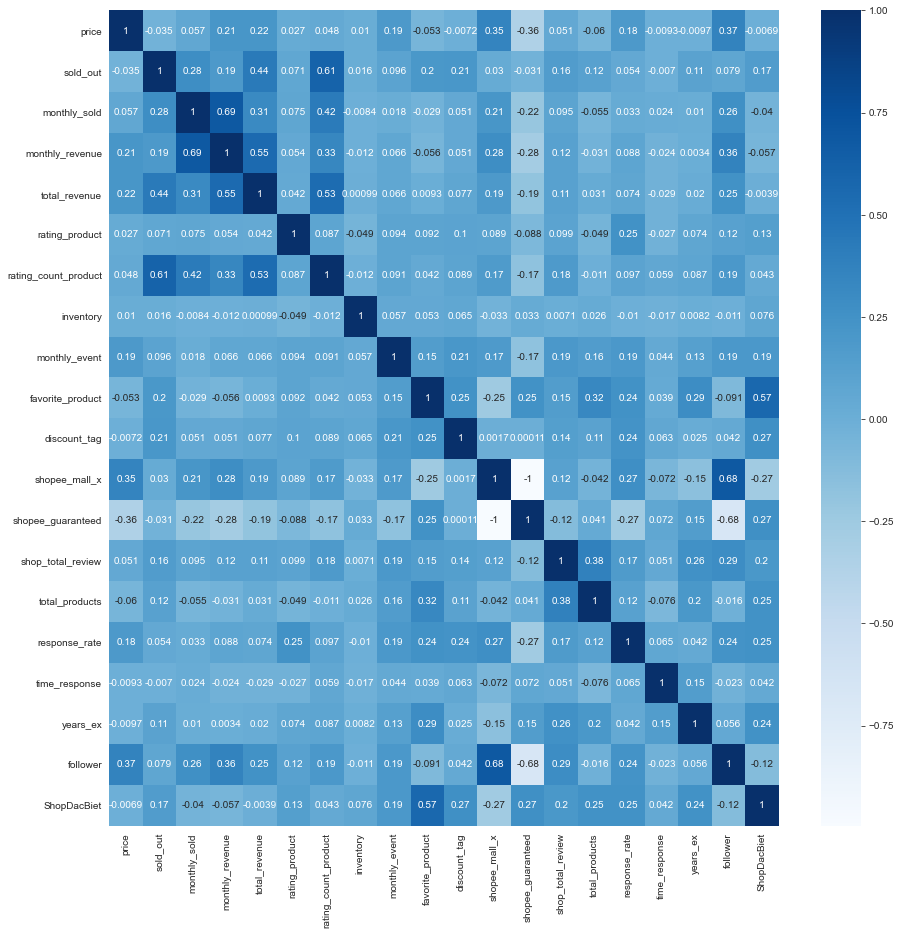

In [2459]:
plt.figure(figsize=(15,15))
sns.heatmap(df_test_3.corr(), annot=True, cmap= 'Blues' )
plt.show()


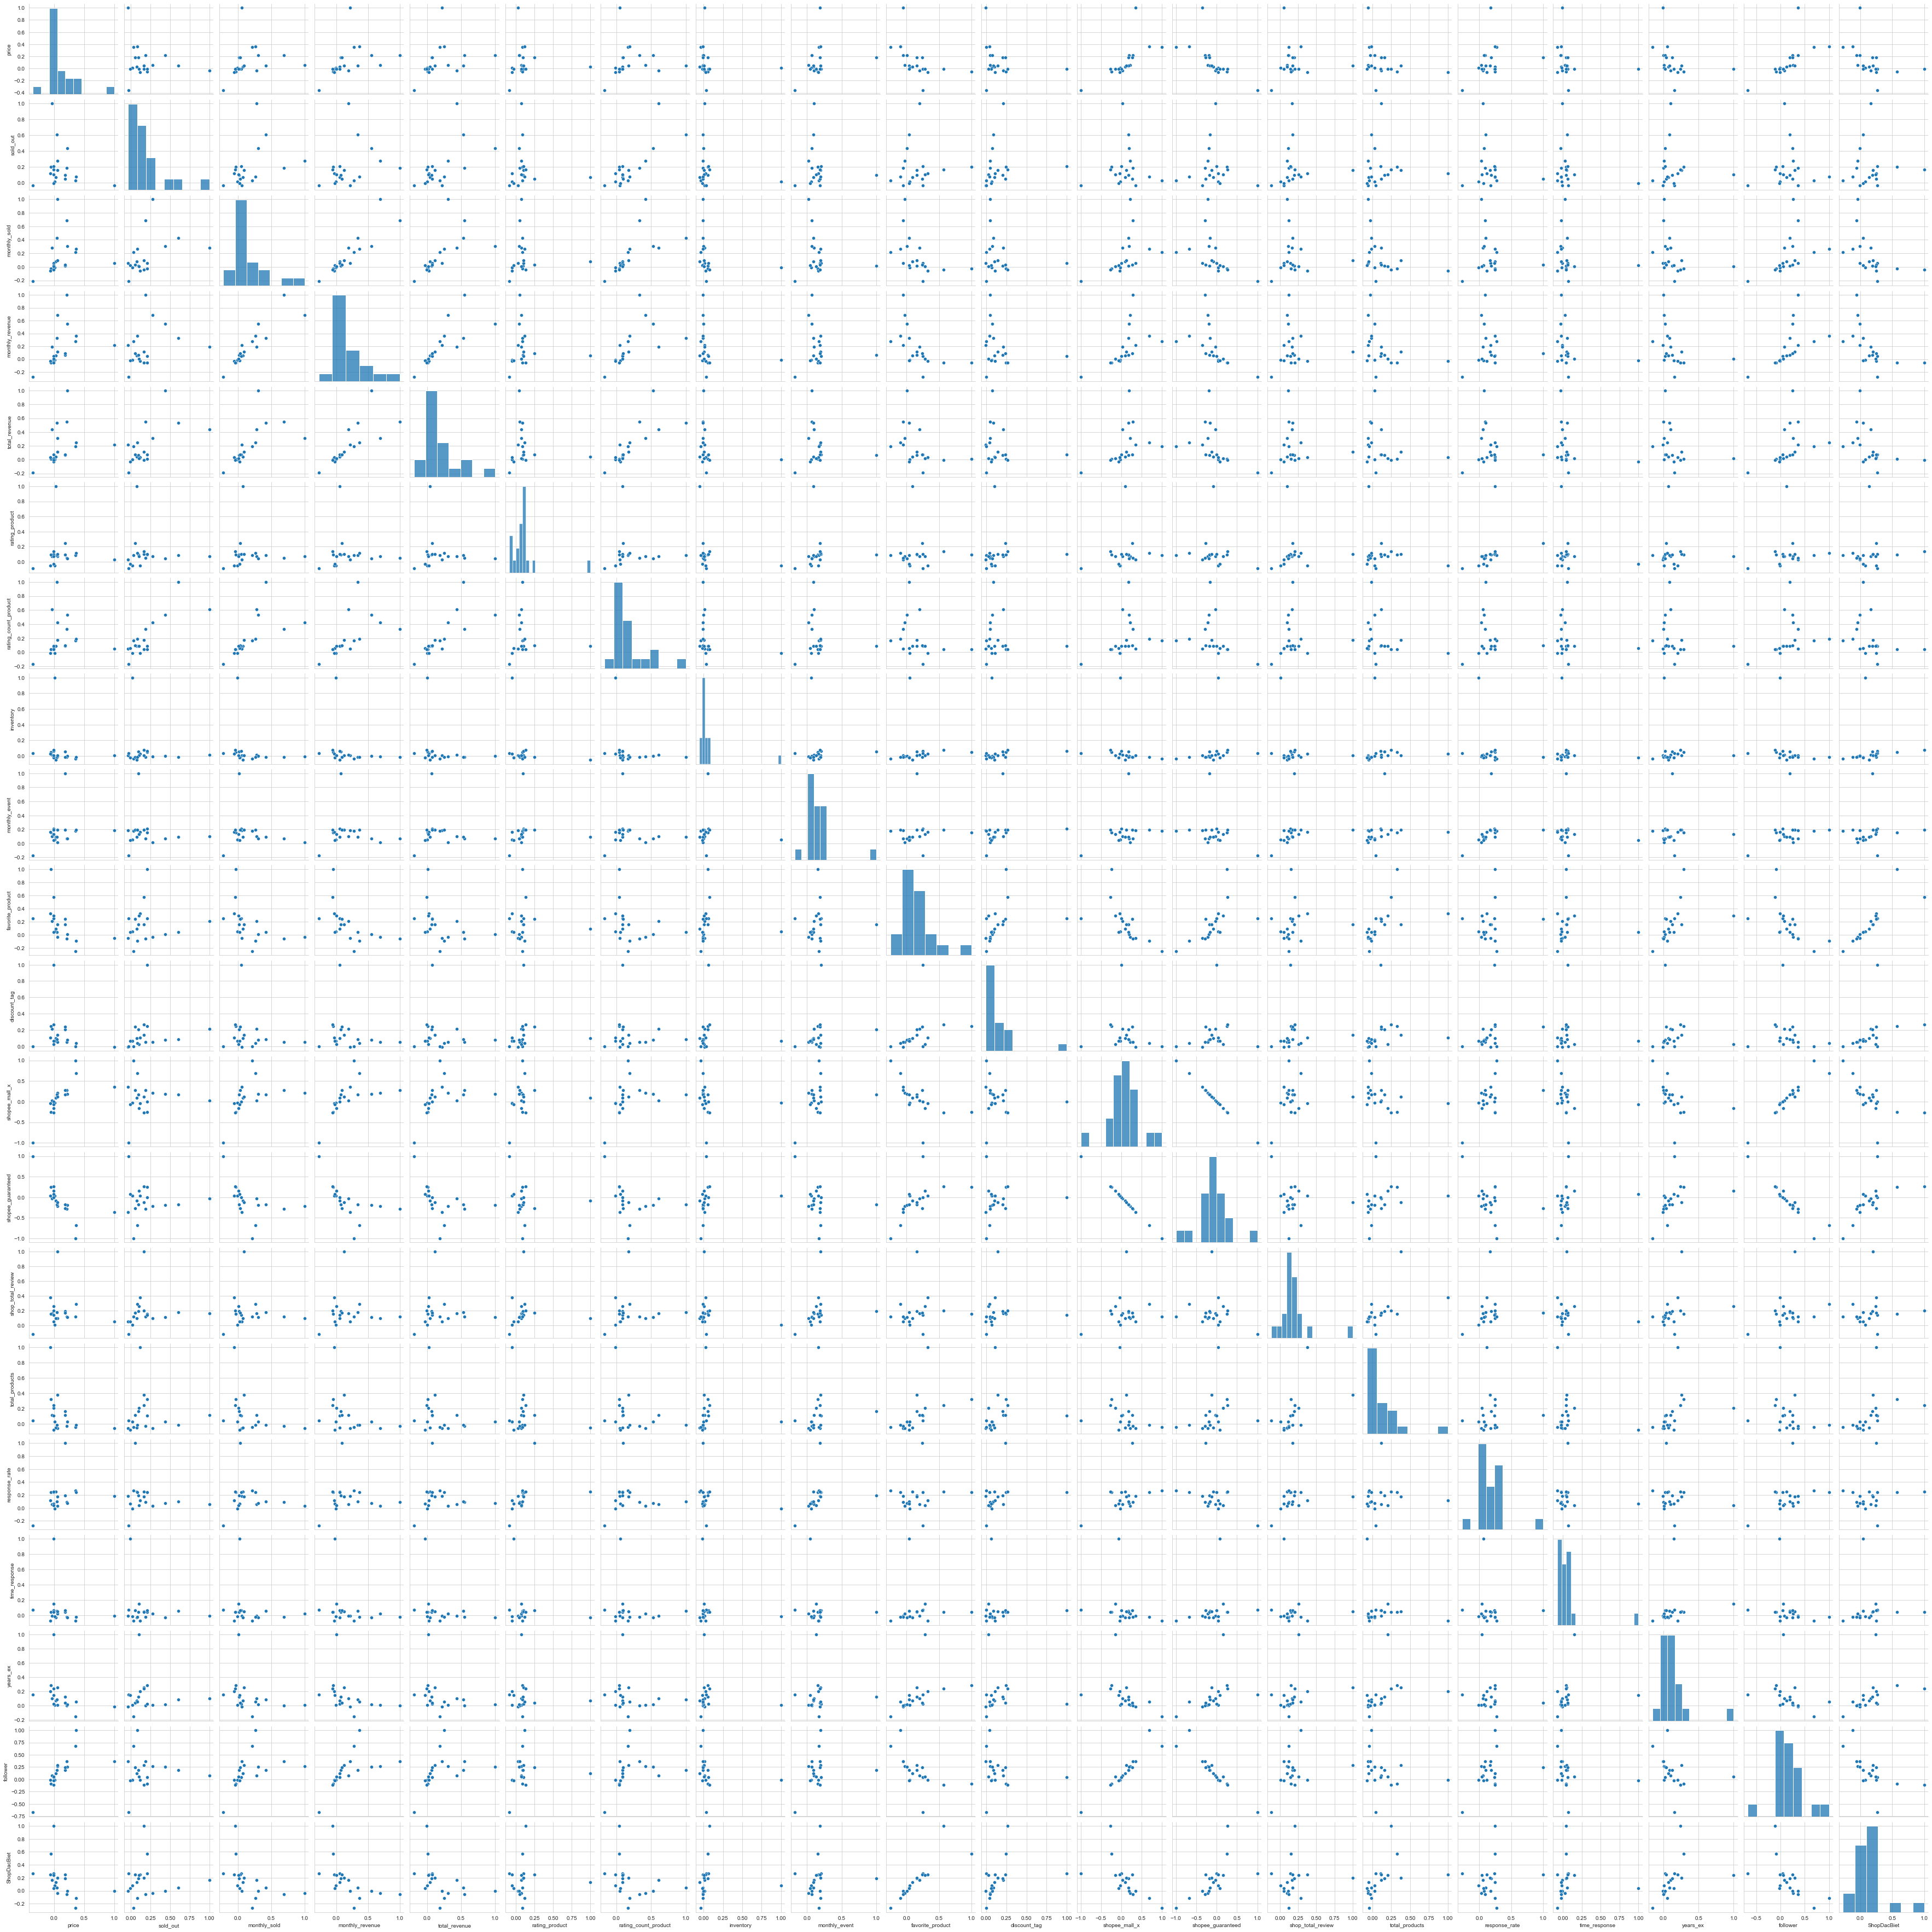

In [2458]:
sns.pairplot(df_test_3.corr())

# Define question
If customer want to open shop sell smartphone on Shopee. 
How can they do?

## Sale volumes

In [2460]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 1 to 1695
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1342 non-null   object 
 1   price                 1342 non-null   float64
 2   sold_out              1342 non-null   float64
 3   monthly_sold          1342 non-null   float64
 4   monthly_revenue       1342 non-null   float64
 5   total_revenue         1342 non-null   float64
 6   rating_product        1342 non-null   float64
 7   rating_count_product  1342 non-null   float64
 8   inventory             1342 non-null   float64
 9   monthly_event         1342 non-null   int64  
 10  favorite_product      1342 non-null   int64  
 11  discount_tag          1342 non-null   float64
 12  company               1342 non-null   object 
 13  shop_name             1342 non-null   object 
 14  shopee_mall_x         1342 non-null   float64
 15  shopee_guaranteed    

How many shop on shopee in smartphone categorical

In [2463]:
number_shop_product = df_test_3.groupby(['shop_name', 'company'])['name'].count().sort_values(ascending=False).reset_index()


shop_name                company  name
0    smartphone_baochau     smartphone_baochau    91
1          thelinhstore         Thế Linh Store    23
2              ljnh1993             ATU MOBILE    23
3           thuythuy889           hà bắc Store    22
4       longhung_mobile  Long Hưng Mobile Mall    21
..                  ...                    ...   ...
498             malloca                malloca     1
499    lytuyetlam450893             qdrbke8yz7     1
500        luna_shoping        SIM USB 4G LUNA     1
501          lucthudong         ĐiệnThoạiGiáRẻ     1
502            zudishop              Zudi Shop     1

[503 rows x 3 columns]

In [2466]:
number_shop_product['name'].sum()

1342

In [2464]:
number_shop_product['name'].unique()

array([91, 23, 22, 21, 20, 17, 16, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

In [2465]:
number_shop_product[number_shop_product['name'] >= 10]

shop_name                         company  name
0           smartphone_baochau              smartphone_baochau    91
1                 thelinhstore                  Thế Linh Store    23
2                     ljnh1993                      ATU MOBILE    23
3                  thuythuy889                    hà bắc Store    22
4              longhung_mobile           Long Hưng Mobile Mall    21
5   dienthoaichinhhanghonghanh  Điện Thoại Chính Hãng HồngHạnh    20
6         longhung_mobilestore                Long Hưng Mobile    17
7             baongocstore2016                Baongocstore2016    16
8       samsung_official_store           SAMSUNG OFFICIAL SHOP    13
9              tuanduongmobile               TUẤN DƯƠNG MOBILE    13
10               dientuthuychi                ĐIỆN TỬ THỦY CHI    12
11                  amobile.vn                      Amobile.vn    11
12  dien_thoai_nokia_pho_thong    Hệ Thống TUÂN HƯNG YÊN CHÍNH    11
13            shoplinhtrang688                Sỉ Điện Thoại Cỏ    11
14          thuonggiahodoapple         Thương Gia Họ Đỗ Mobile    10
15             linhkientrangia                 linhkientrangia    10

In [2470]:
number_shop_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  503 non-null    object
 1   company    503 non-null    object
 2   name       503 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.9+ KB


In [2474]:
sns.set_style("whitegrid")

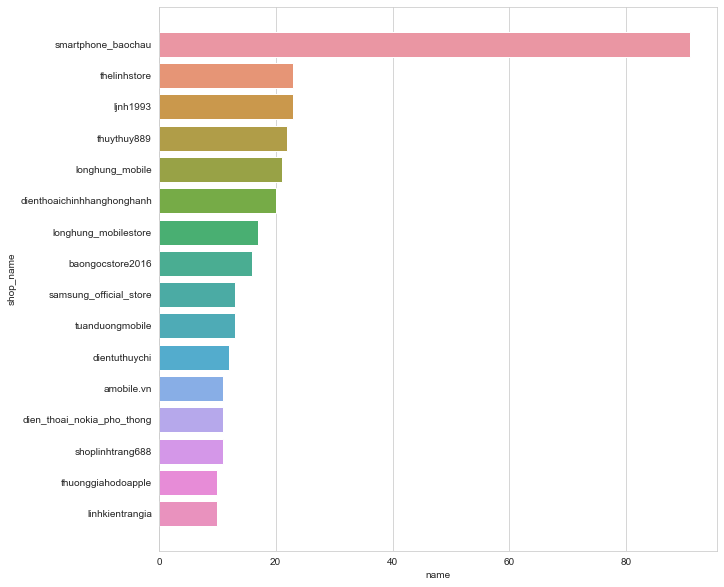

In [2479]:
plt.figure(figsize=(10,10))
sns.barplot(x = number_shop_product[number_shop_product['name'] >= 10]['name'],
            y = number_shop_product[number_shop_product['name'] >= 10]['shop_name'],
            data = number_shop_product[number_shop_product['name'] >= 10])

plt.axis('tight')
plt.show()

which shop sold the most products

In [2491]:
pd.options.display.float_format = "{:.2f}".format

In [2497]:
sales_volume = df_test_3.groupby(['shop_name'])['sold_out', 'monthly_sold'].sum().sort_values(by='sold_out', ascending=False).reset_index()
sales_volume

shop_name   sold_out  monthly_sold
0            smartphone_baochau 1007937.00        205.00
1              baongocstore2016  383482.00         48.00
2    dien_thoai_nokia_pho_thong  180875.00         94.00
3                   thuythuy889  169809.00       1759.00
4               tuanduongmobile  153626.00         67.00
..                          ...        ...           ...
498          shopsimphattai6868       0.00          1.00
499             shop.live.smart       0.00          1.00
500                  otelmobile       0.00          2.00
501                  lucthudong       0.00          1.00
502                  rxst_6zm2v       0.00          1.00

[503 rows x 3 columns]

sold out

In [2531]:
sales_volume['sold_out'].median()

20.0

In [2532]:
sales_volume['sold_out'].mean()

5850.421471172962

In [2533]:
sales_volume['sold_out'].mode()

0   1.00
dtype: float64

In [2537]:
sales_volume[sales_volume['sold_out'] > sales_volume['sold_out'].median()]['sold_out']

0     1007937.00
1      383482.00
2      180875.00
3      169809.00
4      153626.00
         ...    
246        22.00
247        21.00
248        21.00
249        21.00
250        21.00
Name: sold_out, Length: 251, dtype: float64

In [2548]:
sales_volume[sales_volume['sold_out'] > sales_volume['sold_out'].mean()].sort_values(by='sold_out', ascending=False)

shop_name   sold_out  monthly_sold
0           smartphone_baochau 1007937.00        205.00
1             baongocstore2016  383482.00         48.00
2   dien_thoai_nokia_pho_thong  180875.00         94.00
3                  thuythuy889  169809.00       1759.00
4              tuanduongmobile  153626.00         67.00
5     e72_nokia_e72_chinh_hang  151003.00        114.00
6      xiaomivn_official_store  105674.00        436.00
7               alofonevietnam  105539.00          9.00
8       vivo_official_store_vn   86020.00       2091.00
9             shoplinhtrang688   83648.00         71.00
10        apple_flagship_store   75369.00       1246.00
11                thelinhstore   54898.00        460.00
12      samsung_official_store   41392.00       2594.00
13                  storevn678   29308.00         30.00
14      thaophuongphuongphuong   28033.00          2.00
15               mykim20032018   25153.00        164.00
16        nokiae72zinchinhhang   23219.00       2825.00
17     xiaomi_authorized_store   22000.00         89.00
18                techshop.net   22000.00         17.00
19                anhbinhminhv   18908.00         28.00
20                linhvu130789   17293.00         52.00
21          annhien_smartwatch   17000.00        139.00
22        nokia_official_store   13916.00        241.00
23                  hangle9292   12503.00         39.00
24    oppo_authorized_store_vn   11700.00       1027.00
25            vienthong_tinhoc   11000.00          4.00
26                   mdvh.shop   11000.00          1.00
27                      ohnovn    6000.00          1.00

In [2518]:
sales_volume.describe()

sold_out  monthly_sold
count     503.00        503.00
mean     5850.42         45.81
std     51014.41        227.55
min         0.00          1.00
25%         3.00          1.00
50%        20.00          3.00
75%       140.00         13.00
max   1007937.00       2825.00

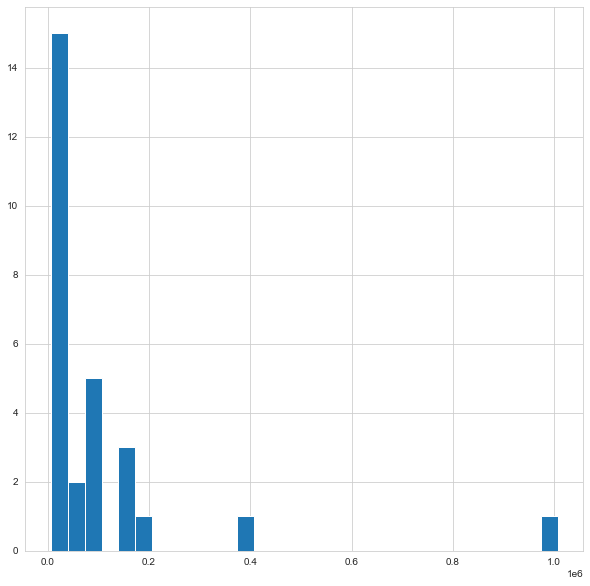

In [2536]:
plt.figure(figsize=(10,10))
plt.hist(sales_volume[sales_volume['sold_out'] > sales_volume['sold_out'].mean()]['sold_out'], bins=30)
plt.xlim(0, 200000)

plt.axis('tight')
plt.show()

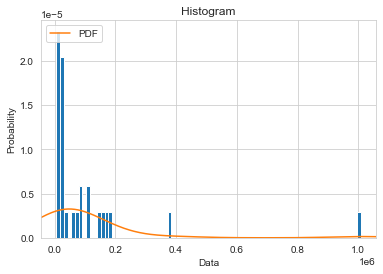

In [2538]:
import scipy.stats as st

plt.hist(sales_volume[sales_volume['sold_out'] > sales_volume['sold_out'].mean()]['sold_out'], density=True, bins=82)
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(sales_volume[sales_volume['sold_out'] > sales_volume['sold_out'].mean()]['sold_out'])
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

In [2555]:
# Top 10
top_10_sold_out = sales_volume[sales_volume['sold_out'] > sales_volume['sold_out'].mean()].sort_values(by='sold_out', ascending=False)[:10]
top_10_sold_out

shop_name   sold_out  monthly_sold
0          smartphone_baochau 1007937.00        205.00
1            baongocstore2016  383482.00         48.00
2  dien_thoai_nokia_pho_thong  180875.00         94.00
3                 thuythuy889  169809.00       1759.00
4             tuanduongmobile  153626.00         67.00
5    e72_nokia_e72_chinh_hang  151003.00        114.00
6     xiaomivn_official_store  105674.00        436.00
7              alofonevietnam  105539.00          9.00
8      vivo_official_store_vn   86020.00       2091.00
9            shoplinhtrang688   83648.00         71.00

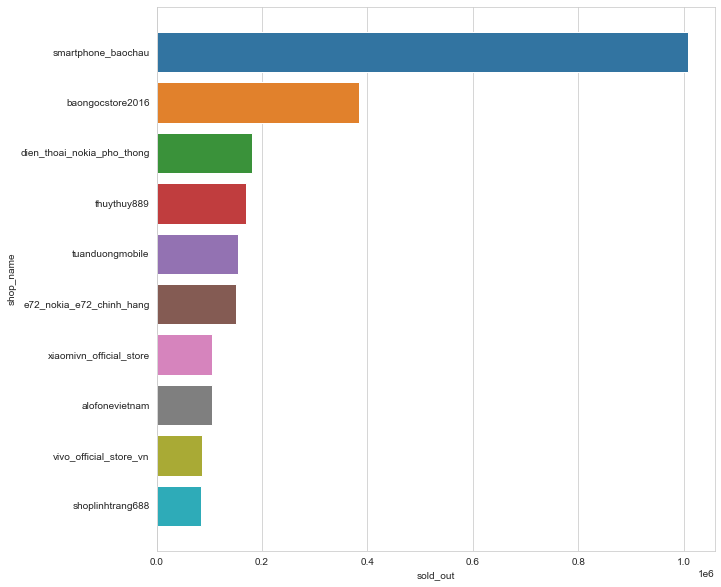

In [2556]:
plt.figure(figsize=(10,10))
sns.barplot(data = top_10_sold_out,
            x = 'sold_out', y='shop_name'
            )
plt.axis('tight')
plt.show()

monthly sold

In [2540]:
sales_volume.sort_values(by='monthly_sold', ascending=False)

shop_name  sold_out  monthly_sold
16     nokiae72zinchinhhang  23219.00       2825.00
12   samsung_official_store  41392.00       2594.00
8    vivo_official_store_vn  86020.00       2091.00
3               thuythuy889 169809.00       1759.00
10     apple_flagship_store  75369.00       1246.00
..                      ...       ...           ...
371                  tabehu      3.00          1.00
375          huyenlongstore      3.00          1.00
376      nguyenkhanhtung_3.      3.00          1.00
377               nctzen.13      3.00          1.00
502              rxst_6zm2v      0.00          1.00

[503 rows x 3 columns]

In [2542]:
sales_volume['monthly_sold'].describe()

count    503.00
mean      45.81
std      227.55
min        1.00
25%        1.00
50%        3.00
75%       13.00
max     2825.00
Name: monthly_sold, dtype: float64

In [2544]:
sales_volume['monthly_sold'].mode()

0   1.00
dtype: float64

In [2546]:
sales_volume[sales_volume['monthly_sold'] > sales_volume['monthly_sold'].mean()].sort_values(by='monthly_sold', ascending=False)

shop_name  sold_out  monthly_sold
16     nokiae72zinchinhhang  23219.00       2825.00
12   samsung_official_store  41392.00       2594.00
8    vivo_official_store_vn  86020.00       2091.00
3               thuythuy889 169809.00       1759.00
10     apple_flagship_store  75369.00       1246.00
..                      ...       ...           ...
170         tuankenmobile03     63.00         50.00
74               worldphone    391.00         49.00
143       dienthoai_nokia18    103.00         49.00
92                tphone_hn    263.00         48.00
1          baongocstore2016 383482.00         48.00

[70 rows x 3 columns]

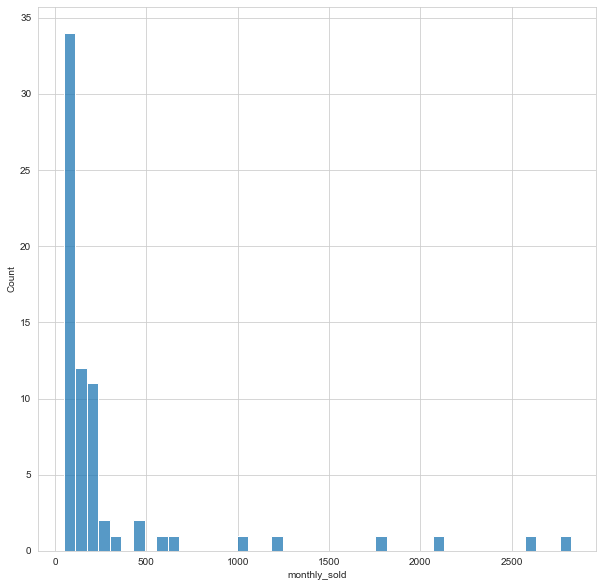

In [2551]:
plt.figure(figsize=(10,10))
sns.histplot(sales_volume[sales_volume['monthly_sold'] > sales_volume['monthly_sold'].mean()]['monthly_sold'])
plt.axis('tight')
plt.show()

In [2557]:
top_10_monthly_sold = sales_volume[sales_volume['monthly_sold'] > sales_volume['monthly_sold'].mean()].sort_values(by='monthly_sold', ascending=False)[:10]
top_10_monthly_sold

shop_name  sold_out  monthly_sold
16      nokiae72zinchinhhang  23219.00       2825.00
12    samsung_official_store  41392.00       2594.00
8     vivo_official_store_vn  86020.00       2091.00
3                thuythuy889 169809.00       1759.00
10      apple_flagship_store  75369.00       1246.00
24  oppo_authorized_store_vn  11700.00       1027.00
28              tomeno.store   5000.00        677.00
35              digiphone_hn   1491.00        554.00
11              thelinhstore  54898.00        460.00
6    xiaomivn_official_store 105674.00        436.00

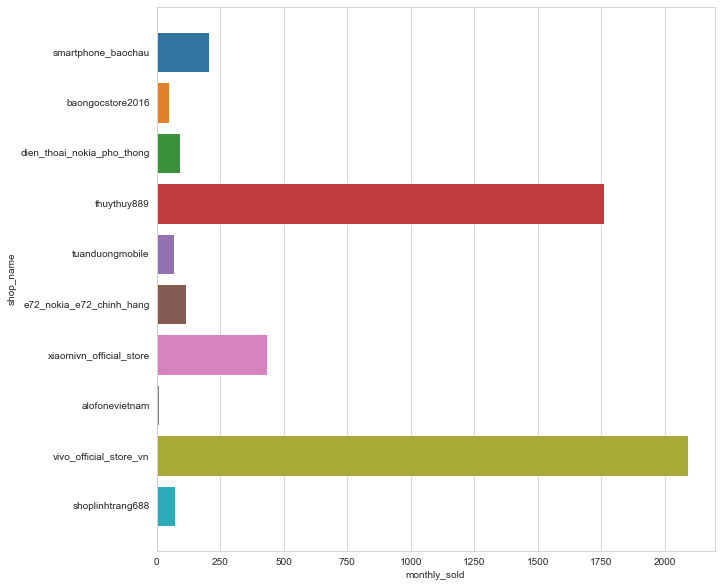

In [2558]:
plt.figure(figsize=(10,10))
sns.barplot(data = top_10_sold_out,
            x = 'monthly_sold', y='shop_name'
            )
plt.axis('tight')
plt.show()

compare

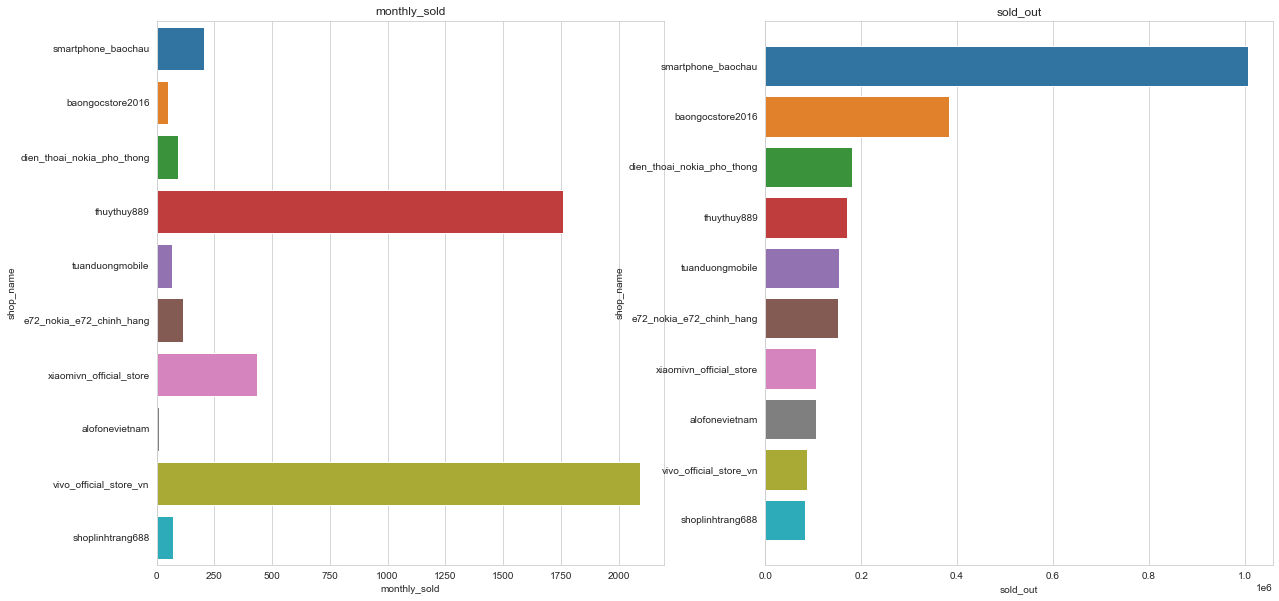

In [2559]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.barplot(data = top_10_sold_out,
            x = 'monthly_sold', y='shop_name')
plt.title('monthly_sold')

plt.subplot(122)
sns.barplot(data = top_10_sold_out,
            x = 'sold_out', y='shop_name'
            )
plt.title('sold_out')

plt.axis('tight')
plt.show()



## Shop experience

In [2565]:
sum_shop_ex = df_test_3.groupby('shop_name')['years_ex'].sum().reset_index().sort_values(by='years_ex', ascending=False)
sum_shop_ex

shop_name  years_ex
371  smartphone_baochau   3003.00
424         thuythuy889   1584.00
410        thelinhstore   1104.00
28     baongocstore2016    960.00
203            ljnh1993    828.00
..                  ...       ...
0            0s3y1lncmk      1.80
20         apple.max.88      1.50
474     viettelquangnam      1.30
264      nokia_6300_zin      1.10
377     storecongnghe50      0.80

[503 rows x 2 columns]

In [2576]:
sum_shop_ex.isna().sum()

shop_name    0
years_ex     0
dtype: int64

In [2566]:
sum_shop_ex.describe()

years_ex
count    503.00
mean      83.54
std      183.57
min        0.80
25%       22.50
50%       48.00
75%       91.00
max     3003.00

In [2581]:
sum_shop_ex['years_ex'].mean()

83.54353876739563

In [2580]:
sum_shop_ex['years_ex'].median()

48.0

In [2579]:
sum_shop_ex['years_ex'].mode()

0   48.00
dtype: float64

In [2584]:
sum_shop_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 371 to 377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   shop_name  503 non-null    object 
 1   years_ex   503 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [2585]:
sum_shop_ex[sum_shop_ex['years_ex'] < sum_shop_ex['years_ex'].median()]

shop_name  years_ex
438           tphone_hn     45.00
159   huyenthanhngo2006     44.00
213        luxurylock76     42.00
417  thuonggiado.com.vn     40.00
373         smarttech23     36.00
..                  ...       ...
0            0s3y1lncmk      1.80
20         apple.max.88      1.50
474     viettelquangnam      1.30
264      nokia_6300_zin      1.10
377     storecongnghe50      0.80

[240 rows x 2 columns]

Concern outlier

In [2593]:
sum_shop_ex[sum_shop_ex['years_ex'] >= sum_shop_ex['years_ex'].mean()].sort_values(by='years_ex', ascending= False)

shop_name  years_ex
371       smartphone_baochau   3003.00
424              thuythuy889   1584.00
410             thelinhstore   1104.00
28          baongocstore2016    960.00
203                 ljnh1993    828.00
..                       ...       ...
84             dienthoaidoc4     90.00
344  shopdunk_official_store     90.00
85             dienthoaidoc6     90.00
267     nokiae72zinchinhhang     90.00
230             minh_nokia85     84.00

[132 rows x 2 columns]

<AxesSubplot:ylabel='years_ex'>

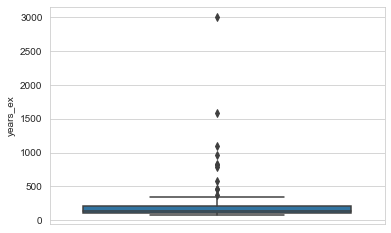

In [2591]:
sns.boxplot(y=sum_shop_ex[sum_shop_ex['years_ex'] >= sum_shop_ex['years_ex'].mean()]['years_ex'])

In [2594]:
# top 10
top_10_shop_ex = sum_shop_ex[sum_shop_ex['years_ex'] >= sum_shop_ex['years_ex'].mean()].sort_values(by='years_ex', ascending= False)[:10]
top_10_shop_ex

shop_name  years_ex
371          smartphone_baochau   3003.00
424                 thuythuy889   1584.00
410                thelinhstore   1104.00
28             baongocstore2016    960.00
203                    ljnh1993    828.00
207        longhung_mobilestore    816.00
461             tuanduongmobile    780.00
440             tranglinhmobile    576.00
331      samsung_official_store    468.00
79   dienthoaichinhhanghonghanh    460.00

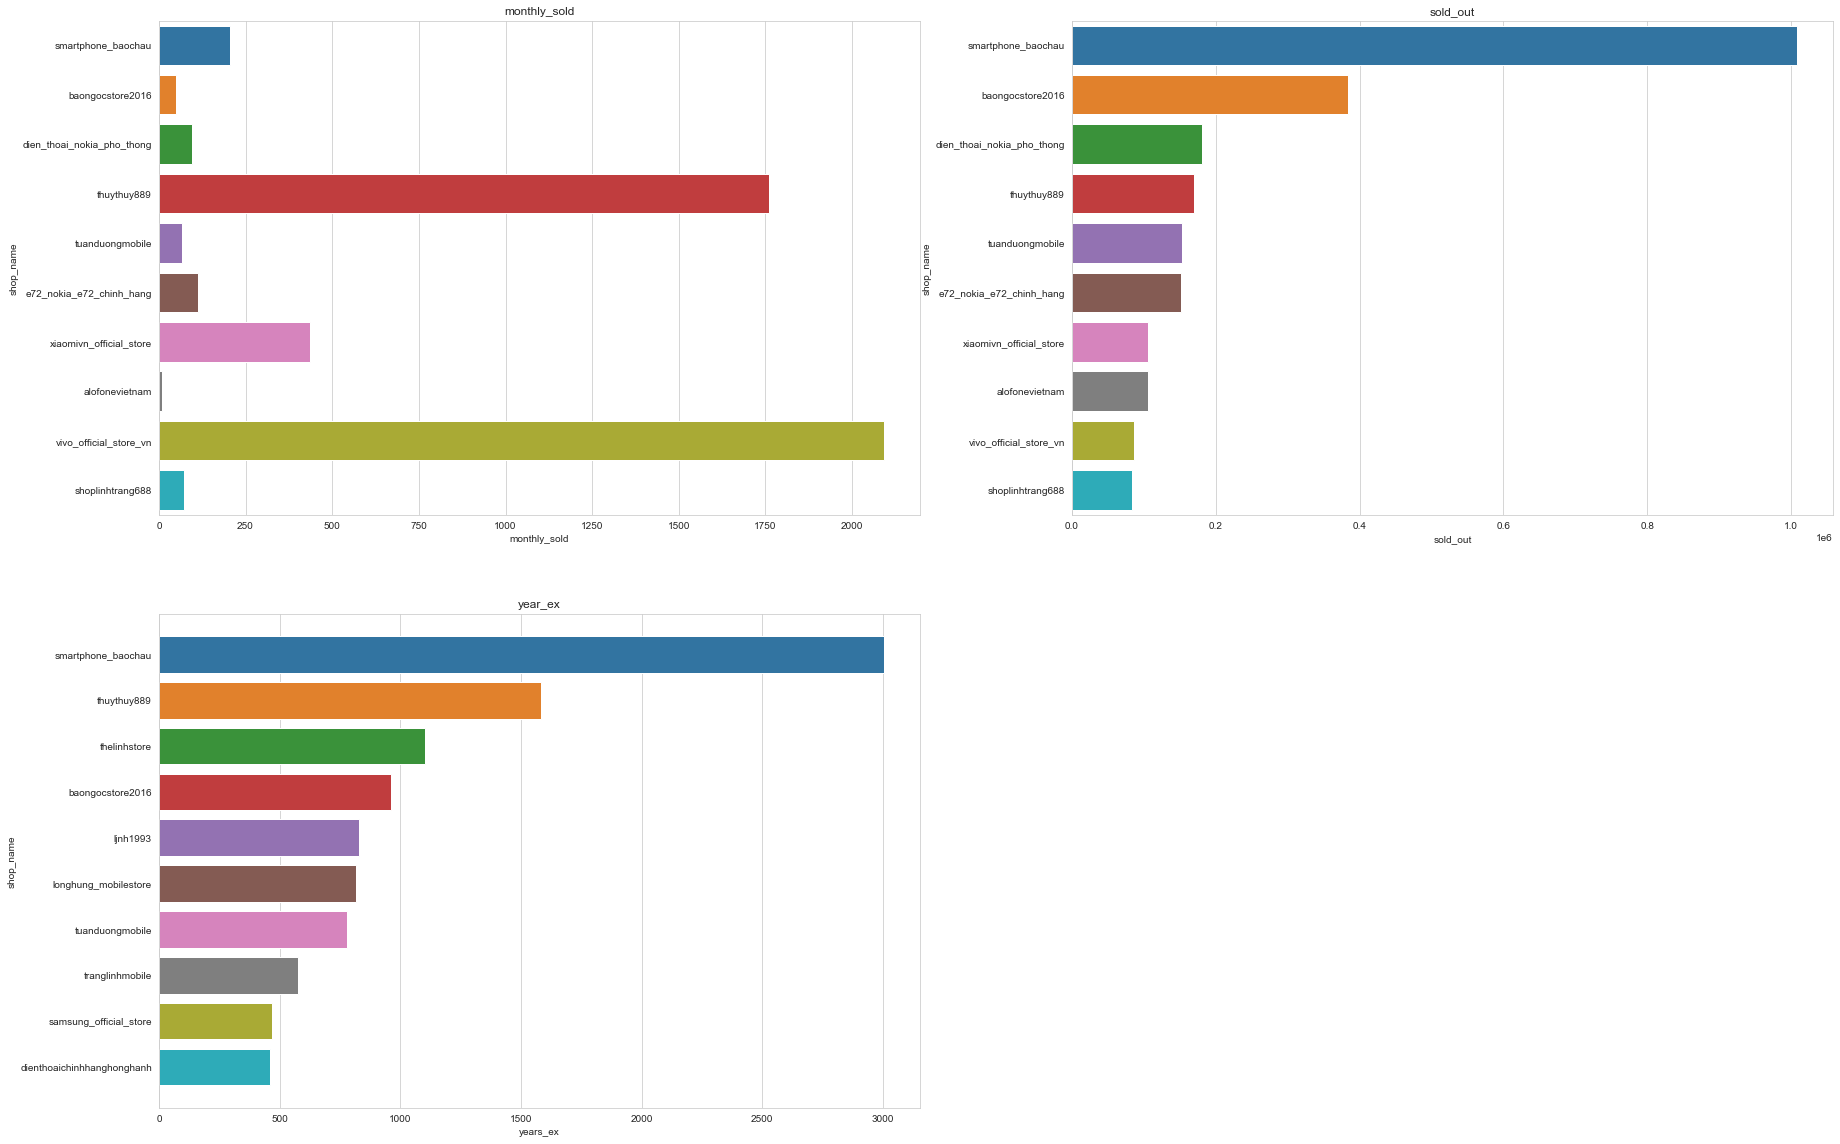

In [2598]:
plt.figure(figsize=(30,20))

plt.subplot(221)
sns.barplot(data = top_10_sold_out,
            x = 'monthly_sold', y='shop_name')
plt.title('monthly_sold')

plt.subplot(222)
sns.barplot(data = top_10_sold_out,
            x = 'sold_out', y='shop_name'
            )
plt.title('sold_out')

plt.subplot(223)
sns.barplot(data = top_10_shop_ex,
            x = 'years_ex', y='shop_name'
            )
plt.title('year_ex')

plt.axis('tight')
plt.show()



## Revenue

In [2602]:
sum_revenue = df_test_3.groupby('shop_name')['monthly_revenue', 'total_revenue'].sum().reset_index()
sum_revenue

shop_name  monthly_revenue  total_revenue
0            0s3y1lncmk      17034000.00    24626000.00
1             115haonam       8097000.00    13995000.00
2               195dung        310000.00      460000.00
3            1eyjxyeoln       6500000.00    24700000.00
4            1twj98w4w6      57480000.00  2506081000.00
..                  ...              ...            ...
498          yukimobile        933000.00     9287000.00
499              zacoto        751000.00     2717000.00
500  zinmobile104daotan      40329500.00    75818000.00
501    zinmobile_giatot       4850000.00    14550000.00
502            zudishop         35000.00       35000.00

[503 rows x 3 columns]

monthly revenue

In [2603]:
sum_revenue['monthly_revenue'].describe()

count           503.00
mean      151201100.61
std      1104846185.83
min            1000.00
25%          377250.00
50%         1860000.00
75%        12297450.00
max     16709420200.00
Name: monthly_revenue, dtype: float64

In [2607]:
sum_revenue['monthly_revenue'].mean()

151201100.60707754

In [2604]:
sum_revenue['monthly_revenue'].mode()

0   150000.00
dtype: float64

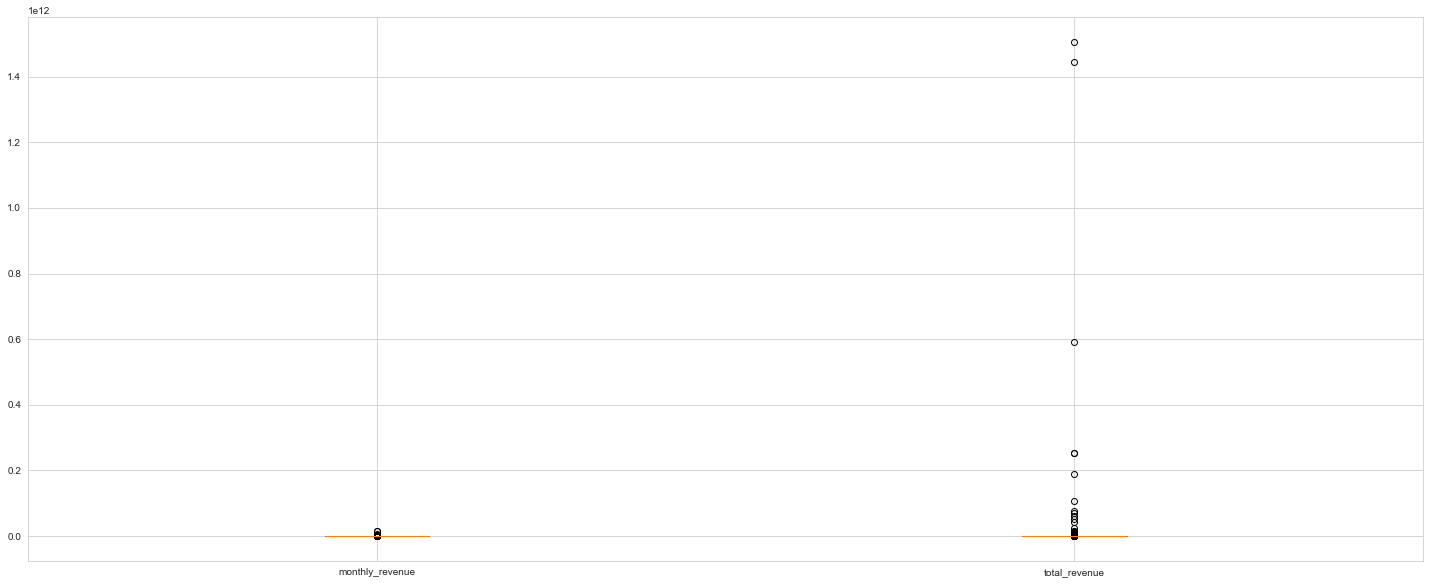

label  lower_whisker  lower_quartile      median  upper_quartile  \
0  monthly_revenue        1000.00       377250.00  1860000.00     12297450.00   
1    total_revenue           0.00      1302500.00 10865000.00    100172000.00   

   upper_whisker  
0    29180000.00  
1   227167000.00

In [2609]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

monthly_revenue       = sum_revenue['monthly_revenue']
total_revenue             = sum_revenue['total_revenue']

labels = ['monthly_revenue', 'total_revenue']

plt.figure(figsize=(25,10))
bp = plt.boxplot([monthly_revenue, total_revenue], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

In [2641]:
sum_revenue['monthly_revenue'].mean()

151201100.60707754

In [2677]:
sum_revenue[sum_revenue['monthly_revenue'] > sum_revenue['monthly_revenue'].median()].sort_values(by='monthly_revenue', ascending=False)

shop_name  monthly_revenue    total_revenue
21       apple_flagship_store   16709420200.00 1506223761100.00
331    samsung_official_store   15592766600.00  188780727300.00
478    vivo_official_store_vn    6806252700.00  251966082000.00
271  oppo_authorized_store_vn    3821921980.00   43277534980.00
96               digiphone_hn    3484641800.00   10861123900.00
..                        ...              ...              ...
444          tranthihuong1506       2040000.00       3400000.00
98               dinhluan_396       2000000.00       2000000.00
401           thanhsonfptshop       2000000.00       2000000.00
337           shop.live.smart       1951578.75             0.00
297              phukiensim75       1919997.50      25564932.50

[251 rows x 3 columns]

In [2614]:
top_10_monthly_revenue = sum_revenue[sum_revenue['monthly_revenue'] > sum_revenue['monthly_revenue'].median()].sort_values(by='monthly_revenue', ascending=False)[:10]
top_10_monthly_revenue

shop_name  monthly_revenue    total_revenue
21       apple_flagship_store   16709420200.00 1506223761100.00
331    samsung_official_store   15592766600.00  188780727300.00
478    vivo_official_store_vn    6806252700.00  251966082000.00
271  oppo_authorized_store_vn    3821921980.00   43277534980.00
96               digiphone_hn    3484641800.00   10861123900.00
491   xiaomivn_official_store    2715607200.00  592804488000.00
344   shopdunk_official_store    2277881000.00   23534225400.00
228                   mimedia    1410447900.00    6178076700.00
490          xiaomi_thegioimi    1271820000.00   15212070000.00
267      nokiae72zinchinhhang    1267569000.00   12449653000.00

In [ ]:
plt.figure()

sns.barplot(data = pr, 
              x = 'Sub_Category',
              y = 'Profit',
              color = 'green')
plt.axhline([pr['Profit'].mean()], color = 'red', linestyle='--')
plt.show()

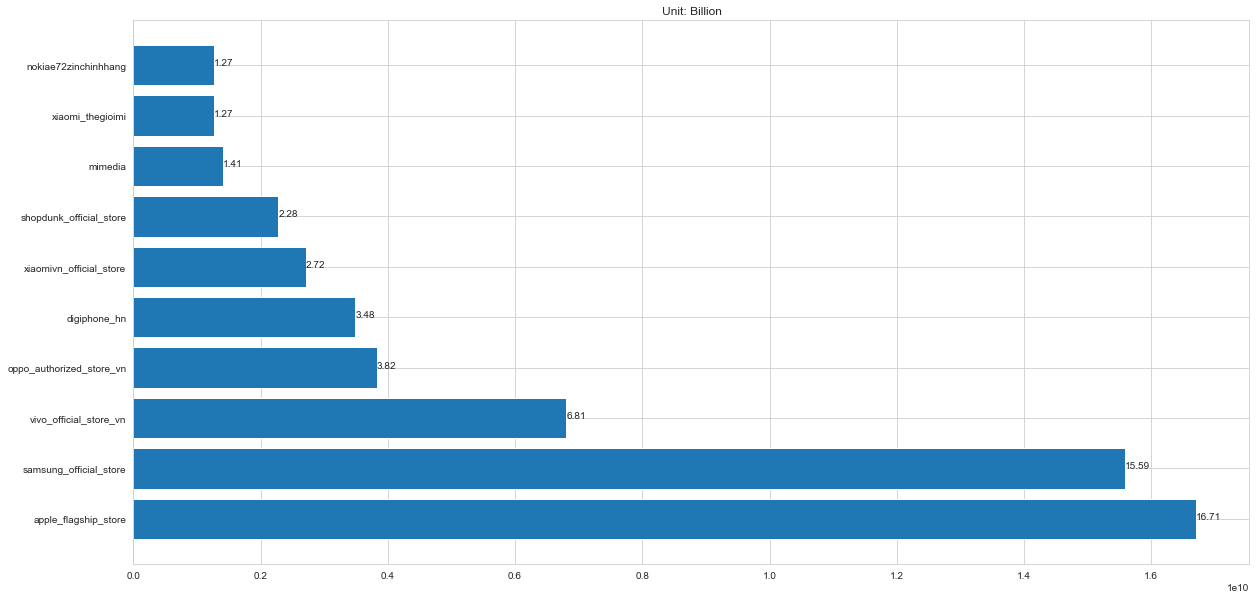

In [2653]:
plt.figure(figsize=(20,10))

plt.barh(y=top_10_monthly_revenue['shop_name'],
        width= top_10_monthly_revenue['monthly_revenue'])

for index, values in enumerate(top_10_monthly_revenue['monthly_revenue']):
        plt.text(values, index, str(round(values/1e9,2)))

plt.title('Unit: Billion')

plt.show()


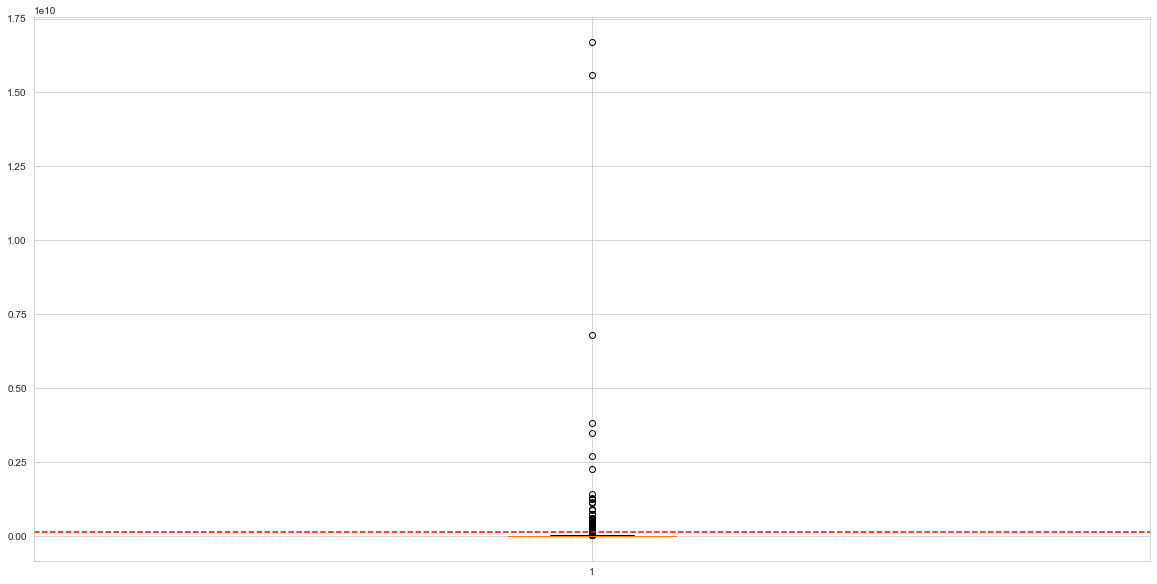

In [2643]:
plt.figure(figsize=(20,10))

plt.boxplot(sum_revenue['monthly_revenue'])

plt.axhline([sum_revenue['monthly_revenue'].mean()], color = 'red', linestyle='--')

plt.show()

Total revenue

In [2631]:
sum_revenue['total_revenue'].describe()

count             503.00
mean       9753912245.92
std       98340785256.45
min                 0.00
25%           1302500.00
50%          10865000.00
75%         100172000.00
max     1506223761100.00
Name: total_revenue, dtype: float64

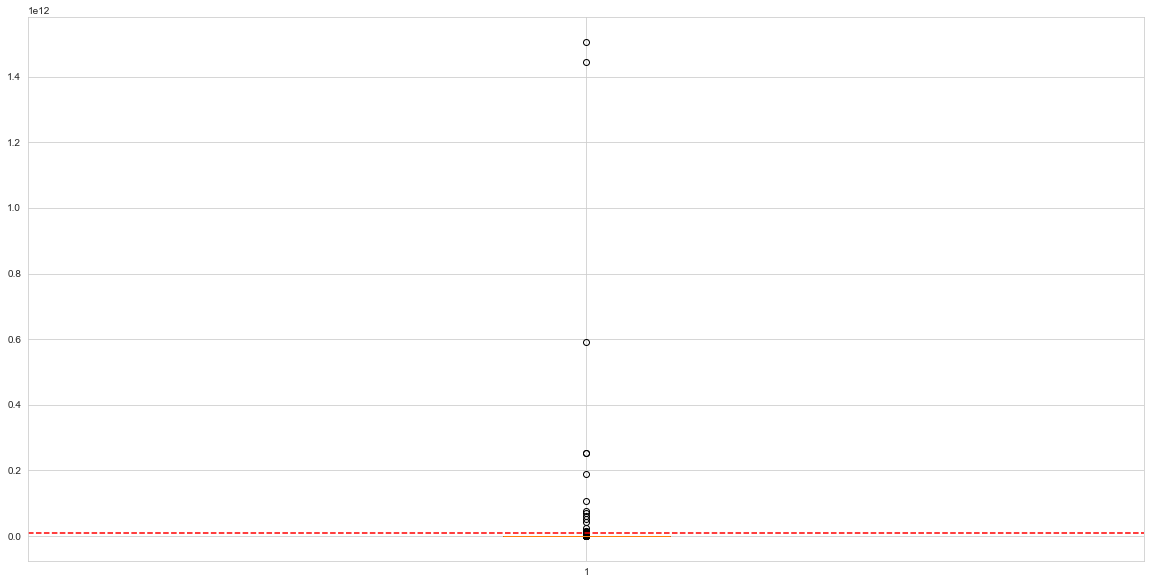

In [2645]:
plt.figure(figsize=(20,10))

plt.boxplot(sum_revenue['total_revenue'])

plt.axhline([sum_revenue['total_revenue'].mean()], color = 'red', linestyle='--')

plt.show()

In [2634]:
sum_revenue['total_revenue'].median()

10865000.0

In [2678]:
sum_revenue[sum_revenue['total_revenue'] > sum_revenue['total_revenue'].median()]

shop_name  monthly_revenue   total_revenue
0                 0s3y1lncmk      17034000.00     24626000.00
1                  115haonam       8097000.00     13995000.00
3                 1eyjxyeoln       6500000.00     24700000.00
4                 1twj98w4w6      57480000.00   2506081000.00
5            2tstorehaiphong      29180000.00    224140000.00
..                       ...              ...             ...
491  xiaomivn_official_store    2715607200.00 592804488000.00
493            xuannghia99bn       6000000.00     18000000.00
496        yenphamsmartphone       1275000.00     16575000.00
500       zinmobile104daotan      40329500.00     75818000.00
501         zinmobile_giatot       4850000.00     14550000.00

[251 rows x 3 columns]

In [2636]:
top_10_total_revenue = sum_revenue[sum_revenue['total_revenue'] > sum_revenue['total_revenue'].median()].sort_values(by='total_revenue', ascending=False)[:10]
top_10_total_revenue

shop_name  monthly_revenue    total_revenue
21         apple_flagship_store   16709420200.00 1506223761100.00
371          smartphone_baochau     300684530.00 1444371865240.00
491     xiaomivn_official_store    2715607200.00  592804488000.00
28             baongocstore2016      38397900.00  254119648870.00
478      vivo_official_store_vn    6806252700.00  251966082000.00
331      samsung_official_store   15592766600.00  188780727300.00
71   dien_thoai_nokia_pho_thong      55737000.00  106955311000.00
117    e72_nokia_e72_chinh_hang      41911000.00   76149597000.00
489     xiaomi_authorized_store     284088000.00   70224000000.00
461             tuanduongmobile      96026350.00   60512000700.00

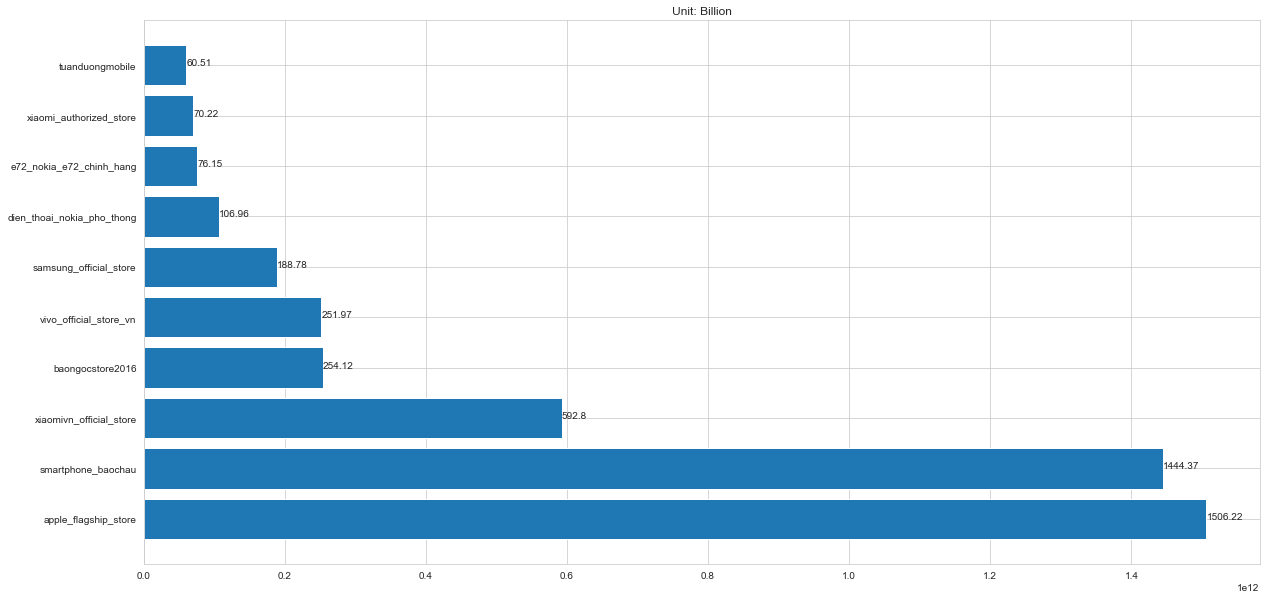

In [2654]:
plt.figure(figsize=(20,10))

plt.barh(y=top_10_total_revenue['shop_name'],
        width= top_10_total_revenue['total_revenue'])

for index, values in enumerate(top_10_total_revenue['total_revenue']):
        plt.text(values, index, str(round(values/1e9, 2)))

plt.title('Unit: Billion')

plt.show()

## shop total review and follower

Follower

In [2672]:
sum_shop_review_follower = df_test_3.groupby('shop_name')['shop_total_review', 'follower'].mean().reset_index()
sum_shop_review_follower

shop_name  shop_total_review  follower
0            0s3y1lncmk              12.00     29.00
1             115haonam              93.00    242.00
2               195dung               1.00     13.00
3            1eyjxyeoln              36.00     27.00
4            1twj98w4w6             131.00   2300.00
..                  ...                ...       ...
498          yukimobile           29000.00  11200.00
499              zacoto             191.00     48.20
500  zinmobile104daotan             490.00   8000.00
501    zinmobile_giatot              86.00    313.00
502            zudishop              30.00  11100.00

[503 rows x 3 columns]

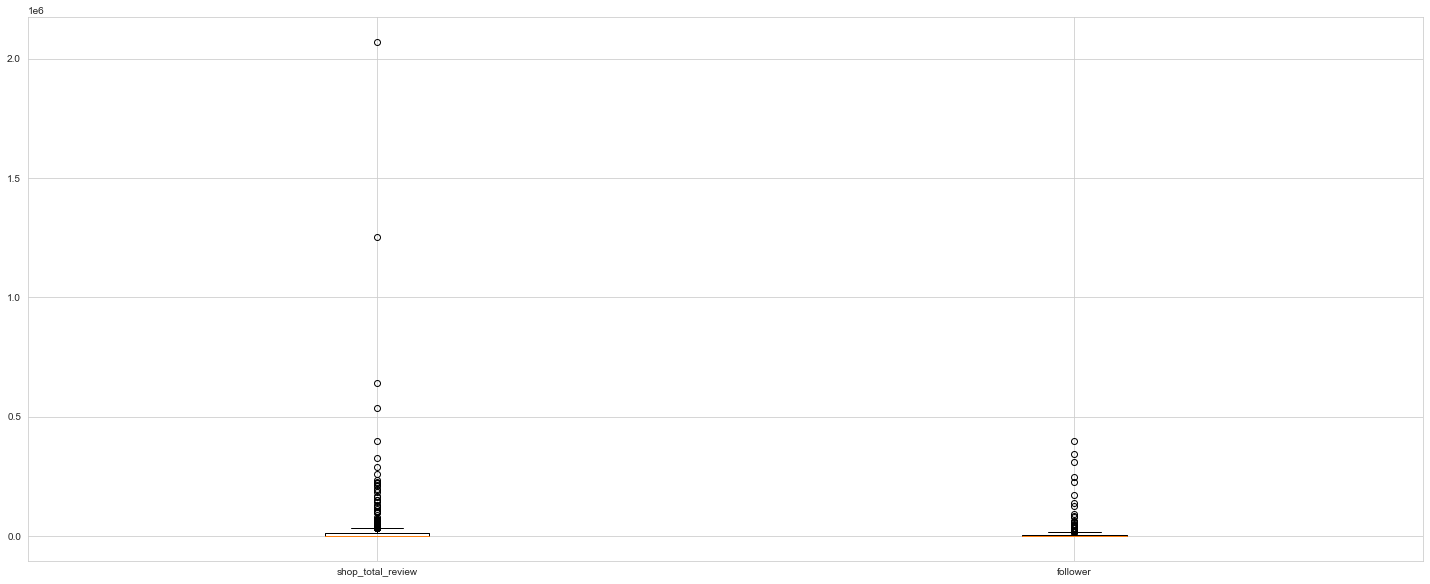

label  lower_whisker  lower_quartile  median  upper_quartile  \
0  shop_total_review           0.00           63.00  305.00        14000.00   
1           follower           0.00          110.19 1600.00         6450.00   

   upper_whisker  
0       33000.00  
1       15481.82

In [2690]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

shop_total_review       = sum_shop_review_follower['shop_total_review']
follower             = sum_shop_review_follower['follower']

labels = ['shop_total_review', 'follower']

plt.figure(figsize=(25,10))
bp = plt.boxplot([shop_total_review, follower], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

In [2670]:
sum_shop_review_follower.describe()

shop_total_review  follower
count             503.00    503.00
mean            26544.82   9566.55
std            121709.15  34145.39
min                 0.00      0.00
25%                63.00    110.19
50%               305.00   1600.00
75%             14000.00   6450.00
max           2071000.00 399333.33

In [2682]:
sum_shop_review_follower[sum_shop_review_follower['follower'] > sum_shop_review_follower['follower'].mean()]

shop_name  shop_total_review  follower
6                88.store.vn            2000.00  21200.00
10                airstorevn           14000.00  83500.00
11            alofonevietnam          213000.00  16900.00
13                amobile.vn           36000.00  44400.00
21      apple_flagship_store          185000.00 311400.00
..                       ...                ...       ...
490         xiaomi_thegioimi           14000.00  63100.00
491  xiaomivn_official_store          198000.00 125600.00
495                xwatch.vn          262000.00   9600.00
498               yukimobile           29000.00  11200.00
502                 zudishop              30.00  11100.00

[92 rows x 3 columns]

In [2675]:
top_10_follower = sum_shop_review_follower.sort_values(by='follower', ascending=False)[:10]
top_10_follower

shop_name  shop_total_review  follower
272      oppo_official_store_vn           56000.00 399333.33
331      samsung_official_store          397076.92 342007.69
21         apple_flagship_store          185000.00 311400.00
79   dienthoaichinhhanghonghanh           72750.00 246765.00
153       huawei_flagship_store           67000.00 226600.00
478      vivo_official_store_vn           67000.00 170466.67
271    oppo_authorized_store_vn             548.12 140700.00
491     xiaomivn_official_store          198000.00 125600.00
326     realme_official_storevn           29000.00  91800.00
10                   airstorevn           14000.00  83500.00

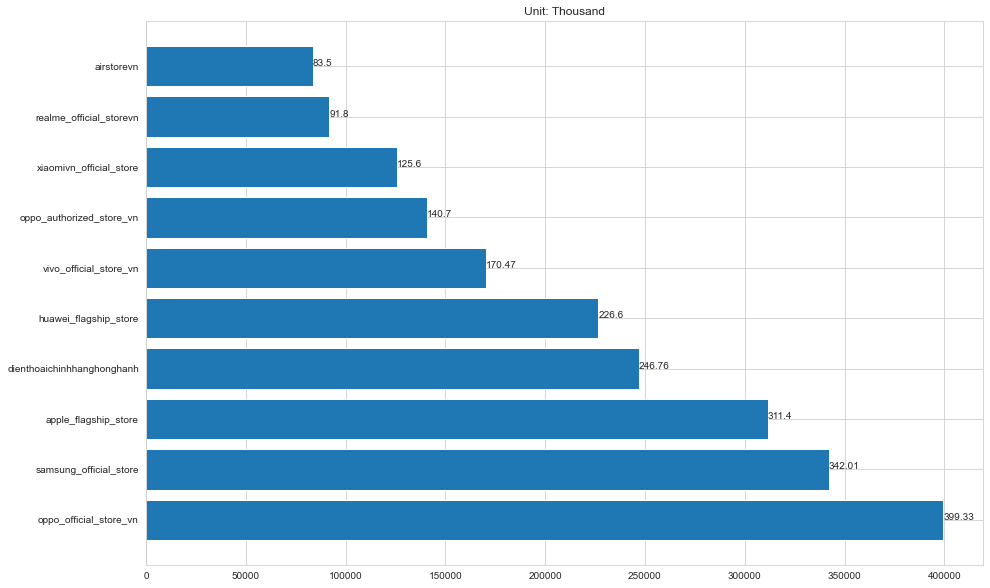

In [2676]:
plt.figure(figsize=(15,10))


plt.barh(y=top_10_follower['shop_name'],
        width= top_10_follower['follower'])

for index, values in enumerate(top_10_follower['follower']):
        plt.text(values, index, str(round(values/1e3, 2)))

plt.title('Unit: Thousand')

plt.show()

In [2687]:
df_test_3[df_test_3['shop_name'] == 'oppo_authorized_store_vn'].groupby(['company', 'shop_name']).count()

name  price  sold_out  \
company                  shop_name                                         
oppo_authorized_store_vn oppo_authorized_store_vn     8      8         8   

                                                   monthly_sold  \
company                  shop_name                                
oppo_authorized_store_vn oppo_authorized_store_vn             8   

                                                   monthly_revenue  \
company                  shop_name                                   
oppo_authorized_store_vn oppo_authorized_store_vn                8   

                                                   total_revenue  \
company                  shop_name                                 
oppo_authorized_store_vn oppo_authorized_store_vn              8   

                                                   rating_product  \
company                  shop_name                                  
oppo_authorized_store_vn oppo_authorized_store_vn               8   

                                                   rating_count_product  \
company                  shop_name                                        
oppo_authorized_store_vn oppo_authorized_store_vn                     8   

                                                   inventory  monthly_event  \
company                  shop_name                                            
oppo_authorized_store_vn oppo_authorized_store_vn          8              8   

                                                   ...  shopee_guaranteed  \
company                  shop_name                 ...                      
oppo_authorized_store_vn oppo_authorized_store_vn  ...                  8   

                                                   shop_total_review  \
company                  shop_name                                     
oppo_authorized_store_vn oppo_authorized_store_vn                  8   

                                                   total_products  \
company                  shop_name                                  
oppo_authorized_store_vn oppo_authorized_store_vn               8   

                                                   response_rate  \
company                  shop_name                                 
oppo_authorized_store_vn oppo_authorized_store_vn              8   

                                                   time_response  years_ex  \
company                  shop_name                                           
oppo_authorized_store_vn oppo_authorized_store_vn              8         8   

                                                   follower  store_location  \
company                  shop_name                                            
oppo_authorized_store_vn oppo_authorized_store_vn         8               8   

                                                   ShopDacBiet  product_url  
company                  shop_name                                           
oppo_authorized_store_vn oppo_authorized_store_vn            8            8  

[1 rows x 23 columns]

In [2688]:
df_test_3[df_test_3['shop_name'] == 'oppo_official_store_vn'].groupby(['company', 'shop_name']).count()

name  price  sold_out  \
company             shop_name                                       
OPPO Official Store oppo_official_store_vn     6      6         6   

                                            monthly_sold  monthly_revenue  \
company             shop_name                                               
OPPO Official Store oppo_official_store_vn             6                6   

                                            total_revenue  rating_product  \
company             shop_name                                               
OPPO Official Store oppo_official_store_vn              6               6   

                                            rating_count_product  inventory  \
company             shop_name                                                 
OPPO Official Store oppo_official_store_vn                     6          6   

                                            monthly_event  ...  \
company             shop_name                              ...   
OPPO Official Store oppo_official_store_vn              6  ...   

                                            shopee_guaranteed  \
company             shop_name                                   
OPPO Official Store oppo_official_store_vn                  6   

                                            shop_total_review  total_products  \
company             shop_name                                                   
OPPO Official Store oppo_official_store_vn                  6               6   

                                            response_rate  time_response  \
company             shop_name                                              
OPPO Official Store oppo_official_store_vn              6              6   

                                            years_ex  follower  \
company             shop_name                                    
OPPO Official Store oppo_official_store_vn         6         6   

                                            store_location  ShopDacBiet  \
company             shop_name                                             
OPPO Official Store oppo_official_store_vn               6            6   

                                            product_url  
company             shop_name                            
OPPO Official Store oppo_official_store_vn            6  

[1 rows x 23 columns]

Total review
upper whisker: 33000.00

In [2689]:
sum_shop_review_follower.describe()

shop_total_review  follower
count             503.00    503.00
mean            26544.82   9566.55
std            121709.15  34145.39
min                 0.00      0.00
25%                63.00    110.19
50%               305.00   1600.00
75%             14000.00   6450.00
max           2071000.00 399333.33

In [2691]:
sum_shop_review_follower[sum_shop_review_follower['shop_total_review'] > sum_shop_review_follower['shop_total_review'].mean()]

shop_name  shop_total_review  follower
11            alofonevietnam          213000.00  16900.00
13                amobile.vn           36000.00  44400.00
21      apple_flagship_store          185000.00 311400.00
23                 avstar.vn           27000.00  16300.00
28          baongocstore2016           73000.00  26800.00
..                       ...                ...       ...
489  xiaomi_authorized_store           36000.00  79700.00
491  xiaomivn_official_store          198000.00 125600.00
494                  xuongvn          164000.00   2700.00
495                xwatch.vn          262000.00   9600.00
498               yukimobile           29000.00  11200.00

[96 rows x 3 columns]

In [2693]:
top_10_total_review = sum_shop_review_follower[sum_shop_review_follower['shop_total_review'] > sum_shop_review_follower['shop_total_review'].mean()].sort_values(by='shop_total_review', ascending= False)[:10]
top_10_total_review

shop_name  shop_total_review  follower
276            perfectstyle         2071000.00  24200.00
419                thuy.dau         1255000.00  15100.00
163     huynhtan.xiaomiking          643000.00  41000.00
259             nguyetphi44          536000.00  34600.00
331  samsung_official_store          397076.92 342007.69
461         tuanduongmobile          329000.00  20300.00
170              khanhhanpc          291000.00  21700.00
495               xwatch.vn          262000.00   9600.00
157                huy13691          236000.00  17700.00
424             thuythuy889          225000.00  43000.00

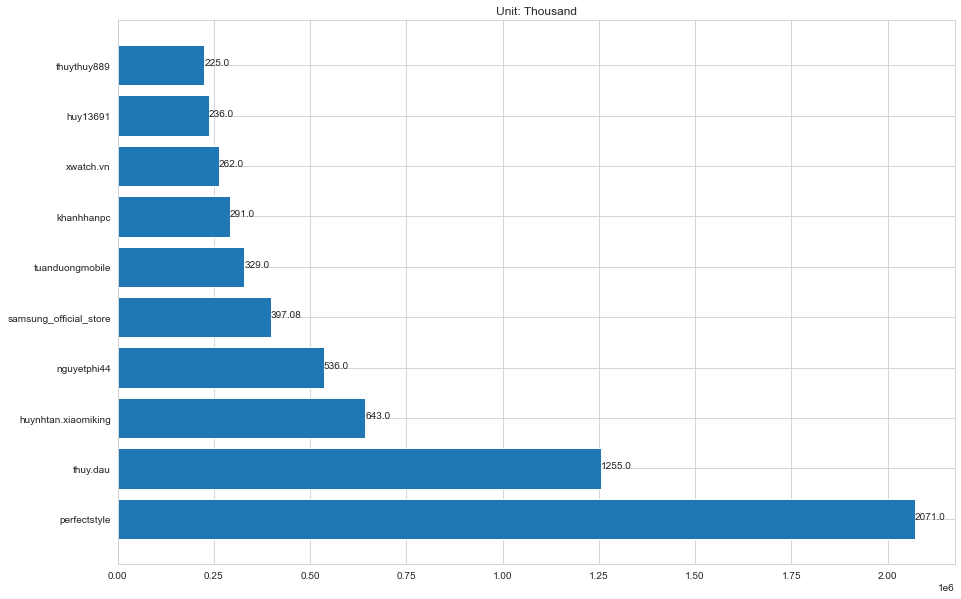

In [2694]:
plt.figure(figsize=(15,10))


plt.barh(y=top_10_total_review['shop_name'],
        width= top_10_total_review['shop_total_review'])

for index, values in enumerate(top_10_total_review['shop_total_review']):
        plt.text(values, index, str(round(values/1e3, 2)))

plt.title('Unit: Thousand')

plt.show()

## Discount

In [2698]:
df_test_3.groupby('shop_name')['discount_tag'].sum().sort_values(ascending=False)

shop_name
smartphone_baochau        25.58
baongocstore2016           6.39
thuythuy889                3.64
tphone_hn                  3.62
dienthoaididongcocom       1.80
                           ... 
linhkiendienthoaididong    0.00
linhkiendienthoai_ap41     0.00
linhkienbaoan2018          0.00
linhkien_manhcuong         0.00
zudishop                   0.00
Name: discount_tag, Length: 503, dtype: float64

In [2710]:
discount = df_test_3.groupby('shop_name')['discount_tag'].sum().sort_values(ascending=False).reset_index()
discount


shop_name  discount_tag
0         smartphone_baochau         25.58
1           baongocstore2016          6.39
2                thuythuy889          3.64
3                  tphone_hn          3.62
4       dienthoaididongcocom          1.80
..                       ...           ...
498  linhkiendienthoaididong          0.00
499   linhkiendienthoai_ap41          0.00
500        linhkienbaoan2018          0.00
501       linhkien_manhcuong          0.00
502                 zudishop          0.00

[503 rows x 2 columns]

In [2701]:
discount.mean()

discount_tag   0.25
dtype: float64

In [2705]:
discount.describe()

discount_tag
count        503.00
mean           0.25
std            1.23
min            0.00
25%            0.00
50%            0.00
75%            0.20
max           25.58

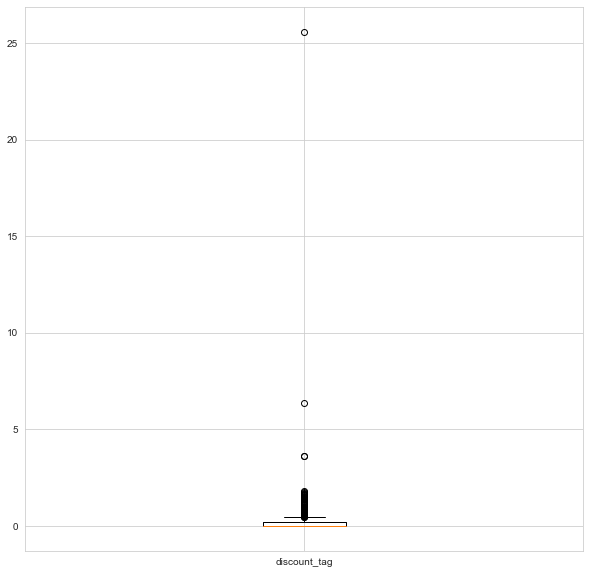

label  lower_whisker  lower_quartile  median  upper_quartile  \
0  discount_tag           0.00            0.00    0.00            0.20   

   upper_whisker  
0           0.48

In [2707]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

discount       = discount['discount_tag']


labels = ['discount_tag']

plt.figure(figsize=(10,10))
bp = plt.boxplot([discount], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

In [ ]:
store_location

store_location  shop_name
0            An Giang          2
1   Bà Rịa - Vũng Tàu          1
2          Bình Dương          3
3          Bình Phước          2
4           Bình Định          1
5            Bạc Liêu          1
6           Bắc Giang          1
7             Bắc Kạn          1
8            Bắc Ninh          9
9             Bến Tre          3
10           Cao Bằng          1
11            Cần Thơ          1
12             Hà Nam          3
13             Hà Nội        234
14            Hà Tĩnh          3
15           Hòa Bình          1
16           Hưng Yên          9
17          Hải Dương          6
18          Hải Phòng          8
19            Kon Tum          1
20            Long An          1
21            Lào Cai          6
22           Lâm Đồng          1
23           Lạng Sơn          4
24           Nam Định         29
25            Nghệ An          6
26          Ninh Bình          1
27            Phú Thọ          8
28            Phú Yên          1
29         Quảng Bình          1
30          Quảng Nam          4
31         Quảng Ninh          1
32          Quảng Trị          1
33             Sơn La          1
34    TP. Hồ Chí Minh        115
35          Thanh Hóa          6
36          Thái Bình          3
37        Thái Nguyên          6
38     Thừa Thiên Huế          1
39        Tuyên Quang          4
40           Tây Ninh          1
41          Vĩnh Phúc          7
42            Yên Bái          1
43          Điện Biên          1
44            Đà Nẵng          1
45           Đồng Nai          1

In [2711]:
discount

shop_name  discount_tag
0         smartphone_baochau         25.58
1           baongocstore2016          6.39
2                thuythuy889          3.64
3                  tphone_hn          3.62
4       dienthoaididongcocom          1.80
..                       ...           ...
498  linhkiendienthoaididong          0.00
499   linhkiendienthoai_ap41          0.00
500        linhkienbaoan2018          0.00
501       linhkien_manhcuong          0.00
502                 zudishop          0.00

[503 rows x 2 columns]

In [2713]:
top_10_sum_discount = discount[discount['discount_tag'] > discount['discount_tag'].mean()][:10]
top_10_sum_discount

shop_name  discount_tag
0       smartphone_baochau         25.58
1         baongocstore2016          6.39
2              thuythuy889          3.64
3                tphone_hn          3.62
4     dienthoaididongcocom          1.80
5     longhung_mobilestore          1.79
6           smartchoice247          1.69
7          tranglinhmobile          1.66
8  shopdunk_official_store          1.65
9          longhung_mobile          1.63

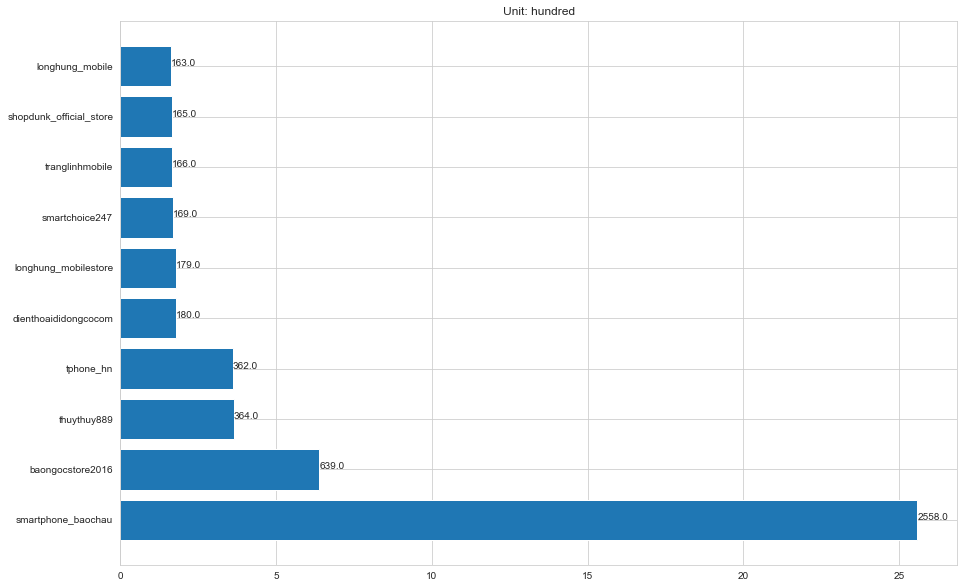

In [2714]:
plt.figure(figsize=(15,10))


plt.barh(y=top_10_sum_discount['shop_name'],
        width= top_10_sum_discount['discount_tag'])

for index, values in enumerate(top_10_sum_discount['discount_tag']):
        plt.text(values, index, str(round(values*1e2, 2)))

plt.title('Unit: hundred')

plt.show()

## Summary

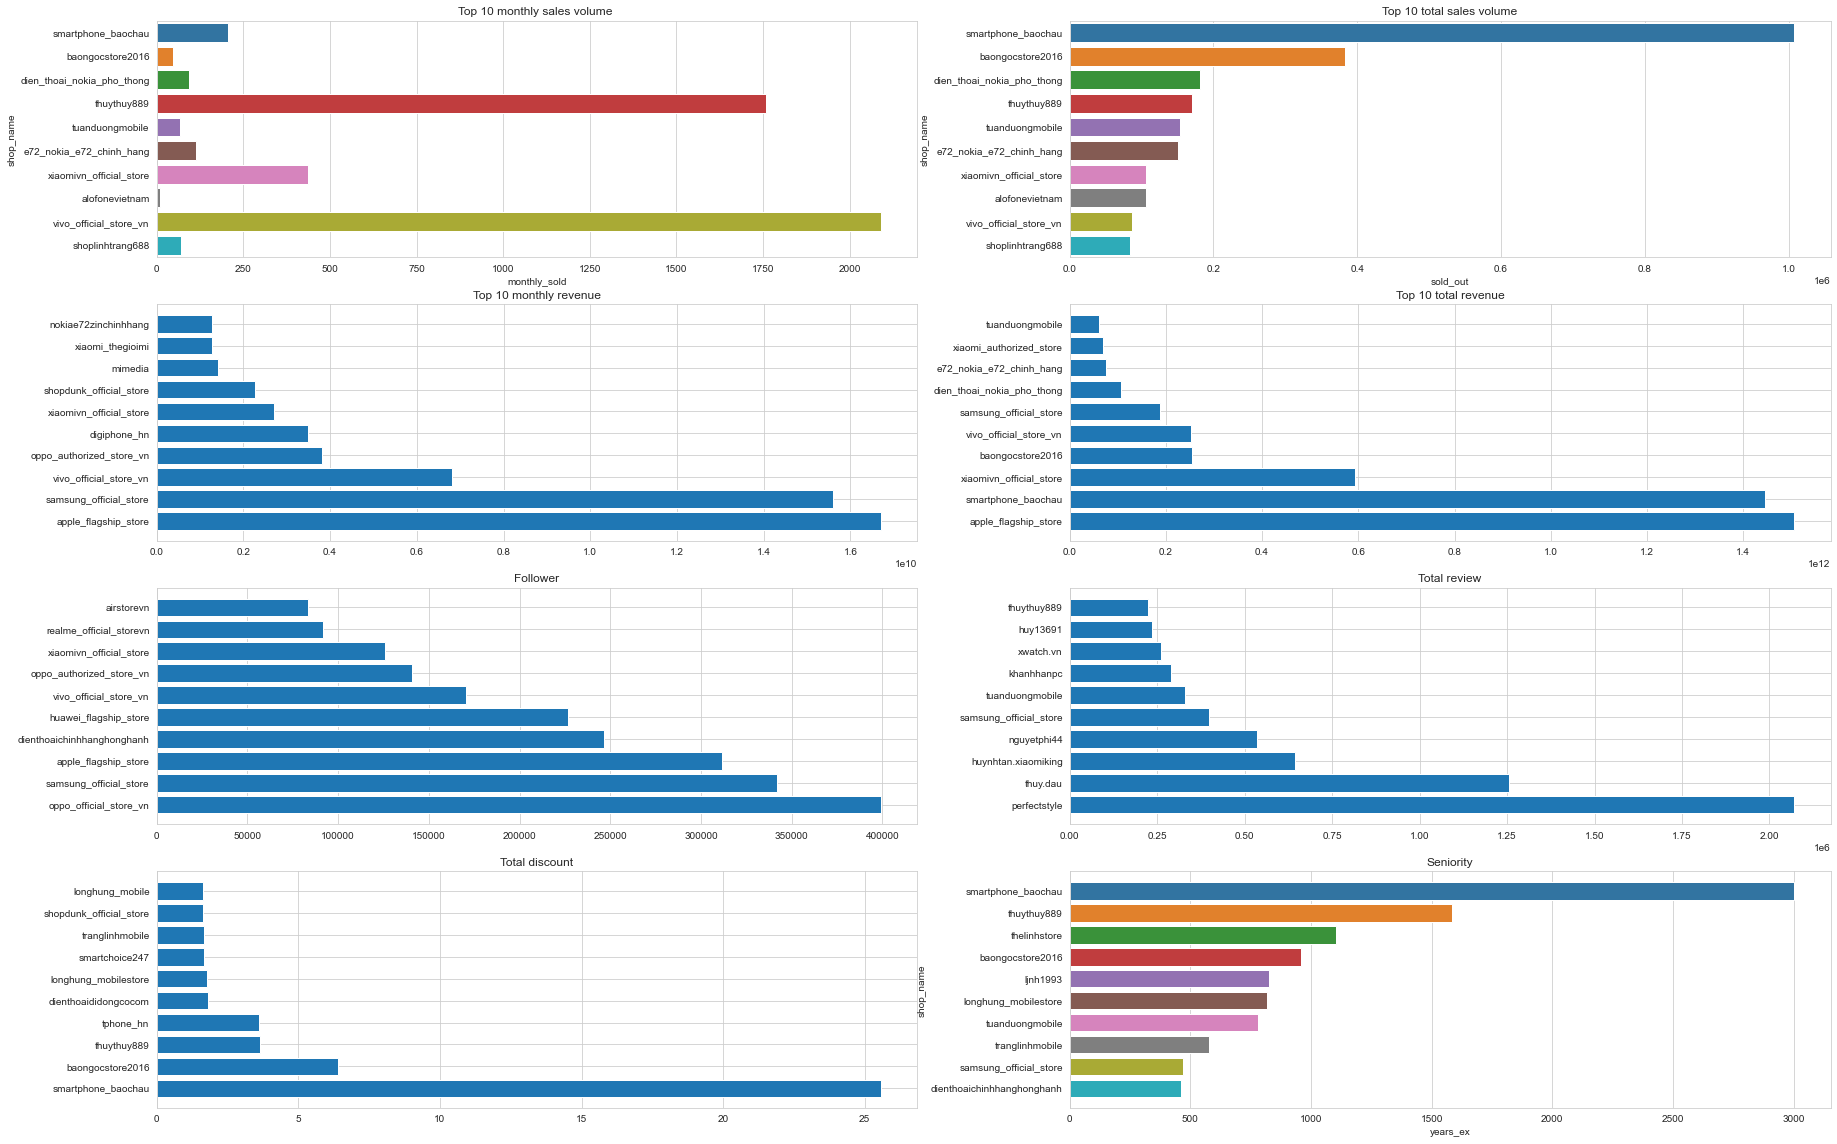

In [2717]:
plt.figure(figsize=(30,20))

''' 1. Sales volume '''
plt.subplot(421)
sns.barplot(data = top_10_sold_out,
            x = 'monthly_sold', y='shop_name')
plt.title('Top 10 monthly sales volume ')

plt.subplot(422)
sns.barplot(data = top_10_sold_out,
            x = 'sold_out', y='shop_name'
            )
plt.title('Top 10 total sales volume')

''' 2. Revenue '''
plt.subplot(423)
plt.barh(y=top_10_monthly_revenue['shop_name'],
        width= top_10_monthly_revenue['monthly_revenue'])
plt.title('Top 10 monthly revenue')

plt.subplot(424)
plt.barh(y=top_10_total_revenue['shop_name'],
        width= top_10_total_revenue['total_revenue'])

plt.title('Top 10 total revenue')

''' 2. Follower '''
plt.subplot(425)
plt.barh(y=top_10_follower['shop_name'],
        width= top_10_follower['follower'])
plt.title('Follower')


''' 2. Total review '''
plt.subplot(426)
plt.barh(y=top_10_total_review['shop_name'],
        width= top_10_total_review['shop_total_review'])
plt.title('Total review')

''' 2. Total discount '''
plt.subplot(427)
plt.barh(y=top_10_sum_discount['shop_name'],
        width= top_10_sum_discount['discount_tag'])
plt.title('Total discount')


''' 3. Seniority '''
plt.subplot(428)
sns.barplot(data = top_10_shop_ex,
            x = 'years_ex', y='shop_name'
            )
plt.title('Seniority')

plt.axis('tight')
plt.show()

### Compare price Bao Chau and apple, samsung

In [2748]:
df_test_3[df_test_3['shop_name'] == 'thuythuy889'].T

6     \
name                  điện thoại nokia 101,nokia 100, nokia 105 zin ...   
price                                                          70755.00   
sold_out                                                       92000.00   
monthly_sold                                                     665.00   
monthly_revenue                                             47052075.00   
total_revenue                                             6509460000.00   
rating_product                                                     4.65   
rating_count_product                                            3078.00   
inventory                                                         68.00   
monthly_event                                                         1   
favorite_product                                                      1   
discount_tag                                                       0.47   
company                                                    hà bắc Store   
shop_name                                                   thuythuy889   
shopee_mall_x                                                      0.00   
shopee_guaranteed                                                     1   
shop_total_review                                             225000.00   
total_products                                                   250.00   
response_rate                                                      0.96   
time_response                                                         1   
years_ex                                                          72.00   
follower                                                       43000.00   
store_location                                                   Hà Nội   
ShopDacBiet                                                           1   
product_url           https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...   

                                                                   8     \
name                  điện thoại nghe gọi nokia 105 zin chính hãng b...   
price                                                          76380.00   
sold_out                                                       42000.00   
monthly_sold                                                     564.00   
monthly_revenue                                             43078320.00   
total_revenue                                             3207960000.00   
rating_product                                                     4.64   
rating_count_product                                            1399.00   
inventory                                                       1046.00   
monthly_event                                                         1   
favorite_product                                                      1   
discount_tag                                                       0.24   
company                                                    hà bắc Store   
shop_name                                                   thuythuy889   
shopee_mall_x                                                      0.00   
shopee_guaranteed                                                     1   
shop_total_review                                             225000.00   
total_products                                                   250.00   
response_rate                                                      0.96   
time_response                                                         1   
years_ex                                                          72.00   
follower                                                       43000.00   
store_location                                                   Hà Nội   
ShopDacBiet                                                           1   
product_url           https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...   

                                                                   15    \
name                  điện thoại nokia 101, nokia 105 - máy 2 sim 2 ...   
price          

In [2721]:
mean_price_shop = df_test_3.groupby('shop_name')['price'].mean().sort_values(ascending=False).reset_index()
mean_price_shop

shop_name       price
0    dienmaynguyenantanbinh 25999000.00
1      apple_flagship_store 23439725.00
2              phambaoloc09 20242000.00
3         redmagic_official 19990000.00
4            bichngocmobile 19806666.67
..                      ...         ...
498    chuyenmuasam96_store     5000.00
499      linhkien_manhcuong     5000.00
500            vongdautam91     4000.00
501          giang_96.huong     3000.00
502           hieuhoangtien     1000.00

[503 rows x 2 columns]

In [2744]:
mean_price_shop[(mean_price_shop['shop_name'] == 'apple_flagship_store') | (mean_price_shop['shop_name'] == 'smartphone_baochau') | (mean_price_shop['shop_name'] == 'samsung_official_store')]

shop_name       price
1      apple_flagship_store 23439725.00
10   samsung_official_store 11937792.31
148      smartphone_baochau  1655417.53

In [2738]:
mean_price_baochau = mean_price_shop[mean_price_shop['shop_name'] == 'smartphone_baochau']['price']
mean_price_baochau

148   1655417.53
Name: price, dtype: float64

In [2737]:
mean_price_apple = mean_price_shop[mean_price_shop['shop_name'] == 'apple_flagship_store']['price']
mean_price_apple

1   23439725.00
Name: price, dtype: float64

In [2743]:
mean_price_apple.iloc[0]/mean_price_baochau.iloc[0]

14.159403661617322

In [2745]:
mean_price_ss = mean_price_shop[mean_price_shop['shop_name'] == 'samsung_official_store']['price']
mean_price_ss

10   11937792.31
Name: price, dtype: float64

In [2746]:
mean_price_ss.iloc[0]/mean_price_baochau.iloc[0]

7.211348260833502

## plot correlation total revenue

seniority

<AxesSubplot:xlabel='total_revenue', ylabel='years_ex'>

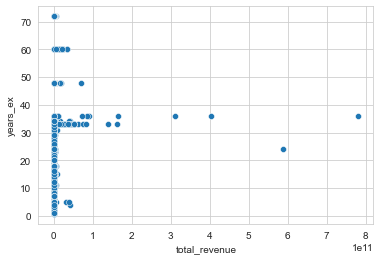

In [2758]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['years_ex'])

Follower

<AxesSubplot:xlabel='total_revenue', ylabel='follower'>

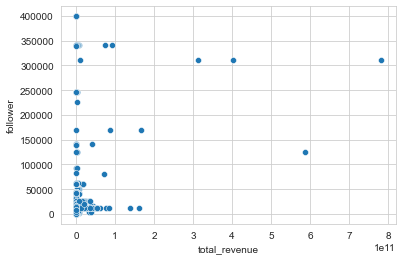

In [2759]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['follower'])

Total_review

<AxesSubplot:xlabel='total_revenue', ylabel='shop_total_review'>

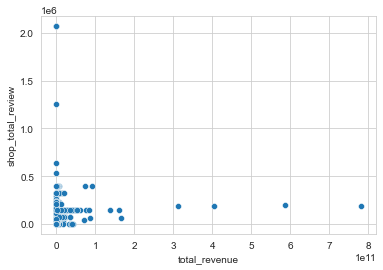

In [2760]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['shop_total_review'])

Discount

<AxesSubplot:xlabel='total_revenue', ylabel='discount_tag'>

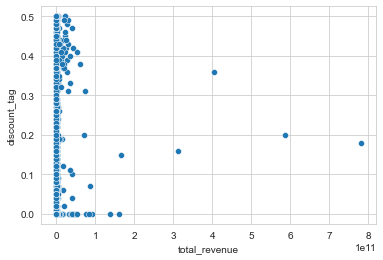

In [2761]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['discount_tag'])

monthly_event

<AxesSubplot:xlabel='total_revenue', ylabel='monthly_event'>

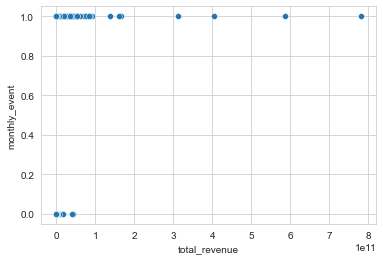

In [2766]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['monthly_event'])

Favorite product

<AxesSubplot:xlabel='total_revenue', ylabel='favorite_product'>

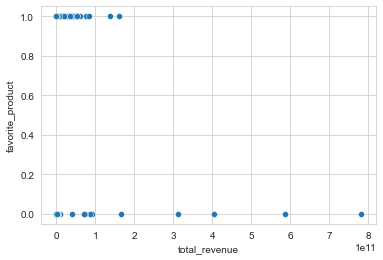

In [2767]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['favorite_product'])

shopee_mall

<AxesSubplot:xlabel='total_revenue', ylabel='shopee_mall_x'>

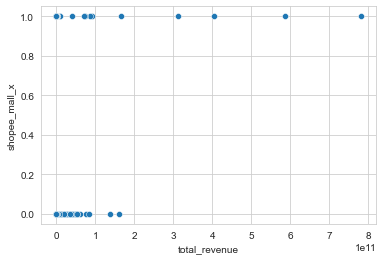

In [2768]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['shopee_mall_x'])

shopee_guaranteed

<AxesSubplot:xlabel='total_revenue', ylabel='shopee_guaranteed'>

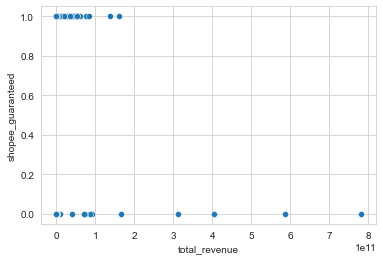

In [2769]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['shopee_guaranteed'])

Total product

<AxesSubplot:xlabel='total_revenue', ylabel='total_products'>

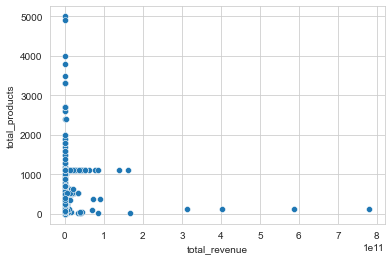

In [2770]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['total_products'])

response_rate

<AxesSubplot:xlabel='total_revenue', ylabel='response_rate'>

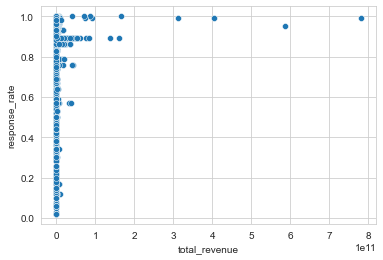

In [2771]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['response_rate'])

time_response

<AxesSubplot:xlabel='total_revenue', ylabel='time_response'>

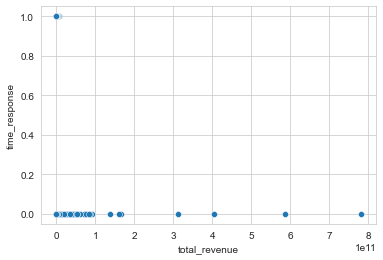

In [2772]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['time_response'])

ShopDacBiet

<AxesSubplot:xlabel='total_revenue', ylabel='ShopDacBiet'>

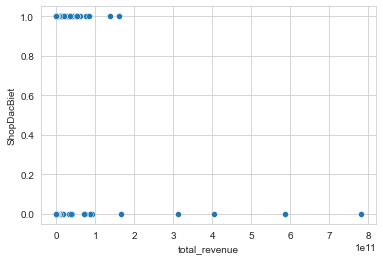

In [2773]:
sns.scatterplot(x=df_test_3['total_revenue'],
                y =  df_test_3['ShopDacBiet'])

## Location

In [2818]:
store_location = df_test_3.groupby(['store_location', 'shop_name'])['name'].count().reset_index()
store_location['name'] = store_location['name'].astype(str)

In [2824]:
store_location = store_location.groupby('store_location').count().drop(columns='name').reset_index()


store_location    An GiangBà Rịa - Vũng TàuBình DươngBình PhướcB...
shop_name                                                       503
dtype: object

In [2827]:
geo_store_loc = pd.merge(geo, store_location,  how='outer', left_on='Ten', right_on='store_location')
geo_store_loc.head()

Ten                                           geometry  \
0  Quảng Trị  MULTIPOLYGON (((107.34315 17.14968, 107.34306 ...   
1  Bắc Giang  MULTIPOLYGON (((106.16244 21.62476, 106.16959 ...   
2   Bắc Ninh  MULTIPOLYGON (((106.00027 21.25811, 106.01268 ...   
3     Hà Nội  MULTIPOLYGON (((105.81271 21.38043, 105.81380 ...   
4  Khánh Hòa  MULTIPOLYGON (((113.85240 7.41174, 113.86407 7...   

  store_location  shop_name  
0      Quảng Trị       1.00  
1      Bắc Giang       1.00  
2       Bắc Ninh       9.00  
3         Hà Nội     234.00  
4            NaN        NaN

In [2836]:
geo_store_loc.shape

(63, 4)

In [2843]:
geo_store_loc.fillna('unknown', inplace=True)

In [2863]:
a = geo_store_loc['shop_name'].str.contains('unknown')
geo_store_loc['shop_name'] = np.where(a == True, 0.0, geo_store_loc['shop_name'])
geo_store_loc['shop_name']
    # print(df_test_2['name'])

0      1.00
1      1.00
2      9.00
3    234.00
4      0.00
      ...  
58     0.00
59     1.00
60     0.00
61     0.00
62     0.00
Name: shop_name, Length: 63, dtype: object

In [2864]:
def geo_loc_na(row):
    if row['store_location'] == 'unknown':
        row['store_location'] = row['Ten']
        return row['store_location']
    else:
        return row['store_location']

In [2867]:
geo_store_loc['store_location'] = geo_store_loc.apply(geo_loc_na, axis=1)

In [2868]:
geo_store_loc[geo_store_loc['store_location'].isna()].reset_index()

Empty GeoDataFrame
Columns: [index, Ten, geometry, store_location, shop_name]
Index: []

In [2882]:
geo_store_loc.sort_values(by='shop_name', ascending=False)[:20]

Ten                                           geometry  \
3            Hà Nội  MULTIPOLYGON (((105.81271 21.38043, 105.81380 ...   
14  TP. Hồ Chí Minh  MULTIPOLYGON (((106.46385 11.16001, 106.46630 ...   
23         Nam Định  MULTIPOLYGON (((106.13491 20.49515, 106.14037 ...   
2          Bắc Ninh  MULTIPOLYGON (((106.00027 21.25811, 106.01268 ...   
19         Hưng Yên  MULTIPOLYGON (((106.10210 20.99730, 106.10921 ...   
33          Phú Thọ  MULTIPOLYGON (((105.09902 21.71680, 105.10194 ...   
8         Hải Phòng  MULTIPOLYGON (((106.62546 21.01149, 106.63707 ...   
16        Vĩnh Phúc  MULTIPOLYGON (((105.54559 21.57223, 105.55300 ...   
48          Lào Cai  MULTIPOLYGON (((104.25990 22.84511, 104.26191 ...   
39          Nghệ An  MULTIPOLYGON (((105.77858 18.80648, 105.78017 ...   
13        Hải Dương  MULTIPOLYGON (((106.49245 21.22801, 106.49878 ...   
9       Thái Nguyên  MULTIPOLYGON (((105.70716 22.02297, 105.71542 ...   
6         Thanh Hóa  MULTIPOLYGON (((105.90945 19.31991, 105.90996 ...   
52      Tuyên Quang  MULTIPOLYGON (((105.16924 22.69021, 105.17402 ...   
37         Lạng Sơn  MULTIPOLYGON (((106.24928 22.45845, 106.25417 ...   
46        Quảng Nam  MULTIPOLYGON (((108.70402 15.45876, 108.70298 ...   
35       Bình Dương  MULTIPOLYGON (((106.44339 11.49854, 106.44894 ...   
51           Hà Nam  MULTIPOLYGON (((106.02207 20.69797, 106.02595 ...   
50          Bến Tre  MULTIPOLYGON (((106.44833 10.30650, 106.45725 ...   
18        Thái Bình  MULTIPOLYGON (((106.40750 20.72853, 106.40889 ...   

     store_location shop_name  
3            Hà Nội    234.00  
14  TP. Hồ Chí Minh    115.00  
23         Nam Định     29.00  
2          Bắc Ninh      9.00  
19         Hưng Yên      9.00  
33          Phú Thọ      8.00  
8         Hải Phòng      8.00  
16        Vĩnh Phúc      7.00  
48          Lào Cai      6.00  
39          Nghệ An      6.00  
13        Hải Dương      6.00  
9       Thái Nguyên      6.00  
6         Thanh Hóa      6.00  
52      Tuyên Quang      4.00  
37         Lạng Sơn      4.00  
46        Quảng Nam      4.00  
35       Bình Dương      3.00  
51           Hà Nam      3.00  
50          Bến Tre      3.00  
18        Thái Bình      3.00

<AxesSubplot:>

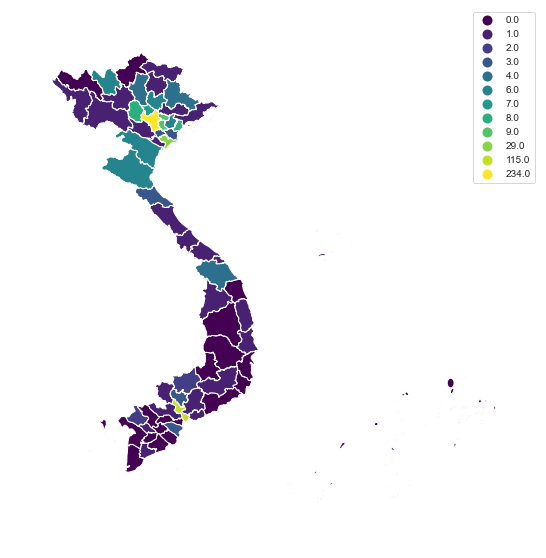

In [2878]:
gplt.choropleth(geo_store_loc, hue = geo_store_loc['shop_name'], cmap = 'viridis', figsize = (15,10), legend=True)

## Segmentation

In [2981]:
def segmentation(series):
    if series < 2000000:
        return 'Ultra Low-end'

    elif 2000000 <= series < 5000000: # SS A12 + A02
        return 'Low end'

    elif 5000000 <= series < 8000000: # SS S20FE
        return 'Mid end'

    elif 8000000 <= series < 10000000: # SS A51
        return 'Mid to High end'

    elif 10000000 <= series < 15000000: # SS  A52s
        return 'High end'

    elif series >15000000: # SS Z Fold3 | S21
        return 'Premium'

In [2983]:
df_test_3.drop(columns='segmentation', inplace=True)

In [2984]:
df_test_3['segmentation'] = df_test_3['price'].apply(segmentation)

In [2973]:
df_test_3.T

1     \
name                  điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...   
price                                                        3391500.00   
sold_out                                                       49000.00   
monthly_sold                                                    1800.00   
monthly_revenue                                           6104700000.00   
total_revenue                                           166183500000.00   
rating_product                                                     4.95   
rating_count_product                                             978.00   
inventory                                                       1711.00   
monthly_event                                                         1   
favorite_product                                                      0   
discount_tag                                                       0.15   
company                                             VIVO OFFICIAL STORE   
shop_name                                        vivo_official_store_vn   
shopee_mall_x                                                      1.00   
shopee_guaranteed                                                     0   
shop_total_review                                              67000.00   
total_products                                                    28.00   
response_rate                                                      1.00   
time_response                                                         0   
years_ex                                                          36.00   
follower                                                      170500.00   
store_location                                          TP. Hồ Chí Minh   
ShopDacBiet                                                           0   
product_url           https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...   
segmentation                                                    Low end   

                                                                   2     \
name                                               apple iphone 11 64gb   
price                                                       11513600.00   
sold_out                                                       35000.00   
monthly_sold                                                    1100.00   
monthly_revenue                                          12664960000.00   
total_revenue                                           402976000000.00   
rating_product                                                     4.83   
rating_count_product                                            1184.00   
inventory                                                          0.00   
monthly_event                                                         1   
favorite_product                                                      0   
discount_tag                                                       0.36   
company                                            Apple Flagship Store   
shop_name                                          apple_flagship_store   
shopee_mall_x                                                      1.00   
shopee_guaranteed                                                     0   
shop_total_review                                             185000.00   
total_products                                                   129.00   
response_rate                                                      0.99   
time_response                                                         0   
years_ex                                                          36.00   
follower                                                      311300.00   
store_location                                          TP. Hồ Chí Minh   
ShopDacBiet                                                           0   
product_url           https://shopee.vn/Apple-iPhone-11-64GB-i.88201...   
segmentation                                                   High end   

               

### Quantity every single segment

In [2990]:
quantity_segment = df_test_3.groupby('segmentation')['name'].count().reset_index().sort_values(by='name', ascending=False)
quantity_segment

segmentation  name
5    Ultra Low-end   884
1          Low end   304
2          Mid end    94
4          Premium    23
3  Mid to High end    20
0         High end    17

<AxesSubplot:xlabel='name', ylabel='segmentation'>

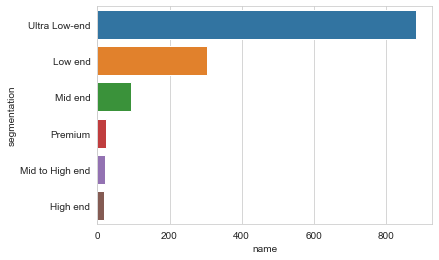

In [2991]:
sns.barplot(data = quantity_segment,
            x = 'name',
            y='segmentation')

revenue in single segmentation

In [2992]:
revenue_segmentation = df_test_3.groupby('segmentation')['monthly_revenue', 'total_revenue'].sum().reset_index().sort_values(by='monthly_revenue', ascending=False)
revenue_segmentation

segmentation  monthly_revenue    total_revenue
1          Low end   26599035542.10 1226706869462.20
2          Mid end   16790116514.00  730119390540.00
0         High end   16066911580.00  415015858080.00
4          Premium    9028999500.00 1138719094800.00
5    Ultra Low-end    4233842450.76 1384817014460.11
3  Mid to High end    3335248018.50   10839632354.00

In [2902]:
revenue_segmentation.columns[:0]

Index([], dtype='object')

In [2910]:
# Indetifier: Columns that stay in long form
identifiers = revenue_segmentation.columns[:1]

# Values: columns to convert to long form
values = revenue_segmentation.columns[1:]

# Convert
revenue_segmentation_melt = revenue_segmentation.melt(id_vars=identifiers,
                        value_vars=values,
                        var_name='monthly_total',
                        value_name='revenue')

In [2911]:
revenue_segmentation_melt

segmentation    monthly_total          revenue
0           Low end  monthly_revenue   26599035542.10
1           Mid end  monthly_revenue   16790116514.00
2          High end  monthly_revenue   16066911580.00
3           Premium  monthly_revenue    4879688200.00
4     Ultra Low-end  monthly_revenue    4233842450.76
5   Mid to High end  monthly_revenue    3335248018.50
6           Low end    total_revenue 1226706869462.20
7           Mid end    total_revenue  730119390540.00
8          High end    total_revenue  415015858080.00
9           Premium    total_revenue 1106887929100.00
10    Ultra Low-end    total_revenue 1384817014460.11
11  Mid to High end    total_revenue   10839632354.00

<AxesSubplot:xlabel='revenue', ylabel='segmentation'>

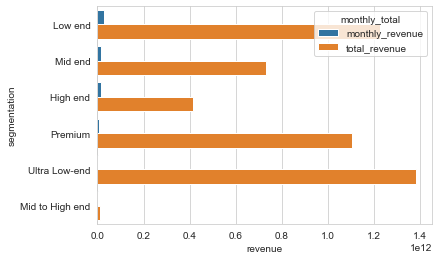

In [2907]:
sns.barplot(data = revenue_segmentation,
            x = 'revenue',
            y = 'segmentation',
            hue='monthly_total')

In [2980]:
list(quantity_segment['segmentation'])

['Ultra Low-end',
 'Low end',
 'Mid end',
 'Premium',
 'Mid to High end',
 'High end']

In [2993]:
sold_segmentation = df_test_3.groupby('segmentation')['sold_out'].sum().reset_index()
sold_segmentation

segmentation   sold_out
0         High end   36019.00
1          Low end  369392.00
2          Mid end  127769.00
3  Mid to High end    1197.00
4          Premium   42052.00
5    Ultra Low-end 2366333.00

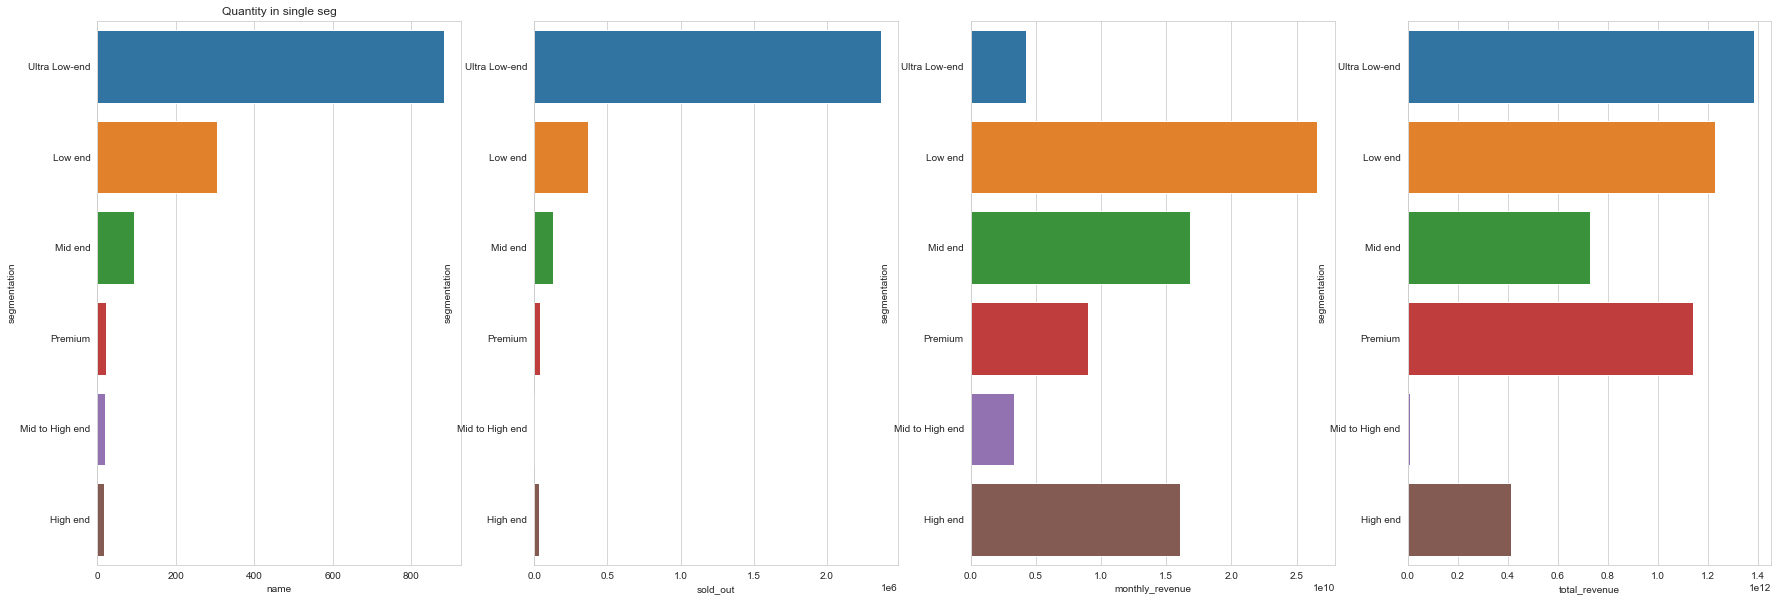

In [2994]:
plt.figure(figsize=(30,10))
order_list = list(quantity_segment['segmentation'])

plt.subplot(141)
sns.barplot(data = quantity_segment,
            x = 'name',
            y='segmentation',
            order=order_list)
plt.title('Quantity in single seg')

plt.subplot(142)
sns.barplot(data = sold_segmentation,
            x = 'sold_out',
            y='segmentation',
            order=order_list)


plt.subplot(143)
sns.barplot(data = revenue_segmentation,
            x = 'monthly_revenue',
            y = 'segmentation',
            order=order_list)

plt.subplot(144)
sns.barplot(data = revenue_segmentation,
            x = 'total_revenue',
            y = 'segmentation',
            order=order_list)

plt.show()

### EDA single segmentation

#### Ultra low end

In [2929]:
df_test_3.columns

Index(['name', 'price', 'sold_out', 'monthly_sold', 'monthly_revenue',
       'total_revenue', 'rating_product', 'rating_count_product', 'inventory',
       'monthly_event', 'favorite_product', 'discount_tag', 'company',
       'shop_name', 'shopee_mall_x', 'shopee_guaranteed', 'shop_total_review',
       'total_products', 'response_rate', 'time_response', 'years_ex',
       'follower', 'store_location', 'ShopDacBiet', 'product_url',
       'segmentation'],
      dtype='object')

In [2930]:
list(quantity_segment['segmentation'])

['Ultra Low-end',
 'Low end',
 'Mid end',
 'Mid to High end',
 'High end',
 'Premium']

In [2995]:
ultra_low_end = df_test_3[df_test_3['segmentation'] == 'Ultra Low-end']

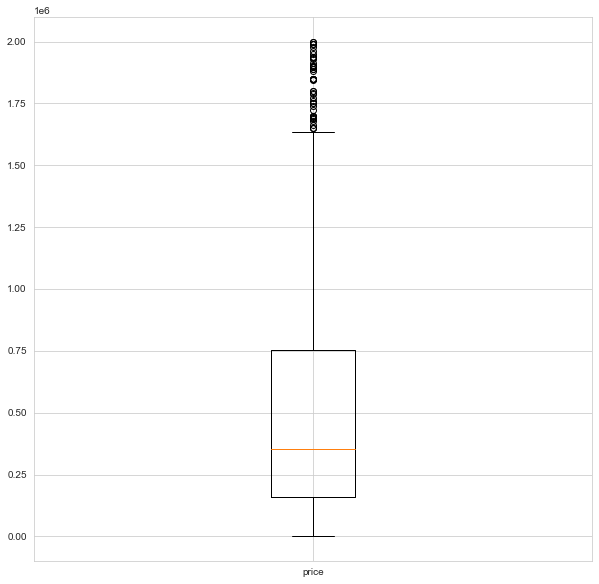

label  lower_whisker  lower_quartile    median  upper_quartile  \
0  price        1000.00       159832.50 351250.00       753952.50   

   upper_whisker  
0     1635140.00

In [2996]:
plot_ultra_low_end       = ultra_low_end['price']
labels = ['price']

plt.figure(figsize=(10,10))
bp = plt.boxplot([plot_ultra_low_end], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)


Text(0.5, 1.0, 'ultra_low_end')

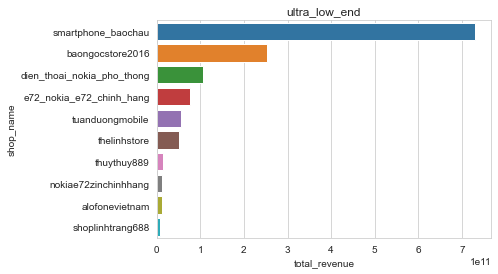

In [3018]:
sns.barplot(data = ultra_low_end.groupby('shop_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue' ,ascending=False)[:10],
            x = 'total_revenue', y = 'shop_name').set_title('ultra_low_end')

In [2950]:
def plot_correlation(dataframe):
    plt.figure(figsize=(15,15))
    sns.heatmap(dataframe.corr(), annot=True, cmap= 'Blues' )
    plt.show()



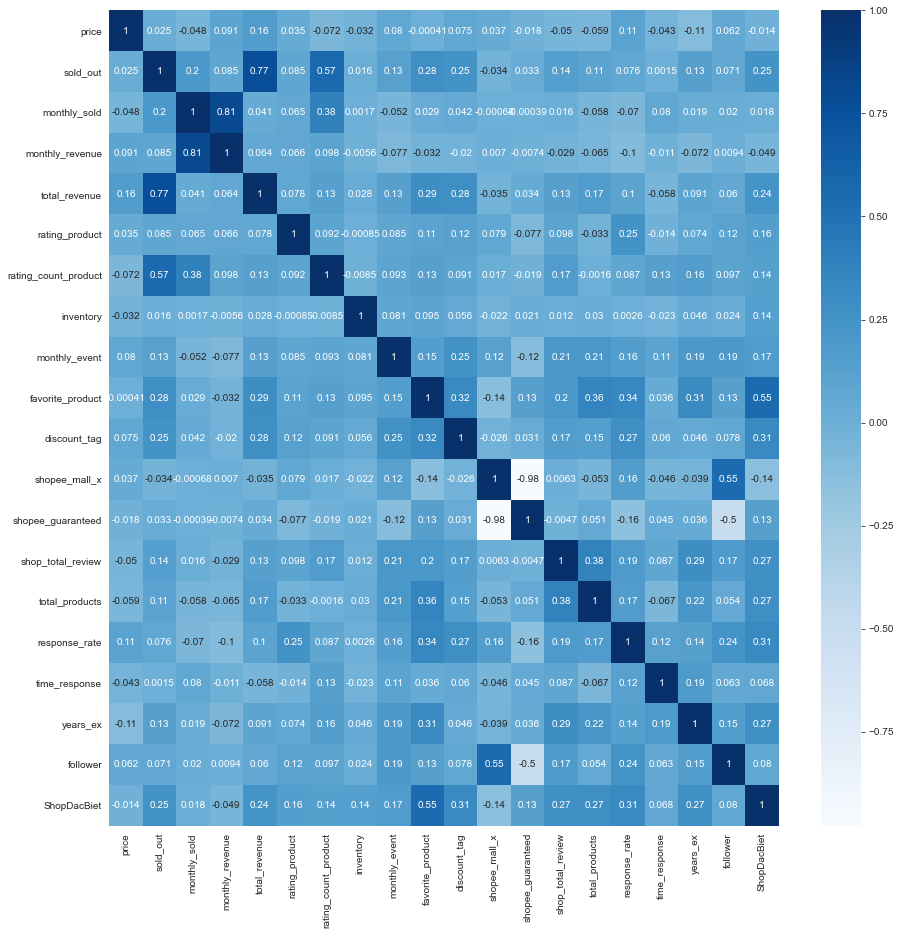

In [2997]:
plot_correlation(ultra_low_end)

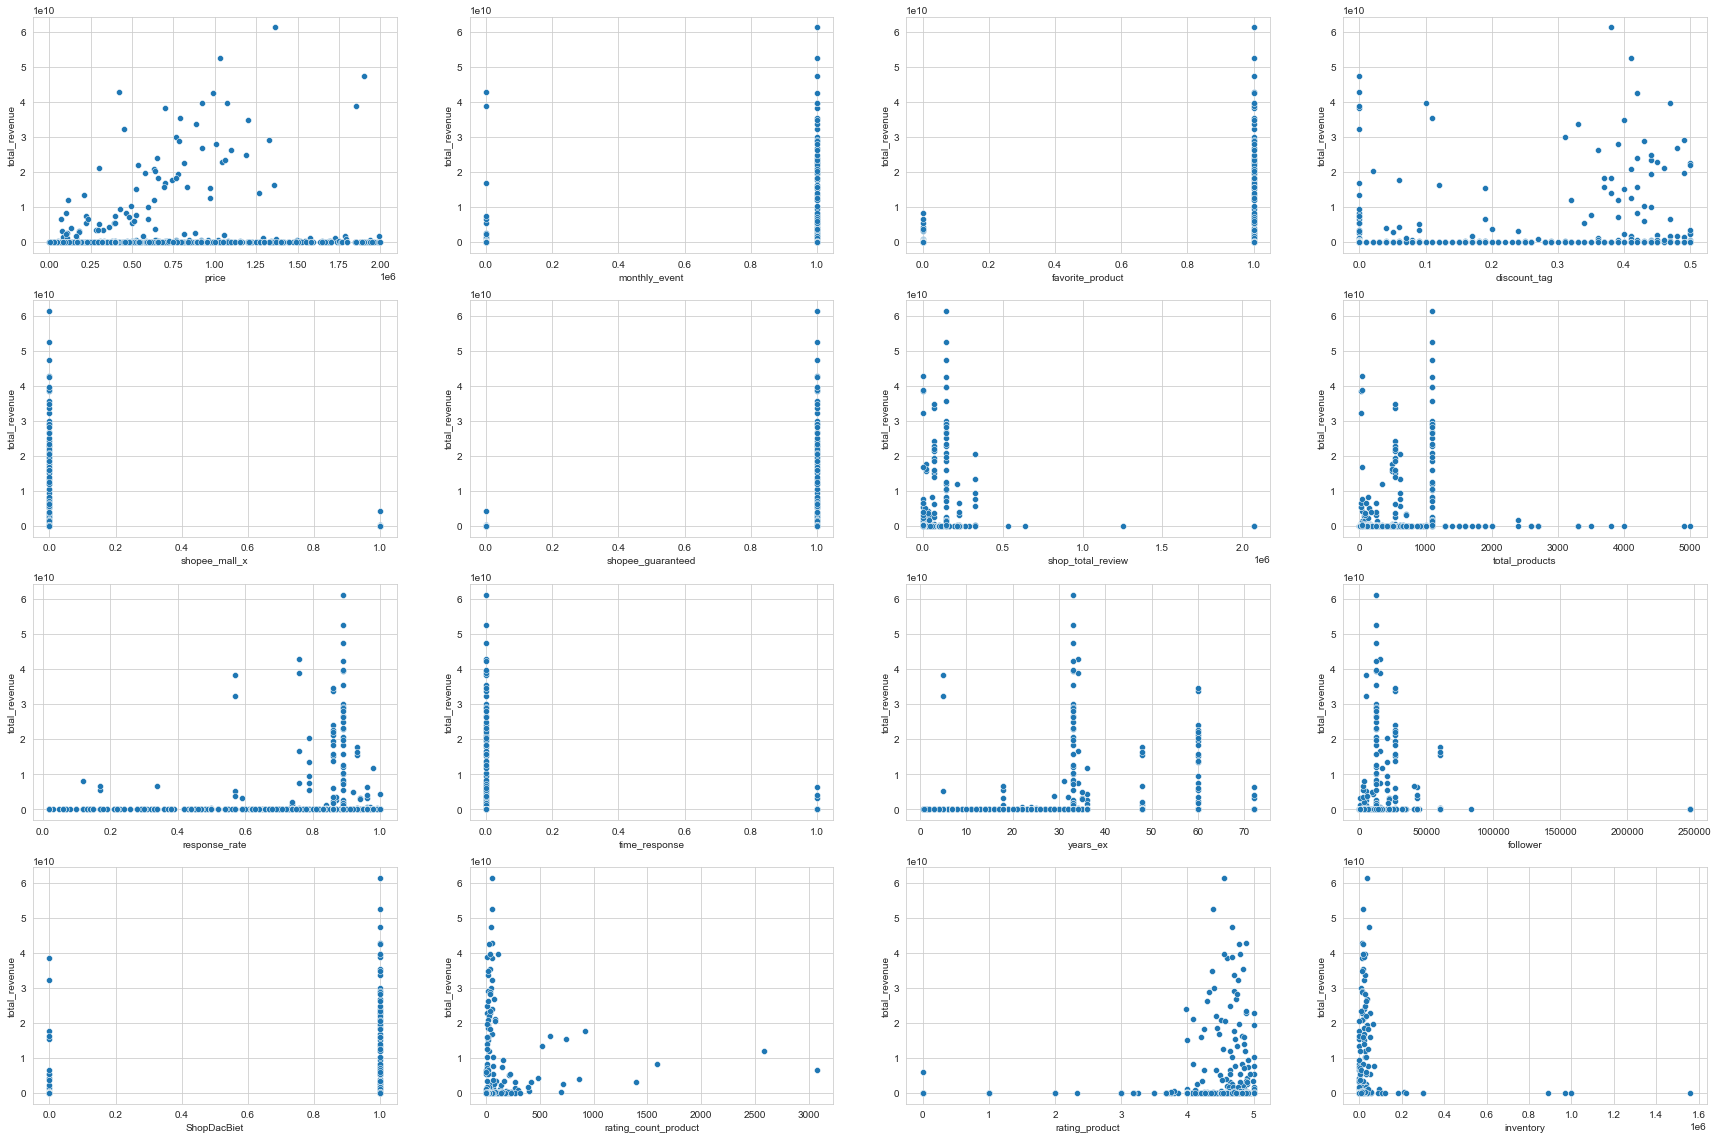

In [2998]:
plot_scatterplot(ultra_low_end)

In [2966]:
def plot_scatterplot(dataframe):
    plt.figure(figsize=(30,20))

    # 1. price
    plt.subplot(441)
    sns.scatterplot(dataframe['price'], dataframe['total_revenue'])

    # 2. monthly_event
    plt.subplot(442)  
    sns.scatterplot(dataframe['monthly_event'], dataframe['total_revenue'])

    # 3. favorite_product
    plt.subplot(443)
    sns.scatterplot(dataframe['favorite_product'], dataframe['total_revenue'])

    # 4. discount_tag
    plt.subplot(444)  
    sns.scatterplot(dataframe['discount_tag'], dataframe['total_revenue'])

    # 5. shopee_mall_x
    plt.subplot(445)      
    sns.scatterplot(dataframe['shopee_mall_x'], dataframe['total_revenue'])

    # 6. shopee_guaranteed
    plt.subplot(446)  
    sns.scatterplot(dataframe['shopee_guaranteed'], dataframe['total_revenue'])

    # 7. shop_total_review
    plt.subplot(447)
    sns.scatterplot(dataframe['shop_total_review'], dataframe['total_revenue'])

    # 8. total_products
    plt.subplot(448)
    sns.scatterplot(dataframe['total_products'], dataframe['total_revenue'])

    # 9. response_rate
    plt.subplot(449)
    sns.scatterplot(dataframe['response_rate'], dataframe['total_revenue'])

    # 10. time_response
    plt.subplot(4,4,10)
    sns.scatterplot(dataframe['time_response'], dataframe['total_revenue'])

    # 11. years_ex
    plt.subplot(4,4,11)  
    sns.scatterplot(dataframe['years_ex'], dataframe['total_revenue'])

    # 12. follower
    plt.subplot(4,4,12)
    sns.scatterplot(dataframe['follower'], dataframe['total_revenue'])

    # 13. ShopDacBiet
    plt.subplot(4,4,13)
    sns.scatterplot(dataframe['ShopDacBiet'], dataframe['total_revenue'])

    # 14. rating_count_product
    plt.subplot(4,4,14)
    sns.scatterplot(dataframe['rating_count_product'], dataframe['total_revenue'])

    # 15. rating_product
    plt.subplot(4,4,15)
    sns.scatterplot(dataframe['rating_product'], dataframe['total_revenue'])

    # 15. inventory
    plt.subplot(4,4,16)
    sns.scatterplot(dataframe['inventory'], dataframe['total_revenue'])


#### Low end

In [3004]:
low_end = df_test_3[df_test_3['segmentation'] == 'Low end']

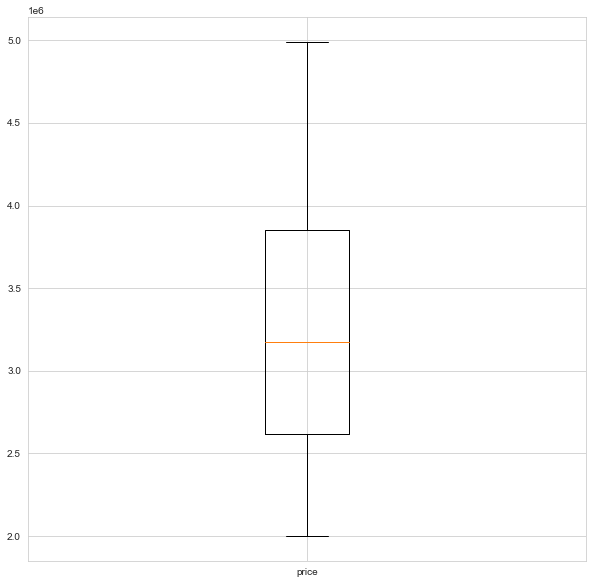

label  lower_whisker  lower_quartile     median  upper_quartile  \
0  price     2000000.00      2618775.00 3173576.80      3850166.25   

   upper_whisker  
0     4990000.00

In [3005]:
# range of price
plot_low_end      = low_end['price']
labels = ['price']

plt.figure(figsize=(10,10))
bp = plt.boxplot([plot_low_end], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)



Text(0.5, 1.0, 'low_end')

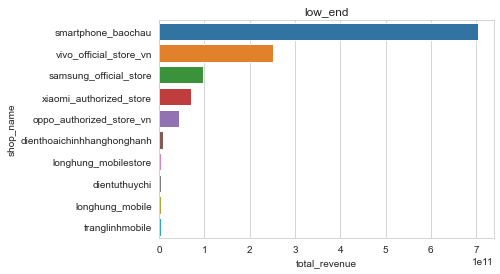

In [3019]:
# Who is biggest?
sns.barplot(data = low_end.groupby('shop_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue' ,ascending=False)[:10],
            x = 'total_revenue', y = 'shop_name').set_title('low_end')

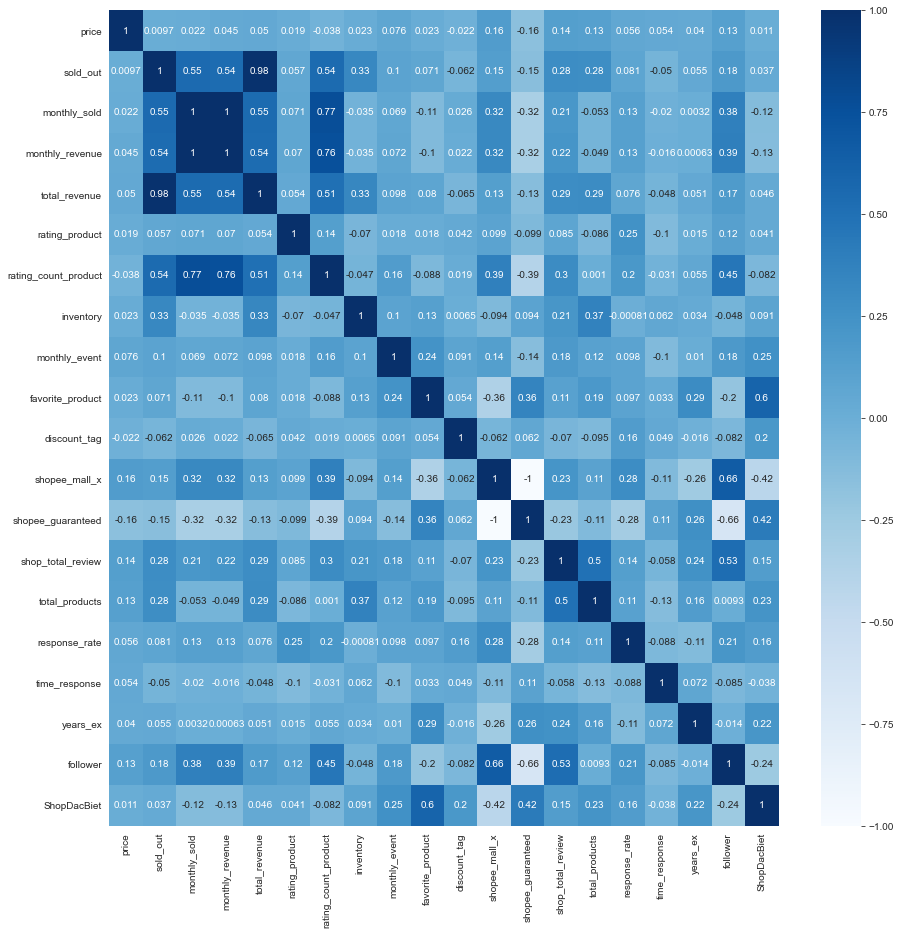

In [3007]:
plot_correlation(low_end)

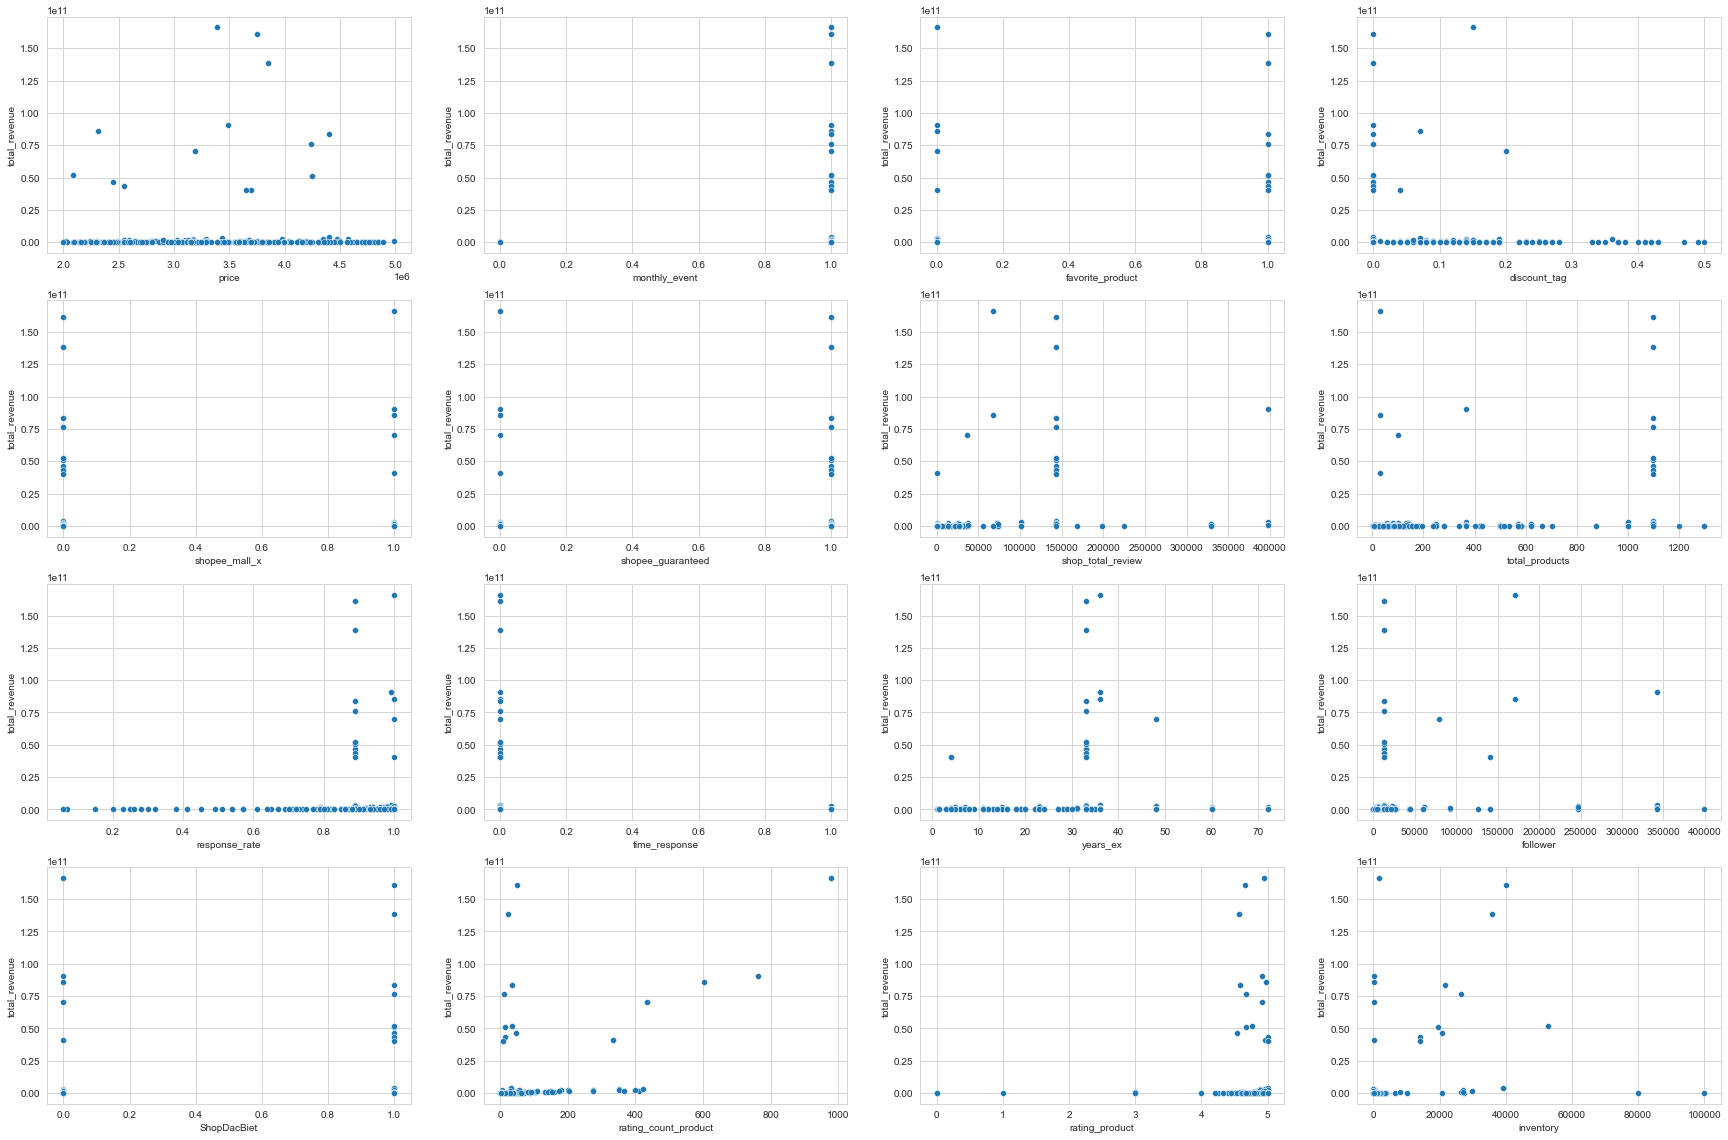

In [3008]:
plot_scatterplot(low_end)

#### Mid end

In [3011]:
df_test_3.groupby('segmentation').count()

name  price  sold_out  monthly_sold  monthly_revenue  \
segmentation                                                            
High end           17     17        17            17               17   
Low end           304    304       304           304              304   
Mid end            94     94        94            94               94   
Mid to High end    20     20        20            20               20   
Premium            23     23        23            23               23   
Ultra Low-end     884    884       884           884              884   

                 total_revenue  rating_product  rating_count_product  \
segmentation                                                           
High end                    17              17                    17   
Low end                    304             304                   304   
Mid end                     94              94                    94   
Mid to High end             20              20                    20   
Premium                     23              23                    23   
Ultra Low-end              884             884                   884   

                 inventory  monthly_event  ...  shopee_guaranteed  \
segmentation                               ...                      
High end                17             17  ...                 17   
Low end                304            304  ...                304   
Mid end                 94             94  ...                 94   
Mid to High end         20             20  ...                 20   
Premium                 23             23  ...                 23   
Ultra Low-end          884            884  ...                884   

                 shop_total_review  total_products  response_rate  \
segmentation                                                        
High end                        17              17             17   
Low end                        304             304            304   
Mid end                         94              94             94   
Mid to High end                 20              20             20   
Premium                         23              23             23   
Ultra Low-end                  884             884            884   

                 time_response  years_ex  follower  store_location  \
segmentation                                                         
High end                    17        17        17              17   
Low end                    304       304       304             304   
Mid end                     94        94        94              94   
Mid to High end             20        20        20              20   
Premium                     23        23        23              23   
Ultra Low-end              884       884       884             884   

                 ShopDacBiet  product_url  
segmentation                               
High end                  17           17  
Low end                  304          304  
Mid end                   94           94  
Mid to High end           20           20  
Premium                   23           23  
Ultra Low-end            884          884  

[6 rows x 25 columns]

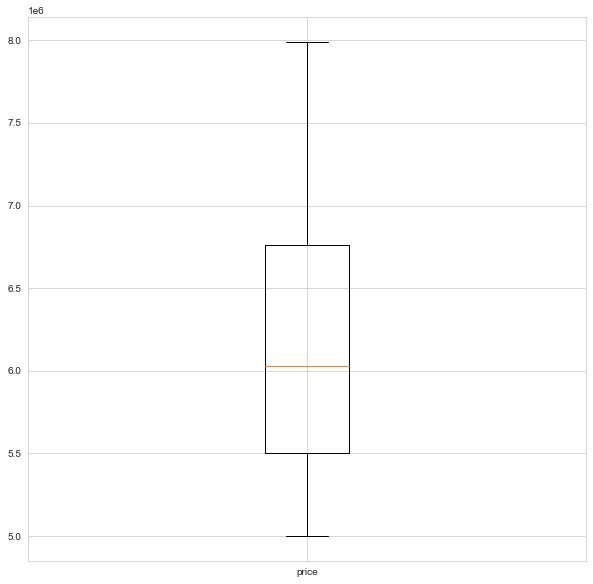

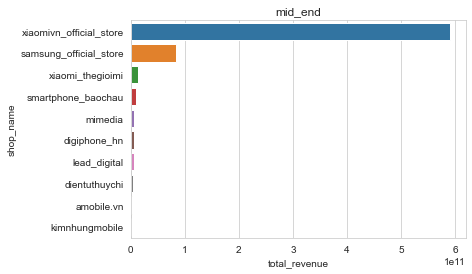

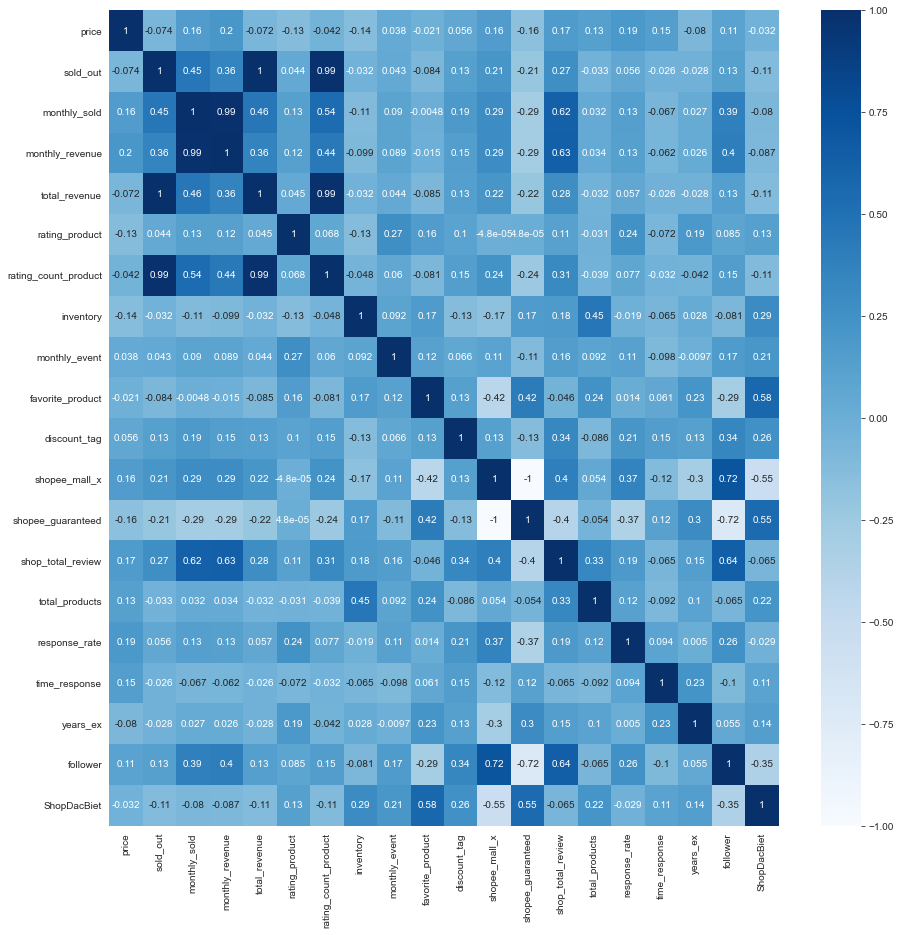

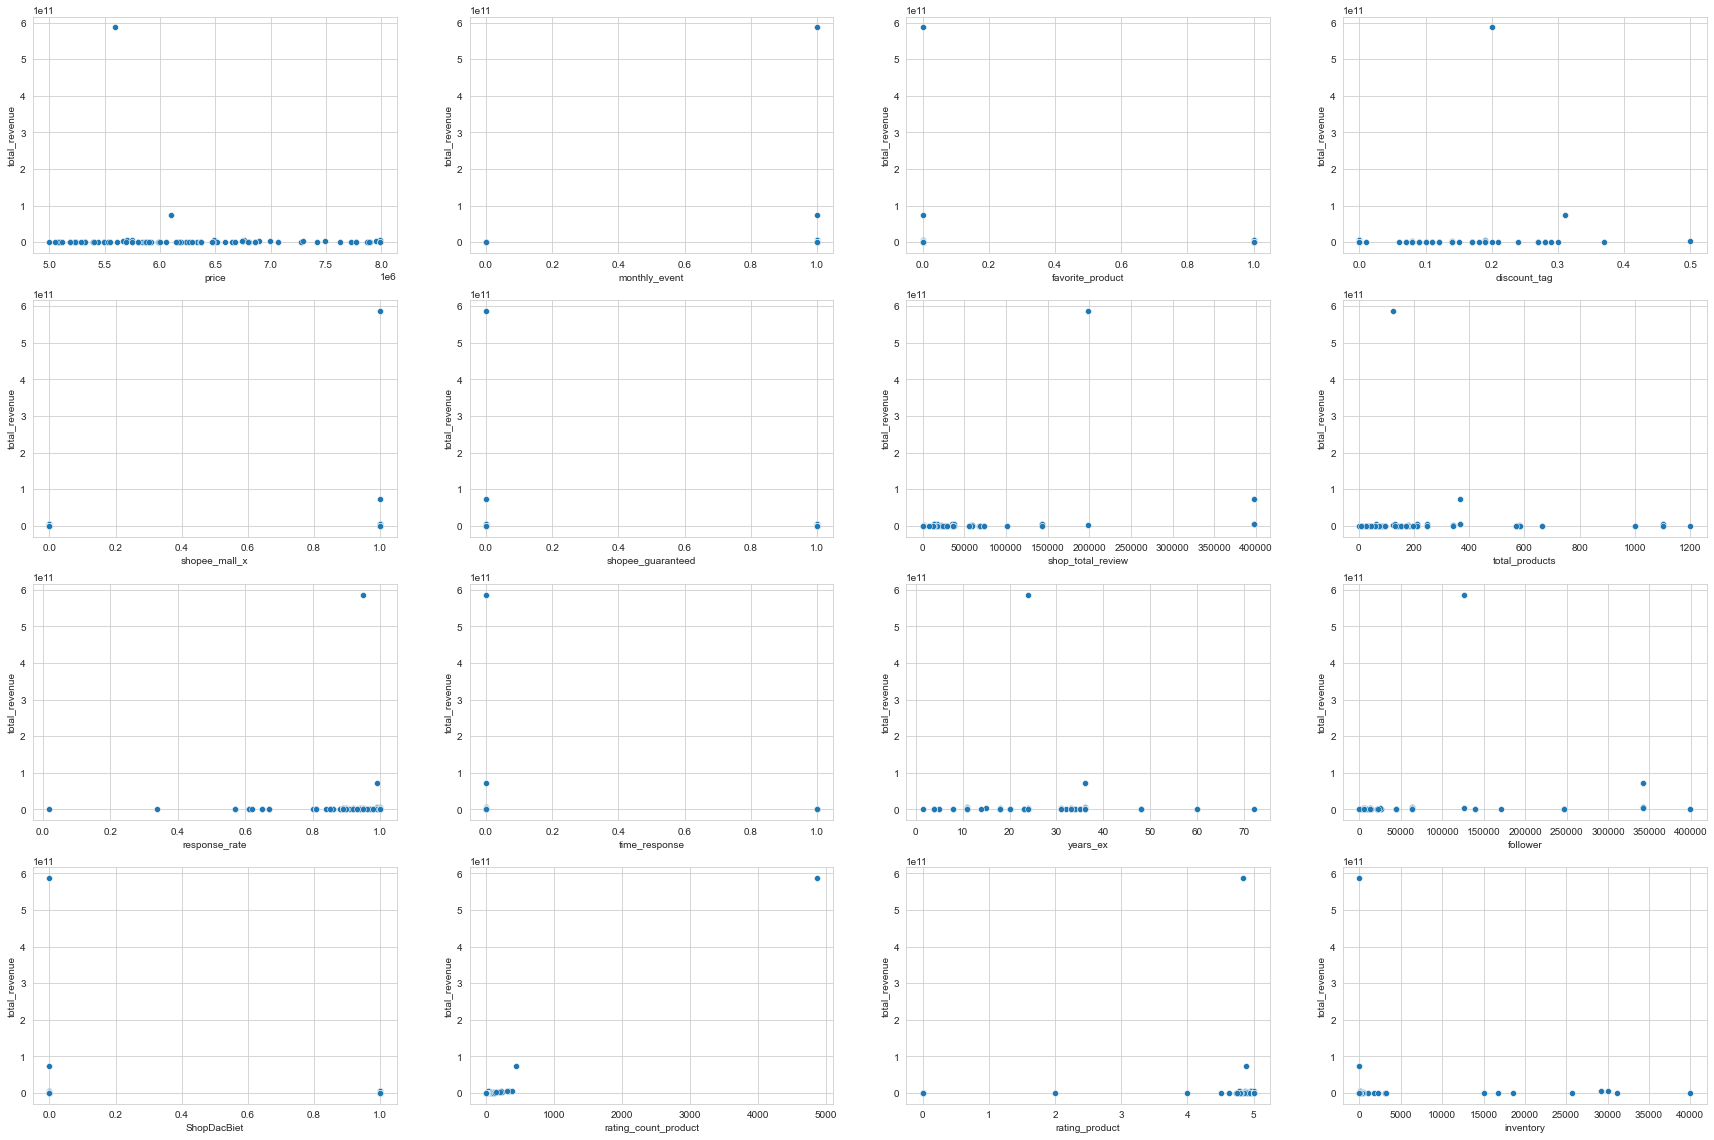

In [3020]:
mid_end = df_test_3[df_test_3['segmentation'] == 'Mid end']

# range of price
plot_mid_end      = mid_end['price']
labels = ['price']

plt.figure(figsize=(10,10))
bp = plt.boxplot([plot_mid_end], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

# Who is biggest?
sns.barplot(data = mid_end.groupby('shop_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue' ,ascending=False)[:10],
            x = 'total_revenue', y = 'shop_name').set_title('mid_end')


plot_correlation(mid_end)

plot_scatterplot(mid_end)

#### Mid to High end

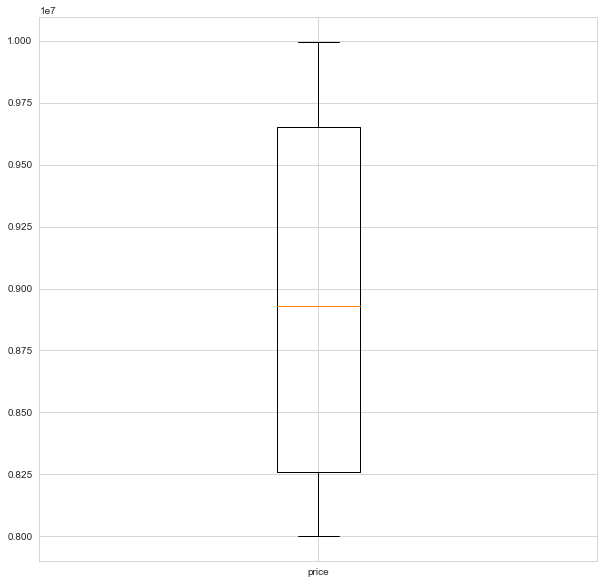

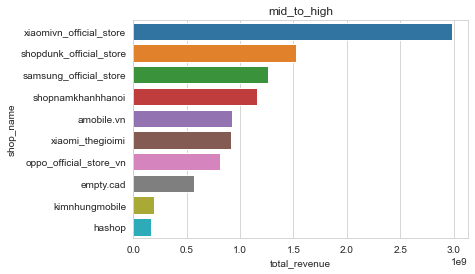

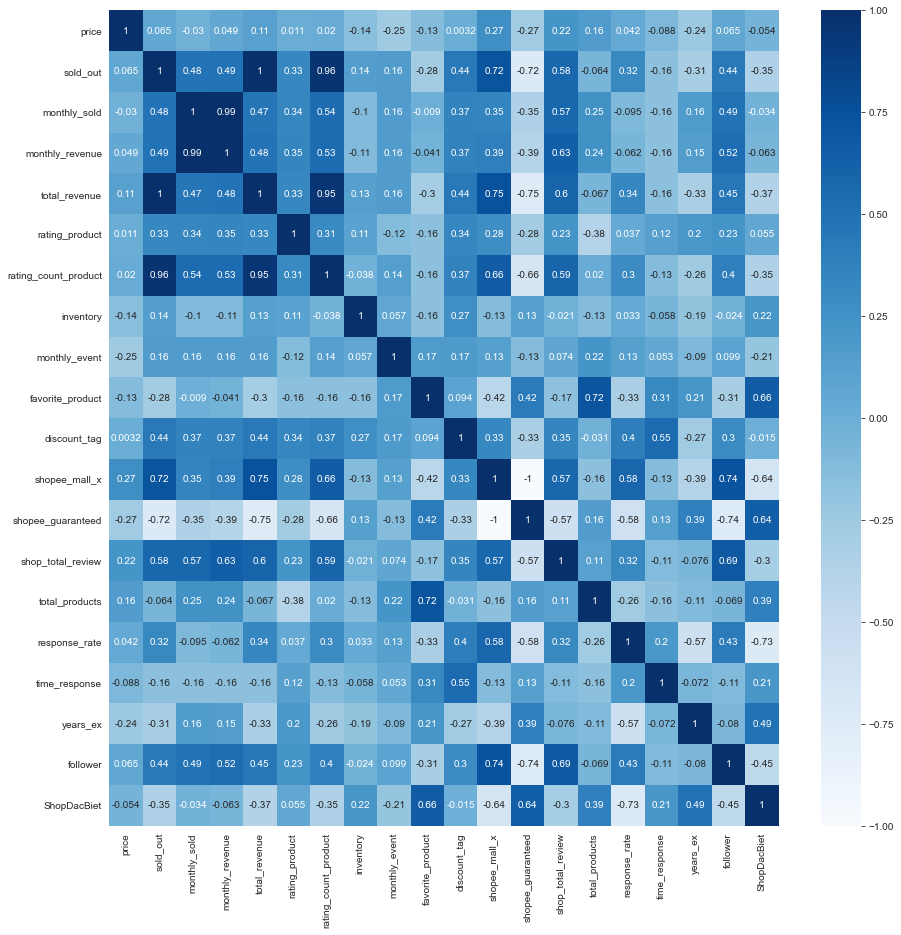

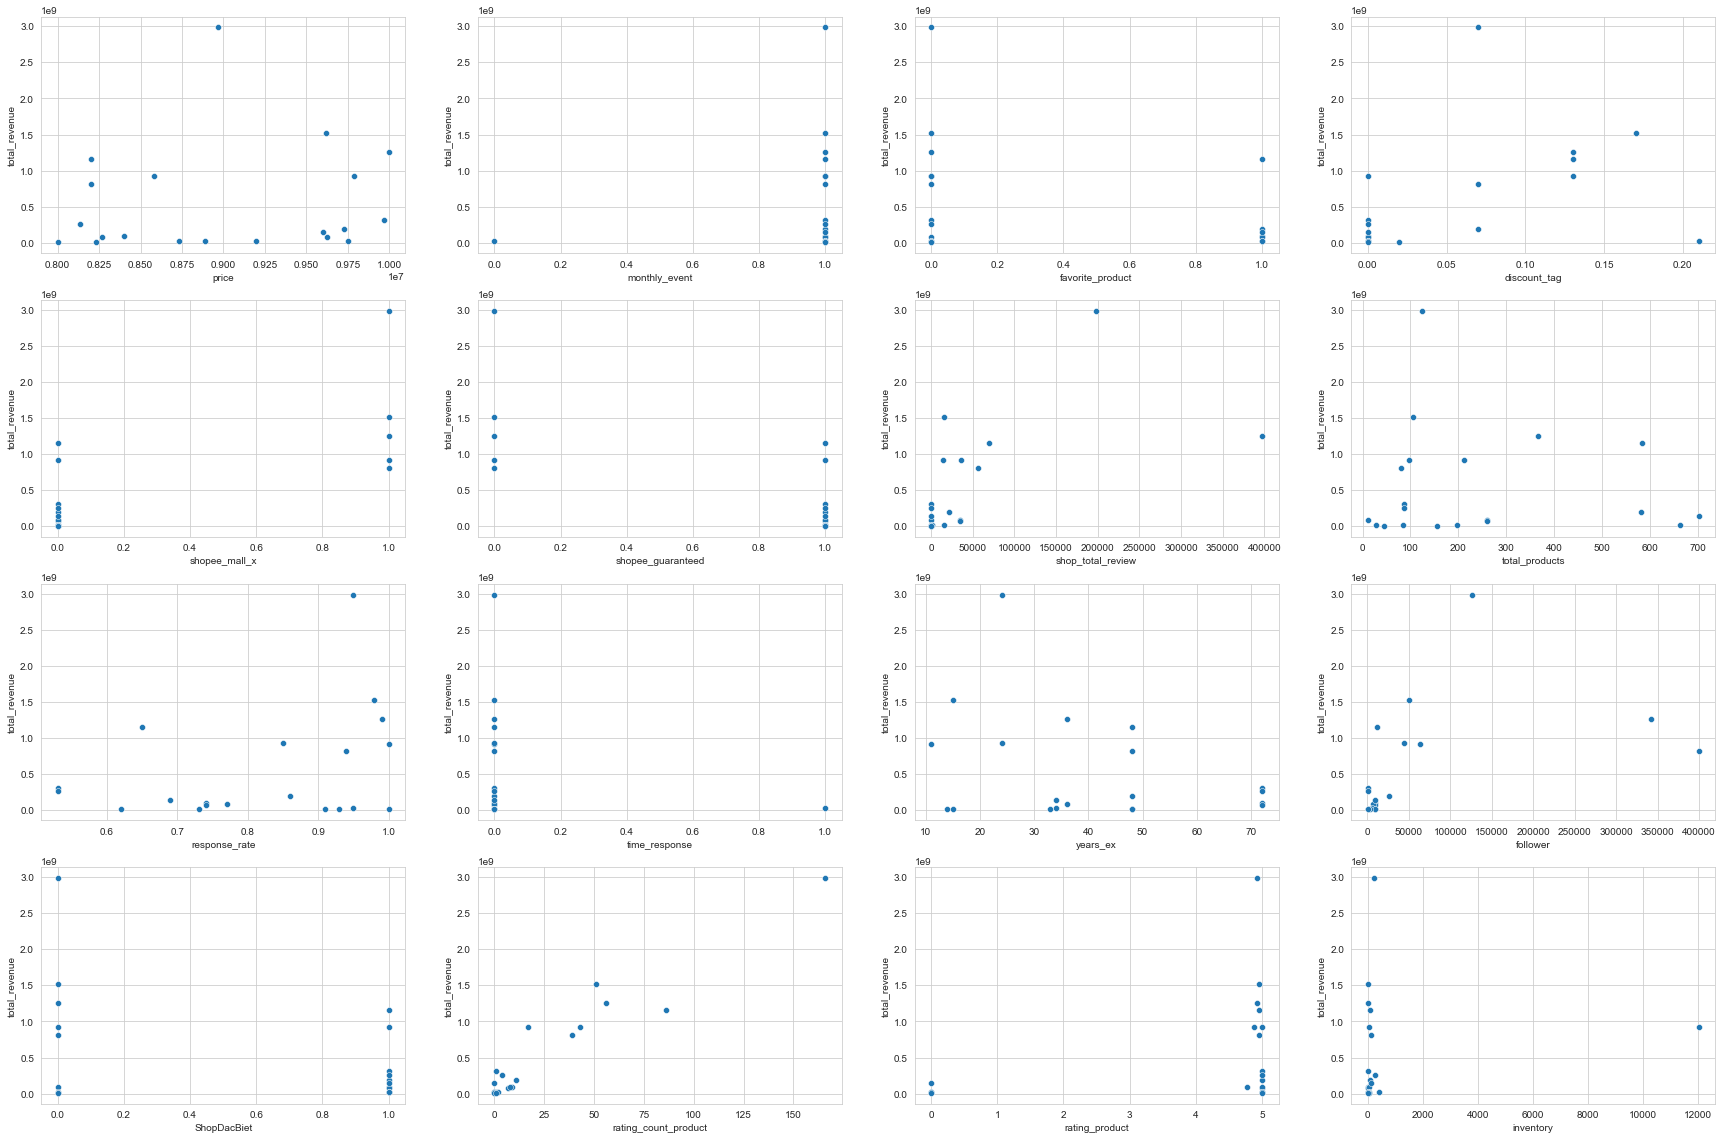

In [3021]:
mid_to_high = df_test_3[df_test_3['segmentation'] == 'Mid to High end']

# range of price
plot_mid_to_high      = mid_to_high['price']
labels = ['price']

plt.figure(figsize=(10,10))
bp = plt.boxplot([plot_mid_to_high], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

# Who is biggest?
sns.barplot(data = mid_to_high.groupby('shop_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue' ,ascending=False)[:10],
            x = 'total_revenue', y = 'shop_name').set_title('mid_to_high')


plot_correlation(mid_to_high)

plot_scatterplot(mid_to_high)

#### High end

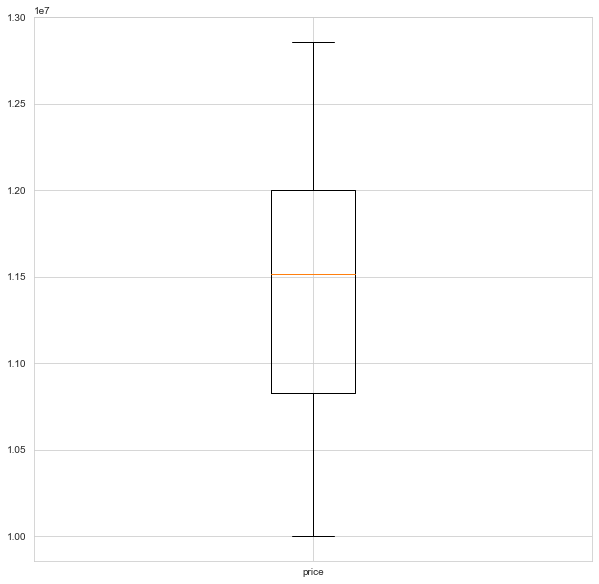

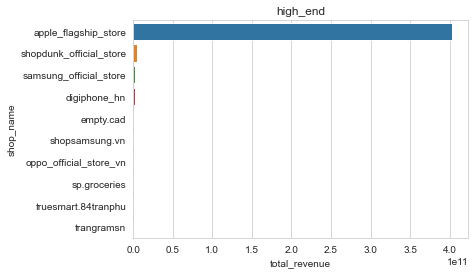

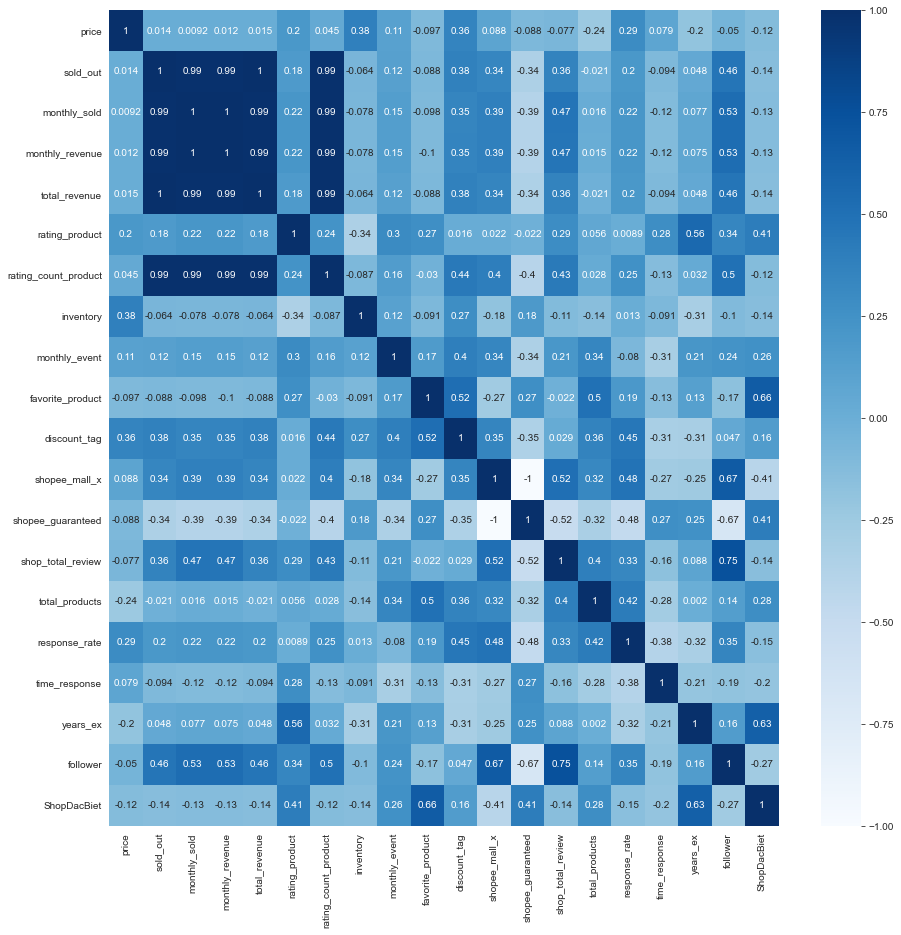

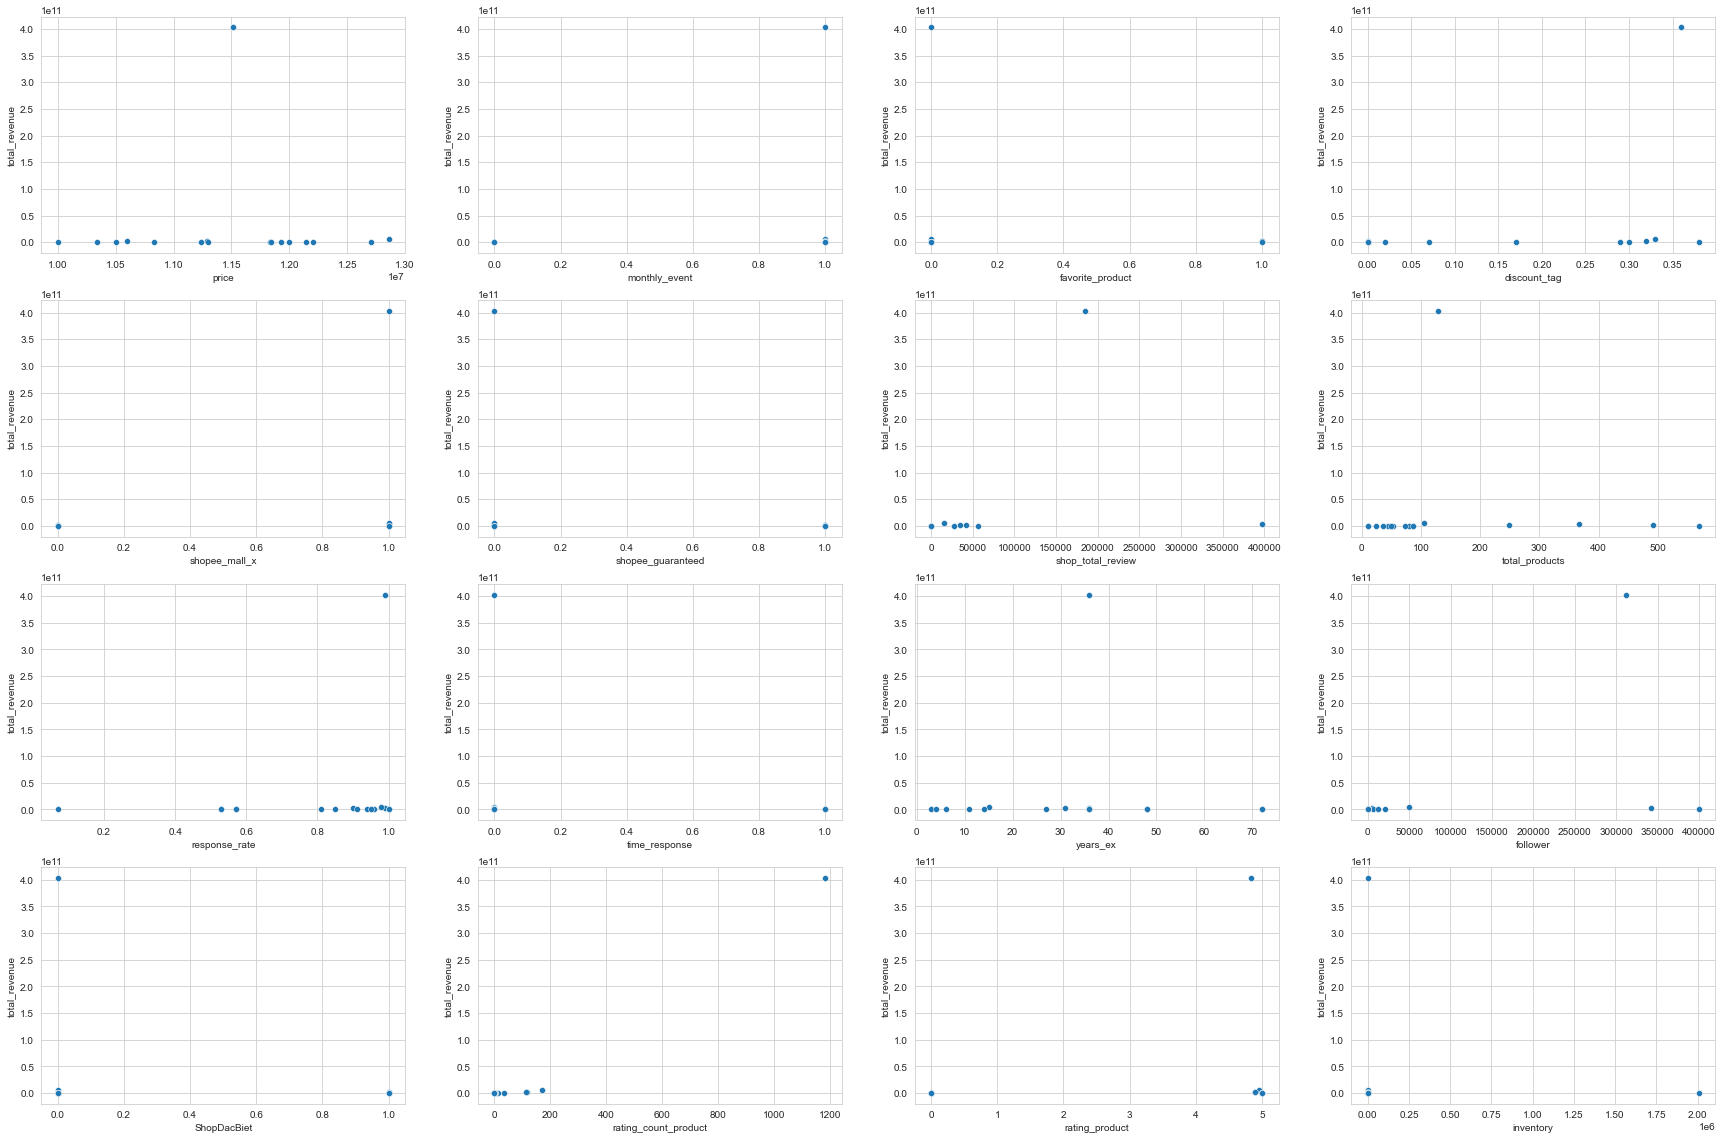

In [3017]:
high_end = df_test_3[df_test_3['segmentation'] == 'High end']

# range of price
plot_high_end      = high_end['price']
labels = ['price']

plt.figure(figsize=(10,10))
bp = plt.boxplot([plot_high_end], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

# Who is biggest?
sns.barplot(data = high_end.groupby('shop_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue' ,ascending=False)[:10],
            x = 'total_revenue', y = 'shop_name').set_title('high_end')


plot_correlation(high_end)

plot_scatterplot(high_end)

In [3024]:
df_test_3[df_test_3['shop_name'] == 'apple_flagship_store']

name       price  sold_out  monthly_sold  \
2             apple iphone 11 64gb 11513600.00  35000.00       1100.00   
32   apple iphone 12 pro max 128gb 27871800.00  28000.00        130.00   
248      apple iphone 12 pro 128gb 26031600.00  12000.00         14.00   
726      apple iphone 12 pro 256gb 28341900.00    369.00          2.00   

     monthly_revenue   total_revenue  rating_product  rating_count_product  \
2     12664960000.00 402976000000.00            4.83               1184.00   
32     3623334000.00 780410400000.00            4.88               1033.00   
248     364442400.00 312379200000.00            4.84                440.00   
726      56683800.00  10458161100.00            4.91                121.00   

     inventory  monthly_event  ...  shop_total_review  total_products  \
2         0.00              1  ...          185000.00          129.00   
32       75.00              1  ...          185000.00          129.00   
248      11.00              1  ...          185000.00          129.00   
726       5.00              1  ...          185000.00          129.00   

    response_rate time_response  years_ex  follower   store_location  \
2            0.99             0     36.00 311300.00  TP. Hồ Chí Minh   
32           0.99             0     36.00 311300.00  TP. Hồ Chí Minh   
248          0.99             0     36.00 311400.00  TP. Hồ Chí Minh   
726          0.99             0     36.00 311600.00  TP. Hồ Chí Minh   

     ShopDacBiet                                        product_url  \
2              0  https://shopee.vn/Apple-iPhone-11-64GB-i.88201...   
32             0  https://shopee.vn/Apple-iPhone-12-Pro-Max-128G...   
248            0  https://shopee.vn/Apple-iPhone-12-Pro-128GB-i....   
726            0  https://shopee.vn/Apple-iPhone-12-Pro-256GB-i....   

     segmentation  
2        High end  
32        Premium  
248       Premium  
726       Premium  

[4 rows x 26 columns]

In [3027]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 1 to 1695
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1342 non-null   object 
 1   price                 1342 non-null   float64
 2   sold_out              1342 non-null   float64
 3   monthly_sold          1342 non-null   float64
 4   monthly_revenue       1342 non-null   float64
 5   total_revenue         1342 non-null   float64
 6   rating_product        1342 non-null   float64
 7   rating_count_product  1342 non-null   float64
 8   inventory             1342 non-null   float64
 9   monthly_event         1342 non-null   int64  
 10  favorite_product      1342 non-null   int64  
 11  discount_tag          1342 non-null   float64
 12  company               1342 non-null   object 
 13  shop_name             1342 non-null   object 
 14  shopee_mall_x         1342 non-null   float64
 15  shopee_guaranteed    

In [3029]:
df_test_3.to_csv('df_training.csv', header=False)

#### Premium

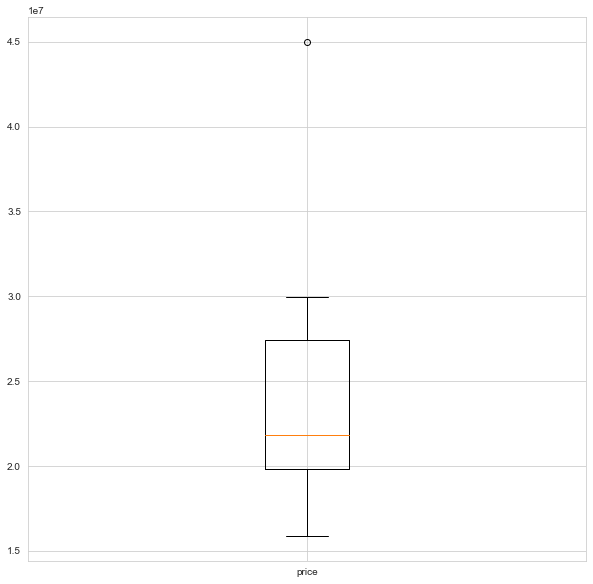

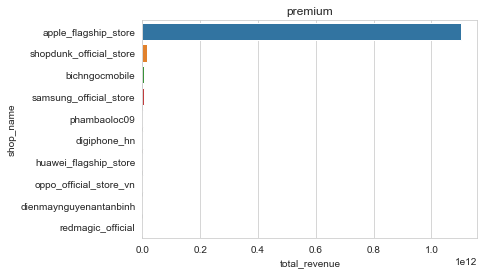

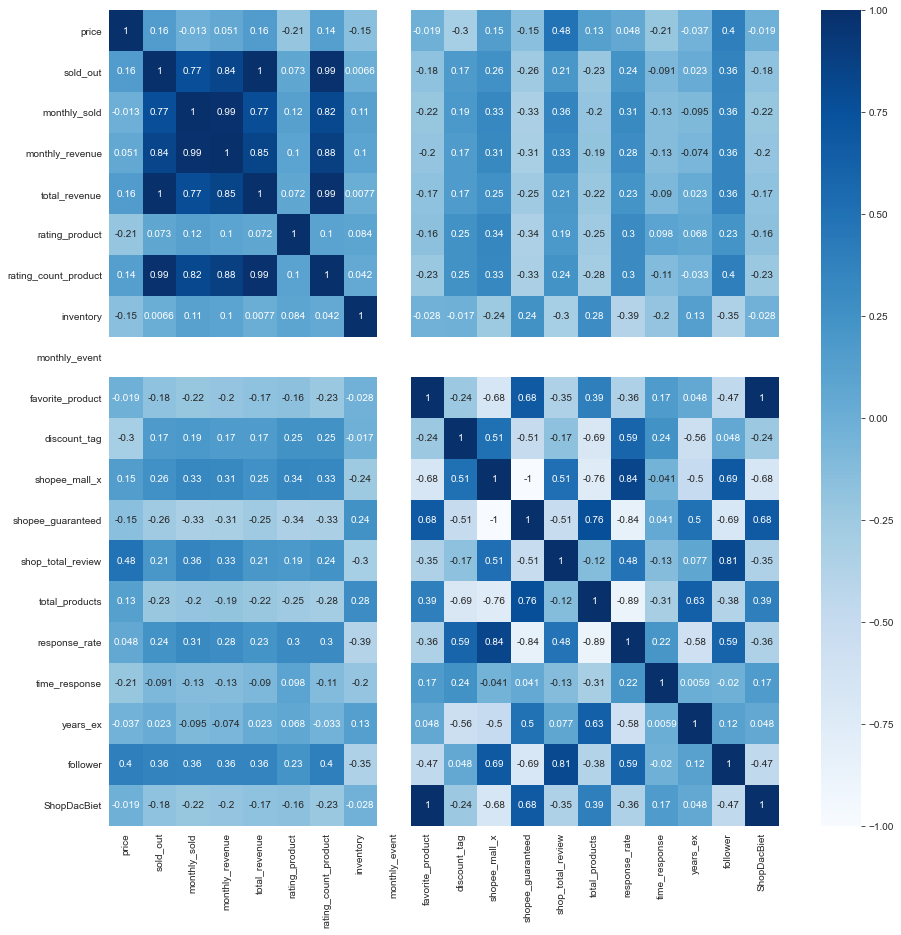

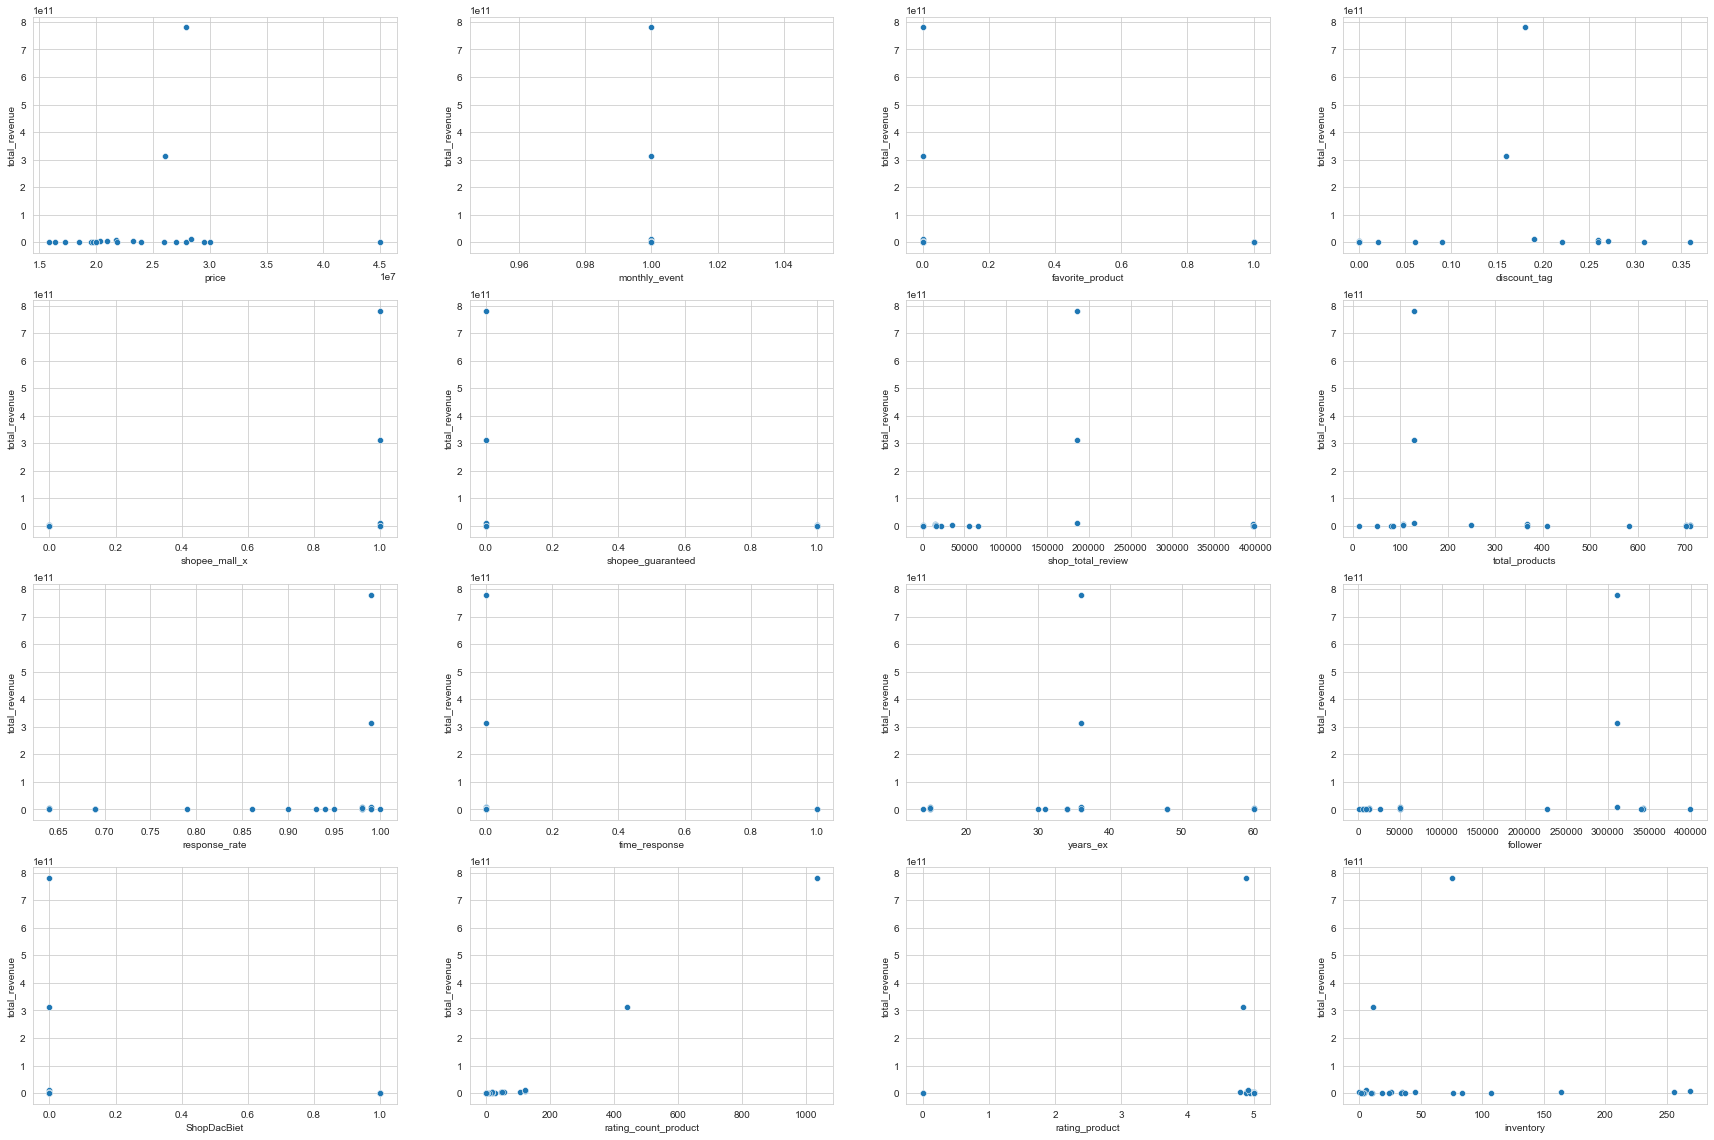

In [3022]:
premium = df_test_3[df_test_3['segmentation'] == 'Premium']

# range of price
plot_premium      = premium['price']
labels = ['price']

plt.figure(figsize=(10,10))
bp = plt.boxplot([plot_premium], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

# Who is biggest?
sns.barplot(data = premium.groupby('shop_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue' ,ascending=False)[:10],
            x = 'total_revenue', y = 'shop_name').set_title('premium')


plot_correlation(premium)

plot_scatterplot(premium)

#### HERE

In [1267]:
df_test.groupby('segmentation')['name'].count().sort_values(ascending=True).reset_index()

segmentation  name
0          Premium     7
1         High end    11
2  Mid to High end    14
3          Mid end    82
4          Low end   275
5    Ultra Low-end   809

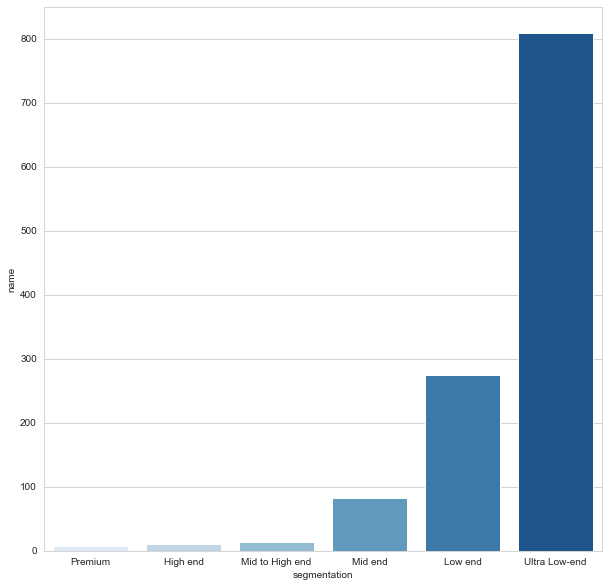

In [1460]:
plt.figure(figsize=(10,10))

sns.barplot(data=df_test.groupby('segmentation')['name'].count().sort_values(ascending=True).reset_index(),
            x = 'segmentation',
            y = 'name',
            palette='Blues')

plt.show()


Percentage

In [1481]:
percentage_seg = df_test.groupby(['segmentation'])['name'].count()/df_test.groupby(['segmentation'])['name'].count().sum()
percentage_seg = percentage_seg.reset_index()
percentage_seg

segmentation      name
0         High end  0.009182
1          Low end  0.229549
2          Mid end  0.068447
3  Mid to High end  0.011686
4          Premium  0.005843
5    Ultra Low-end  0.675292

In [ ]:
total_product_company = df_test.groupby('company')['name'].count().sort_values(ascending=False).reset_index()
total_product_company[total_product_company['name'] > 5]


company  name
0               smartphone_baochau    88
1                       ATU MOBILE    23
2                   Thế Linh Store    22
3                     hà bắc Store    21
4            Long Hưng Mobile Mall    20
5   Điện Thoại Chính Hãng HồngHạnh    20
6                 Long Hưng Mobile    16
7                 Baongocstore2016    14
8                TUẤN DƯƠNG MOBILE    14
9            SAMSUNG OFFICIAL SHOP    13
10                ĐIỆN TỬ THỦY CHI    12
11                Sỉ Điện Thoại Cỏ    11
12                      Amobile.vn    10
13         Thương Gia Họ Đỗ Mobile    10
14     Nokia Mobile Official Store     9
15                dien.tu.2tek.2.N     9
16                     CHAT Mobile     8
17                      storevn678     8
18    IPHONE IPAD PHỤ KIỆN GIÁ TỐT     8
19    Hệ Thống TUÂN HƯNG YÊN CHÍNH     8
20               haidangmobile8686     8
21                 TAMHOANG Mobile     8
22                    T-Max Mobile     8
23                 linhkientrangia     8
24               Trang Linh Mobile     8
25                       Phone Mai     7
26                dien.tu.2tek.1.K     7
27                  quynhvienthong     7
28                       115haonam     7
29             maytinhbanghaiphong     7
30                ALOFONE VIỆT NAM     7
31                   thanhlongnd18     7
32               THANG THAO MOBILE     7
33                       TPhone HN     7
34        Thế Giới Đồ Nhật - japan     6
35                       vinh19922     6
36                        Miphonez     6
37     Linh Phụ kiện giá rẻ Hà Nội     6
38                   Hải_ngân_Linh     6
39                    ChiKhoi Mart     6
40                 Shop MinhMobile     6
41              Thegioimi_Mistore      6
42         Shopdunk Official Store     6
43                       Digiphone     6
44        oppo_authorized_store_vn     6
45             OPPO Official Store     6

In [1478]:
number_seg = df_test.groupby('segmentation')['name'].count().reset_index()
number_seg

segmentation  name
0         High end    11
1          Low end   275
2          Mid end    82
3  Mid to High end    14
4          Premium     7
5    Ultra Low-end   809

In [1503]:
percentage_seg.shape

(6, 2)

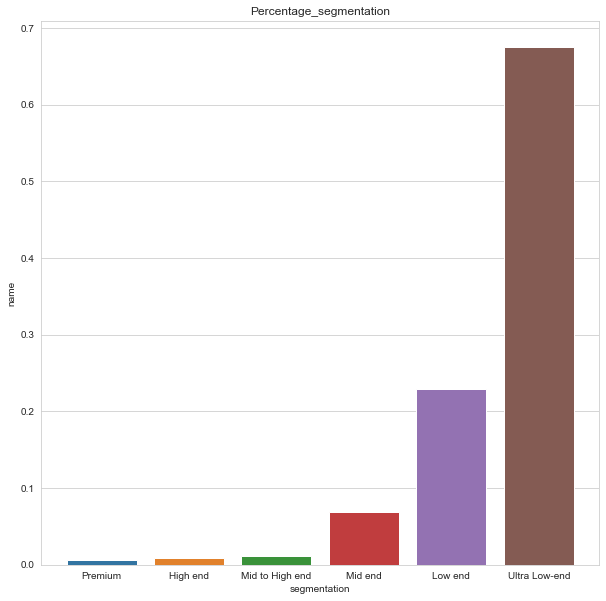

In [1512]:
plt.figure(figsize=(10,10))

sns.barplot(x= 'segmentation',
            y = 'name',
            data = percentage_seg.sort_values(by= 'name', ascending=True),ci=99
            )
plt.title('Percentage_segmentation')

plt.axis('tight')
plt.show()

Map on Vietnam map

In [1280]:
import geopandas as gpd
import geoplot as gplt

In [1634]:
df_test.groupby(['store_location', 'shop_name'])['name'].count().reset_index().groupby('store_location')['shop_name'].count()

store_location
An Giang               2
Bà Rịa - Vũng Tàu      1
Bình Dương             1
Bình Phước             2
Bình Định              1
Bạc Liêu               1
Bắc Giang              1
Bắc Kạn                1
Bắc Ninh               7
Bến Tre                3
Cao Bằng               1
Cần Thơ                1
Hà Nam                 3
Hà Nội               210
Hà Tĩnh                2
Hòa Bình               1
Hưng Yên               7
Hải Dương              3
Hải Phòng              7
Kon Tum                1
Long An                1
Lào Cai                5
Lâm Đồng               1
Lạng Sơn               4
Nam Định              27
Nghệ An                5
Ninh Bình              1
Phú Thọ                4
Phú Yên                1
Quảng Bình             1
Quảng Nam              3
Quảng Ninh             2
Quảng Trị              1
Sơn La                 1
TP. Hồ Chí Minh      100
Thanh Hóa              7
Thái Bình              3
Thái Nguyên            5
Thừa Thiên Huế         1
Tuyên Quan

In [1635]:
# Location
df_store_loc= df_test.groupby(['store_location', 'shop_name'])['name'].count().reset_index().groupby('store_location')['shop_name'].count().sort_values(ascending = False).reset_index()
df_store_loc.head()

store_location  shop_name
0           Hà Nội        210
1  TP. Hồ Chí Minh        100
2         Nam Định         27
3        Vĩnh Phúc          8
4        Hải Phòng          7

In [1714]:
GEO_URL = 'http://opendata.hcmgis.vn/geoserver/ows?srsName=EPSG%3A4326&outputFormat=json&service=WFS&srs=EPSG%3A4326&request=GetFeature&typename=geonode%3Acovid_19_vietnam&version=1.0.0'
geo = gpd.read_file(GEO_URL)
# We only need to care about the Name, Province and geometry column
geo = geo[['Ten', 'geometry']]
geo.sample(10)

Ten                                           geometry
12             Tỉnh Sơn La  MULTIPOLYGON (((103.55386 22.02379, 103.56171 ...
35         Tỉnh Bình Dương  MULTIPOLYGON (((106.44339 11.49854, 106.44894 ...
50            Tỉnh Bến Tre  MULTIPOLYGON (((106.44833 10.30650, 106.45725 ...
34     Tỉnh Thừa Thiên Huế  MULTIPOLYGON (((107.51315 16.64591, 107.55491 ...
39            Tỉnh Nghệ An  MULTIPOLYGON (((105.77858 18.80648, 105.78017 ...
17           Tỉnh Đắk Nông  MULTIPOLYGON (((107.85902 12.80122, 107.86224 ...
53         Tỉnh Bình Phước  MULTIPOLYGON (((107.20633 12.29546, 107.22415 ...
55  Tỉnh Bà Rịa - Vũng Tàu  MULTIPOLYGON (((106.55859 8.62876, 106.55615 8...
43       Thành phố Đà Nẵng  MULTIPOLYGON (((111.20628 15.77929, 111.19946 ...
6           Tỉnh Thanh Hóa  MULTIPOLYGON (((105.90945 19.31991, 105.90996 ...

In [2826]:
geo

Ten                                           geometry
0    Quảng Trị  MULTIPOLYGON (((107.34315 17.14968, 107.34306 ...
1    Bắc Giang  MULTIPOLYGON (((106.16244 21.62476, 106.16959 ...
2     Bắc Ninh  MULTIPOLYGON (((106.00027 21.25811, 106.01268 ...
3       Hà Nội  MULTIPOLYGON (((105.81271 21.38043, 105.81380 ...
4    Khánh Hòa  MULTIPOLYGON (((113.85240 7.41174, 113.86407 7...
..         ...                                                ...
58   Hậu Giang  MULTIPOLYGON (((105.58593 9.98915, 105.58322 9...
59  Quảng Ninh  MULTIPOLYGON (((107.17342 20.73492, 107.17292 ...
60    Trà Vinh  MULTIPOLYGON (((106.25984 10.07406, 106.27959 ...
61   Vĩnh Long  MULTIPOLYGON (((106.02921 10.28975, 106.03086 ...
62   Đồng Tháp  MULTIPOLYGON (((105.43610 10.96760, 105.43997 ...

[63 rows x 2 columns]

Geo clear 'Thành phố' and 'Tỉnh'

In [1727]:
# Clear province, TP
def clear_province(series):
    i = series
    if 'Tỉnh' in i:
        i = i.strip('Tỉnh')[1:]
        print(f'{i} : {len(i)}')
        return i
    elif 'Thành phố' in i:
         i = i.strip('Thành phố')[1:]
         return i
    else:
        return i

geo['Ten'] = geo['Ten'].apply(clear_province)

    

Quảng Trị : 9
Bắc Giang : 9
Bắc Ni : 6
Khánh Hòa : 9
Hoà Bì : 6
Thanh Hóa : 9
Hà Tĩ : 5
Thái Nguyê : 10
Yên Bái : 7
Hà Giang : 8
Sơn La : 6
Hải Dương : 9
Gia Lai : 7
Vĩnh Phúc : 9
Đắk Nông : 8
Thái Bì : 7
Hưng Yê : 7
Bạc Liêu : 8
Tây Ni : 6
Ninh Bì : 7
Nam Đị : 6
Long A : 6
Đồng Nai : 8
Sóc Trăng : 9
Ninh Thuậ : 9
Tiền Giang : 10
Cao Bằng : 8
Quảng Ngãi : 10
Cà Mau : 6
Lai Châu : 8
Phú Thọ : 7
Thừa Thiên Huế : 14
Bình Dương : 10
Quảng Bì : 8
Lạng Sơ : 7
Đắk Lắk : 7
Nghệ A : 6
Kiên Giang : 10
Bình Thuậ : 9
Bắc Kạ : 6
Điện Biê : 8
Quảng Nam : 9
Phú Yê : 6
Lào Cai : 7
Bình Đị : 7
Bến Tre : 7
Hà Nam : 6
Tuyên Quang : 11
Bình Phước : 10
An Giang : 8
Bà Rịa - Vũng Tàu : 17
Lâm Đồng : 8
Kon Tum : 7
Hậu Giang : 9
Quảng Ni : 8
Trà Vi : 6
Vĩnh Long : 9
Đồng Tháp : 9


In [1739]:
def correct_Ten(series):
    if series == 'Bình Thuậ':
        return 'Bình Thuận'
    elif series == 'Bình Đị':
        return 'Bình Định'
    elif series == 'Bắc Kạ':
        return 'Bắc Kạn'
    elif series == 'Bắc Ni':
        return 'Bắc Ninh'
    elif series == 'Hoà Bì':
        return 'Hòa Bình'
    elif series == 'Hà Tĩ':
        return 'Hà Tĩnh'
    elif series == 'Hưng Yê':
        return 'Hưng Yên'
    elif series == 'Long A':
        return 'Long An'
    elif series == 'Lạng Sơ':
        return 'Lạng Sơn'
    elif series == 'Nam Đị':
        return 'Nam Định'
    elif series == 'Nghệ A':
        return 'Nghệ An'
    elif series == 'Ninh Bì':
        return 'Ninh Bình'
    elif series == 'Ninh Thuậ':
        return 'Ninh Thuận'
    elif series == 'Phú Yê':
        return 'Phú Yên'
    elif series == 'Quảng Bì':
        return 'Quảng Bình'
    elif series == 'Quảng Ni':
        return 'Quảng Ninh'
    elif series == 'Thái Bì':
        return 'Thái Bình'
    elif series == 'Thái Nguyê':
        return 'Thái Nguyên'
    elif series == 'Trà Vi':
        return 'Trà Vinh'
    elif series == 'Tây Ni':
        return 'Tây Ninh'
    elif series == 'à Nẵng':
        return 'Đà Nẵng'
    elif series == 'à Nội':
        return 'Hà Nội'
    elif series == 'Điện Biê':
        return 'Điện Biên'
    elif series == 'ải Phòng':
        return 'Hải Phòng'
    elif series == 'ần Thơ':
        return 'Cần Thơ'
    elif series == 'ồ Chí Mi':
        return 'TP. Hồ Chí Minh'
    else:
        return series

In [1740]:
geo['Ten'] = geo['Ten'].apply(correct_Ten)

Inner join 2 tabels:
df_store_loc and geo

In [ ]:
df_test_3.columns

Index(['name', 'price', 'sold_out', 'monthly_sold', 'monthly_revenue',
       'total_revenue', 'rating_product', 'rating_count_product', 'inventory',
       'monthly_event', 'favorite_product', 'discount_tag', 'company',
       'shop_name', 'shopee_mall_x', 'shopee_guaranteed', 'shop_total_review',
       'total_products', 'response_rate', 'time_response', 'years_ex',
       'follower', 'store_location', 'ShopDacBiet', 'product_url'],
      dtype='object')

In [1742]:
geo_store_loc = pd.merge(geo, df_store_loc,  how='outer', left_on='Ten', right_on='store_location')
geo_store_loc.head()

Ten                                           geometry  \
0  Quảng Trị  MULTIPOLYGON (((107.34315 17.14968, 107.34306 ...   
1  Bắc Giang  MULTIPOLYGON (((106.16244 21.62476, 106.16959 ...   
2   Bắc Ninh  MULTIPOLYGON (((106.00027 21.25811, 106.01268 ...   
3     Hà Nội  MULTIPOLYGON (((105.81271 21.38043, 105.81380 ...   
4  Khánh Hòa  MULTIPOLYGON (((113.85240 7.41174, 113.86407 7...   

  store_location  shop_name  
0      Quảng Trị        1.0  
1      Bắc Giang        1.0  
2       Bắc Ninh        7.0  
3         Hà Nội      210.0  
4            NaN        NaN

In [1743]:
geo_store_loc['shop_name'] = geo_store_loc['shop_name'].fillna(0)

In [1744]:
geo_store_loc['store_location'] = geo_store_loc['store_location'].fillna('unknow')

In [1745]:
def geo_loc_na(row):
    if row['store_location'] == 'unknow':
        row['store_location'] = row['Ten']
        return row['store_location']
    else:
        return row['store_location']

In [1746]:
geo_store_loc['store_location'] = geo_store_loc.apply(geo_loc_na, axis=1)

plot on Vietmap map

In [1748]:
geo_store_loc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ten             63 non-null     object  
 1   geometry        63 non-null     geometry
 2   store_location  63 non-null     object  
 3   shop_name       63 non-null     float64 
dtypes: float64(1), geometry(1), object(2)
memory usage: 2.5+ KB


In [ ]:
store_location

store_location  shop_name
0            An Giang          2
1   Bà Rịa - Vũng Tàu          1
2          Bình Dương          3
3          Bình Phước          2
4           Bình Định          1
5            Bạc Liêu          1
6           Bắc Giang          1
7             Bắc Kạn          1
8            Bắc Ninh          9
9             Bến Tre          3
10           Cao Bằng          1
11            Cần Thơ          1
12             Hà Nam          3
13             Hà Nội        234
14            Hà Tĩnh          3
15           Hòa Bình          1
16           Hưng Yên          9
17          Hải Dương          6
18          Hải Phòng          8
19            Kon Tum          1
20            Long An          1
21            Lào Cai          6
22           Lâm Đồng          1
23           Lạng Sơn          4
24           Nam Định         29
25            Nghệ An          6
26          Ninh Bình          1
27            Phú Thọ          8
28            Phú Yên          1
29         Quảng Bình          1
30          Quảng Nam          4
31         Quảng Ninh          1
32          Quảng Trị          1
33             Sơn La          1
34    TP. Hồ Chí Minh        115
35          Thanh Hóa          6
36          Thái Bình          3
37        Thái Nguyên          6
38     Thừa Thiên Huế          1
39        Tuyên Quang          4
40           Tây Ninh          1
41          Vĩnh Phúc          7
42            Yên Bái          1
43          Điện Biên          1
44            Đà Nẵng          1
45           Đồng Nai          1

In [ ]:
store_location

store_location  shop_name
0            An Giang          2
1   Bà Rịa - Vũng Tàu          1
2          Bình Dương          3
3          Bình Phước          2
4           Bình Định          1
5            Bạc Liêu          1
6           Bắc Giang          1
7             Bắc Kạn          1
8            Bắc Ninh          9
9             Bến Tre          3
10           Cao Bằng          1
11            Cần Thơ          1
12             Hà Nam          3
13             Hà Nội        234
14            Hà Tĩnh          3
15           Hòa Bình          1
16           Hưng Yên          9
17          Hải Dương          6
18          Hải Phòng          8
19            Kon Tum          1
20            Long An          1
21            Lào Cai          6
22           Lâm Đồng          1
23           Lạng Sơn          4
24           Nam Định         29
25            Nghệ An          6
26          Ninh Bình          1
27            Phú Thọ          8
28            Phú Yên          1
29         Quảng Bình          1
30          Quảng Nam          4
31         Quảng Ninh          1
32          Quảng Trị          1
33             Sơn La          1
34    TP. Hồ Chí Minh        115
35          Thanh Hóa          6
36          Thái Bình          3
37        Thái Nguyên          6
38     Thừa Thiên Huế          1
39        Tuyên Quang          4
40           Tây Ninh          1
41          Vĩnh Phúc          7
42            Yên Bái          1
43          Điện Biên          1
44            Đà Nẵng          1
45           Đồng Nai          1

<AxesSubplot:>

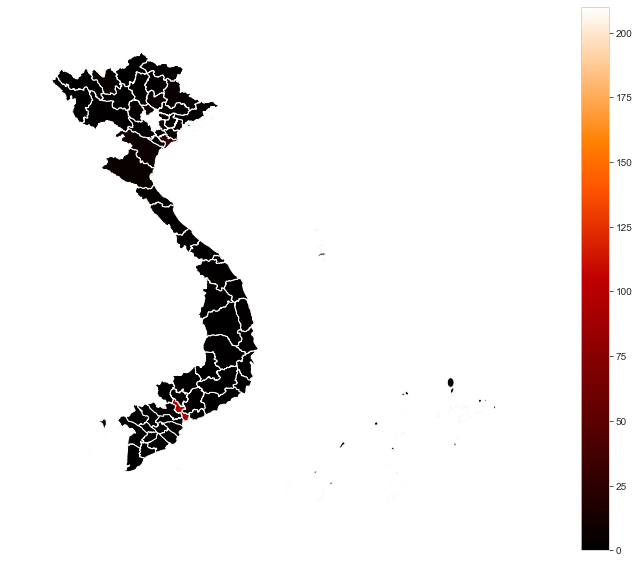

In [1755]:
gplt.choropleth(geo_store_loc, hue = geo_store_loc['shop_name'], cmap = 'gist_heat', figsize = (15,10), legend=True)

Shop and company

In [1758]:
df_test.groupby(['company', 'shop_name']).count().reset_index()

company         shop_name  name  price  sold_out  \
0                Redfirenetwork          bachbaba     1      1         1   
1                     0s3y1lncmk        0s3y1lncmk     3      3         3   
2                      115haonam         115haonam     7      7         7   
3                     1eyjxyeoln        1eyjxyeoln     1      1         1   
4    2T Store - Máy tính bảng   2tstorehaiphong     3      3         3   
..                           ...               ...   ...    ...       ...   
437     Đồ chơi thông minh (KST)          huy13691     1      1         1   
438               Đồ cũ Hưng Yên          tunghhk6     1      1         1   
439               ĐỘ IPHONE SHOP  silevoiphone1688     1      1         1   
440         đienthoaicu chat 99%   son123456789123     1      1         1   
441             điện thoại bổ rẻ        dungnhi.88     2      2         2   

     monthly_sold  rating_product  rating_count_product  inventory  \
0               1               1                     1          1   
1               3               3                     3          3   
2               7               7                     7          7   
3               1               1                     1          1   
4               3               3                     3          3   
..            ...             ...                   ...        ...   
437             1               1                     1          1   
438             1               1                     1          1   
439             1               1                     1          1   
440             1               1                     1          1   
441             2               2                     2          2   

     shopee_mall_x  ...  follower  store_location  monthly_event  \
0                1  ...         1               1              1   
1                3  ...         3               3              3   
2                7  ...         7               7              7   
3                1  ...         1               1              1   
4                3  ...         3               3              3   
..             ...  ...       ...             ...            ...   
437              1  ...         1               1              1   
438              1  ...         1               1              1   
439              1  ...         1               1              1   
440              1  ...         1               1              1   
441              2  ...         2               2              2   

     favorite_product  discount_tag  ShopDacBiet  product_url  \
0                   1             1            1            1   
1                   3             3            3            3   
2                   7             7            7            7   
3                   1             1            1            1   
4                   3             3            3            3   
..                ...           ...          ...          ...   
437                 1             1            1            1   
438                 1             1            1            1   
439                 1             1            1            1   
440                 1             1            1            1   
441                 2             2            2            2   

     monthly_revenue  total_revenue  segmentation  
0                  1              1             1  
1                  3              3             3  
2                  7              7             7  
3                  1              1             1  
4                  3              3             3  
..               ...            ...           ...  
437                1              1             1  
438                1              1             1  
439                1              1             1  
440                1              1             1  
441                2              2             2  

[442 rows x 25 columns]

In [1766]:
df['total_products']

TypeError: 'numpy.dtype[object_]' object is not callable

In [1765]:
df_test.groupby(['company', 'shop_name'])['total_products'].sum().sort_values(ascending=False).reset_index()

company                     shop_name  \
0                  nokiavietnam                  nokiavietnam   
1          Điện thoại diđộng cổ                  luxurylock76   
2                Tản Viên Store                 quanpro291088   
3    THIÊN ĐƯỜNG ĐỒ CHƠI CHO BÉ                toasangcungcon   
4                  Shop_Me Moon                     sailokiss   
..                          ...                           ...   
437                  hangsosinh                    hangsosinh   
438   Thế Giới Di Động Official  thegioididong_official_store   
439          smartphone_baochau            smartphone_baochau   
440                   kungpao90                     kungpao90   
441   Linh Kiện An Phước Mobile        linhkiendienthoai_ap41   

                                        total_products  
0                                                 9999  
1                                                   99  
2                                                   99  
3                                                  982  
4                                                   98  
..                                                 ...  
437                                               1,3k  
438                                           1,2k1,3k  
439  1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,...  
440                                       1,1k1,1k1,1k  
441                                               1,1k  

[442 rows x 3 columns]

In [1761]:
df_test.groupby('shop_name')['total_products'].sum().sort_values(ascending=False).reset_index()

shop_name  \
0                    nokiavietnam   
1                   quanpro291088   
2                    luxurylock76   
3                  toasangcungcon   
4                       sailokiss   
..                            ...   
437                    hangsosinh   
438  thegioididong_official_store   
439            smartphone_baochau   
440                     kungpao90   
441        linhkiendienthoai_ap41   

                                        total_products  
0                                                 9999  
1                                                   99  
2                                                   99  
3                                                  982  
4                                                   98  
..                                                 ...  
437                                               1,3k  
438                                           1,2k1,3k  
439  1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,1k1,...  
440                                       1,1k1,1k1,1k  
441                                               1,1k  

[442 rows x 2 columns]

In [1672]:
total_product_company = df_test.groupby('company')['name'].count().sort_values(ascending=False).reset_index()
total_product_company[total_product_company['name'] >= 5]


company  name
0             smartphone_baochau    88
1                     ATU MOBILE    23
2                 Thế Linh Store    22
3                   hà bắc Store    21
4          Long Hưng Mobile Mall    20
..                           ...   ...
60              tranminhquan1807     5
61  Chuyên sỉ lẻ điện thoại mini     5
62             Công Nghệ Di Động     5
63      An tâm mua sắm cskh 24/7     5
64             BEAT Mobile Store     5

[65 rows x 2 columns]

In [1673]:
total_product_company[total_product_company['name'] >= 10]

company  name
0               smartphone_baochau    88
1                       ATU MOBILE    23
2                   Thế Linh Store    22
3                     hà bắc Store    21
4            Long Hưng Mobile Mall    20
5   Điện Thoại Chính Hãng HồngHạnh    20
6                 Long Hưng Mobile    16
7                 Baongocstore2016    14
8                TUẤN DƯƠNG MOBILE    14
9            SAMSUNG OFFICIAL SHOP    13
10                ĐIỆN TỬ THỦY CHI    12
11                Sỉ Điện Thoại Cỏ    11
12                      Amobile.vn    10
13         Thương Gia Họ Đỗ Mobile    10

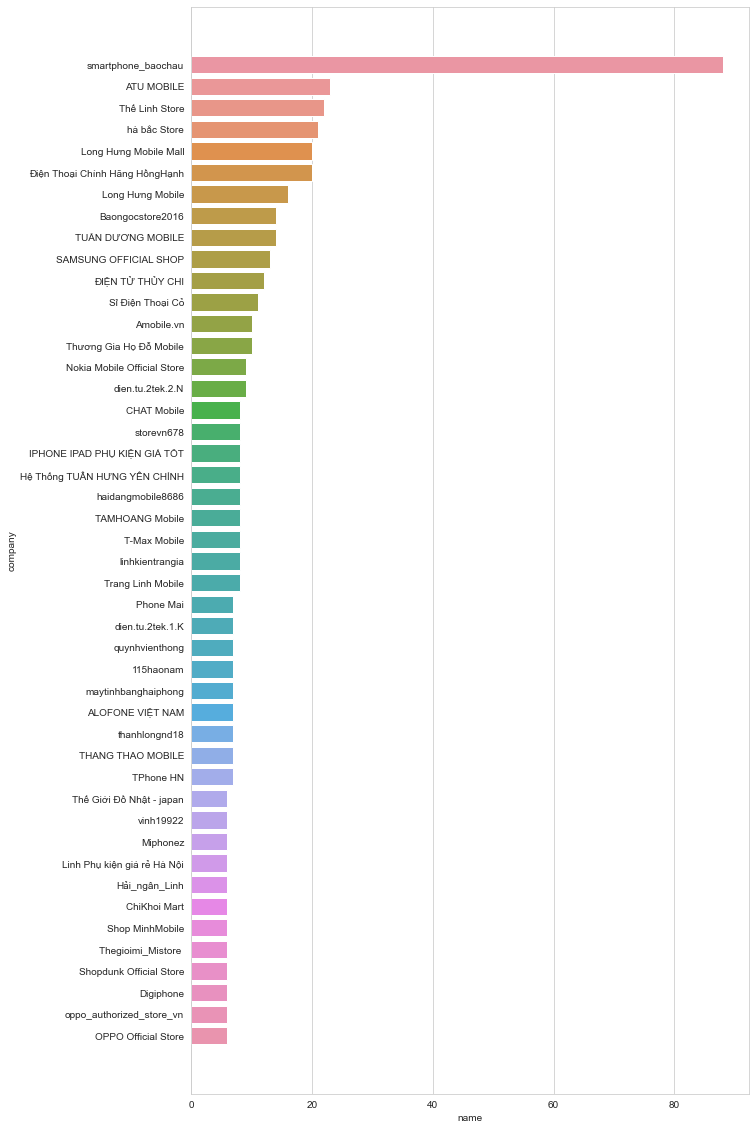

In [1546]:
plt.figure(figsize=(10,20))

sns.barplot(x= 'name',
            y = 'company',
            data = total_product_company[total_product_company['name'] > 5]
            )


plt.axis('tight')
plt.show()

In [1551]:
df_test[df_test['company'] == 'smartphone_baochau'].groupby('segmentation').count()['price'].reset_index()

segmentation  price
0        Low end     16
1        Mid end      3
2  Ultra Low-end     69

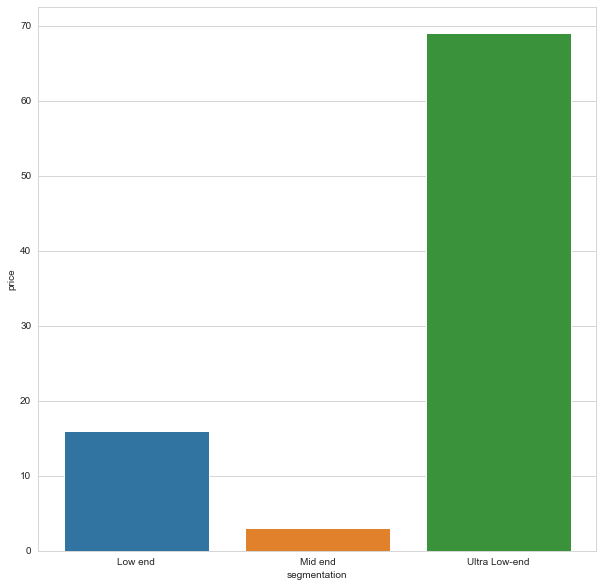

In [1556]:
plt.figure(figsize=(10,10))

sns.barplot(x= 'segmentation',
            y = 'price',
            data = df_test[df_test['company'] == 'smartphone_baochau'].groupby('segmentation').count()['price'].reset_index()
            )


plt.axis('tight')
plt.show()

In [1565]:
com_seg_num_pro = df_test.groupby(['company', 'segmentation']).count()['name'].reset_index()
com_seg_num_pro[com_seg_num_pro['company'] == 'ATU MOBILE']

company segmentation  name
12  ATU MOBILE      Low end    21
13  ATU MOBILE      Mid end     2

In [1569]:
df_test.head().T

1  \
name                             điện thoại vivo y20 (2021) 4gb + 64gb    
price                                                         3391500.0   
sold_out                                                        49000.0   
monthly_sold                                                     1800.0   
rating_product                                                     4.95   
rating_count_product                                              978.0   
inventory                                                        1711.0   
company                                             VIVO OFFICIAL STORE   
shop_name                                        vivo_official_store_vn   
shopee_mall_x                                                         1   
shop_total_review                                               67000.0   
total_products                                                       28   
response_rate                                                       1.0   
time_response                                                       0.0   
years_ex                                                           36.0   
follower                                                       170500.0   
store_location                                          TP. Hồ Chí Minh   
monthly_event                                                         1   
favorite_product                                                      0   
discount_tag                                                       0.15   
ShopDacBiet                                                           0   
product_url           https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...   
monthly_revenue                                            6104700000.0   
total_revenue                                            166183500000.0   
segmentation                                                    Low end   

                                                                      2  \
name                                               apple iphone 11 64gb   
price                                                        11513600.0   
sold_out                                                        35000.0   
monthly_sold                                                     1100.0   
rating_product                                                     4.83   
rating_count_product                                             1184.0   
inventory                                                           0.0   
company                                            Apple Flagship Store   
shop_name                                          apple_flagship_store   
shopee_mall_x                                                         1   
shop_total_review                                              185000.0   
total_products                                                      129   
response_rate                                                      0.99   
time_response                                                       0.0   
years_ex                                                           36.0   
follower                                                       311300.0   
store_location                                          TP. Hồ Chí Minh   
monthly_event                                                         1   
favorite_product                                                      0   
discount_tag                                                       0.36   
ShopDacBiet                                                           0   
product_url           https://shopee.vn/Apple-iPhone-11-64GB-i.88201...   
monthly_revenue                                           12664960000.0   
total_revenue                                            402976000000.0   
segmentation                                                   High end   

                                                                      3  \
name                  [hàng chính hãng 100%] nokia 1280, điện thoại ...   
price             

Segmentation và shopee_mall

In [1573]:
seg_mall = df_test.groupby(['segmentation', 'shopee_mall_x']).count()['name'].reset_index()
seg_mall

segmentation  shopee_mall_x  name
0          High end              0     7
1          High end              1     4
2           Low end              0   229
3           Low end              1    46
4           Mid end              0    63
5           Mid end              1    19
6   Mid to High end              0     9
7   Mid to High end              1     5
8           Premium              0     2
9           Premium              1     5
10    Ultra Low-end              0   785
11    Ultra Low-end              1    24

In [1585]:
seg_mall.groupby('segmentation')['name'].count()/ seg_mall.groupby('segmentation')['name'].sum()

segmentation
High end           0.181818
Low end            0.007273
Mid end            0.024390
Mid to High end    0.142857
Premium            0.285714
Ultra Low-end      0.002472
Name: name, dtype: float64

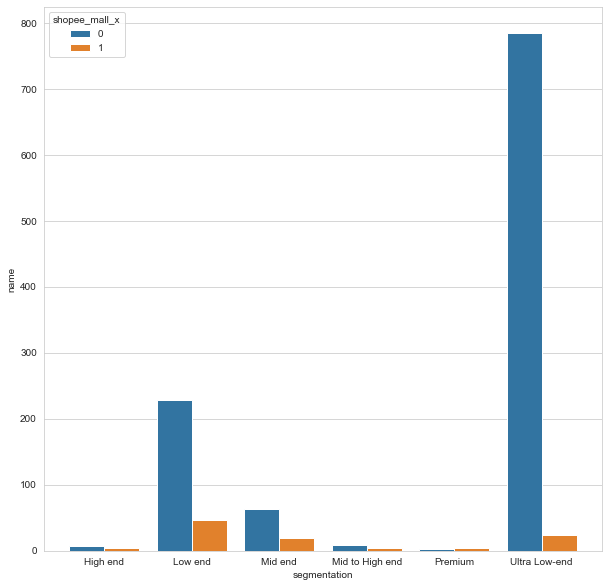

In [1574]:
plt.figure(figsize=(10,10))

sns.barplot(x= 'segmentation',
            y = 'name',
            data = seg_mall,
            hue= 'shopee_mall_x'
            )


plt.axis('tight')
plt.show()

Segmentation và ShopDacBiet

In [1575]:
seg_DacBiet = df_test.groupby(['segmentation', 'ShopDacBiet']).count()['name'].reset_index()
seg_DacBiet

segmentation  ShopDacBiet  name
0          High end            0     7
1          High end            1     4
2           Low end            0   137
3           Low end            1   138
4           Mid end            0    39
5           Mid end            1    43
6   Mid to High end            0     7
7   Mid to High end            1     7
8           Premium            0     5
9           Premium            1     2
10    Ultra Low-end            0   454
11    Ultra Low-end            1   355

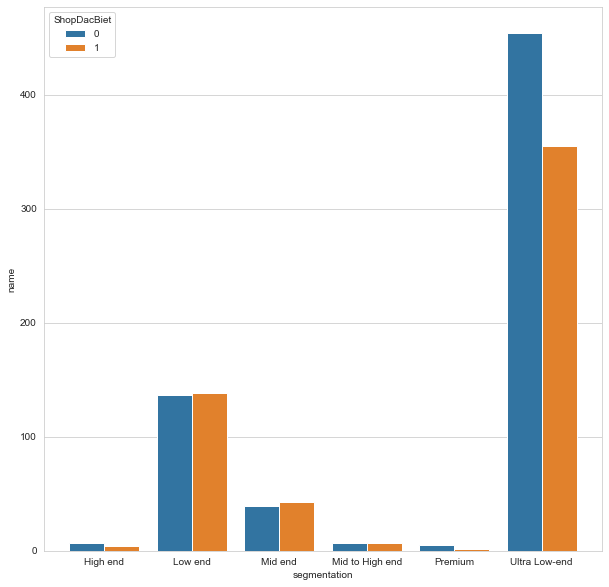

In [1576]:
plt.figure(figsize=(10,10))

sns.barplot(x= 'segmentation',
            y = 'name',
            data = seg_DacBiet,
            hue= 'ShopDacBiet'
            )


plt.axis('tight')
plt.show()

Segmentation và favorite_product

In [1577]:
seg_favor = df_test.groupby(['segmentation', 'favorite_product']).count()['name'].reset_index()
seg_favor

segmentation  favorite_product  name
0          High end                 0     9
1          High end                 1     2
2           Low end                 0   161
3           Low end                 1   114
4           Mid end                 0    50
5           Mid end                 1    32
6   Mid to High end                 0    11
7   Mid to High end                 1     3
8           Premium                 0     5
9           Premium                 1     2
10    Ultra Low-end                 0   467
11    Ultra Low-end                 1   342

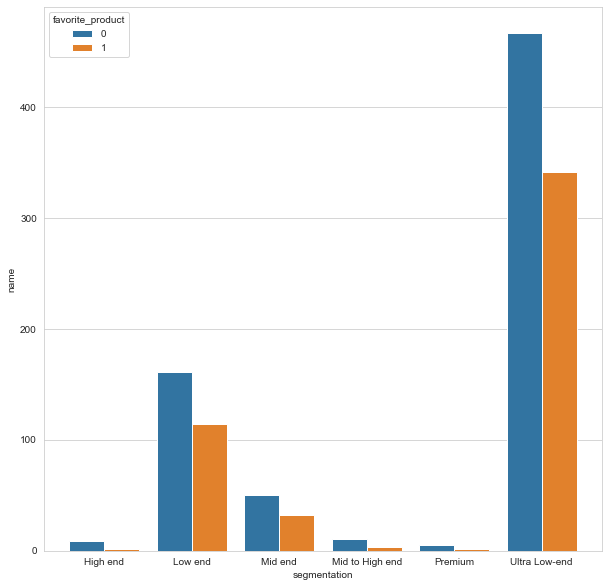

In [1578]:
plt.figure(figsize=(10,10))

sns.barplot(x= 'segmentation',
            y = 'name',
            data = seg_favor,
            hue= 'favorite_product'
            )


plt.axis('tight')
plt.show()

segmentation and monthly event

In [1579]:
seg_mo_event = df_test.groupby(['segmentation', 'monthly_event']).count()['name'].reset_index()
seg_mo_event

segmentation  monthly_event  name
0          High end              0     1
1          High end              1    10
2           Low end              0    52
3           Low end              1   223
4           Mid end              0     6
5           Mid end              1    76
6   Mid to High end              0     1
7   Mid to High end              1    13
8           Premium              1     7
9     Ultra Low-end              0   280
10    Ultra Low-end              1   529

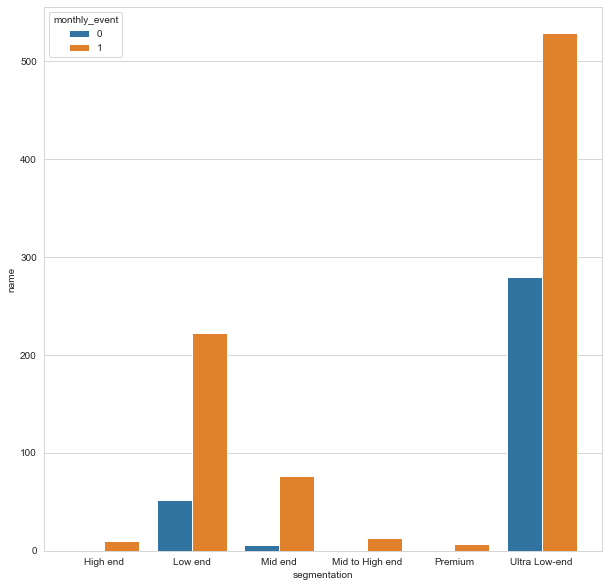

In [1580]:
plt.figure(figsize=(10,10))

sns.barplot(x= 'segmentation',
            y = 'name',
            data = seg_mo_event,
            hue= 'monthly_event'
            )


plt.axis('tight')
plt.show()

In [1583]:
df_test.groupby(['segmentation'])['name'].count()

segmentation
High end            11
Low end            275
Mid end             82
Mid to High end     14
Premium              7
Ultra Low-end      809
Name: name, dtype: int64

In [1584]:
df_test.groupby(['segmentation'])['name'].count().sum()

1198

Range of price in segmentation

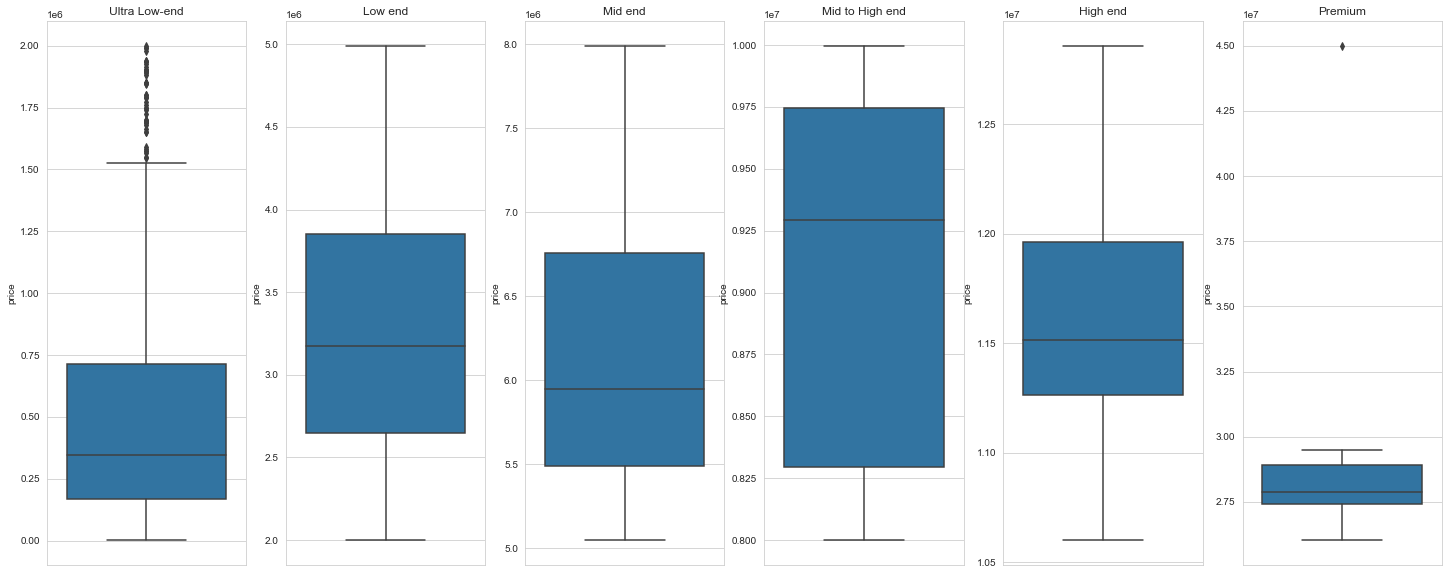

In [1593]:
plt.figure(figsize=(25,10))

plt.subplot(161)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Ultra Low-end'],
            y = 'price')
plt.title('Ultra Low-end')

plt.subplot(162)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Low end'],
            y = 'price')
plt.title('Low end')

plt.subplot(163)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Mid end'],
            y = 'price')
plt.title('Mid end')

plt.subplot(164)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Mid to High end'],
            y = 'price')
plt.title('Mid to High end')

plt.subplot(165)
sns.boxplot(data=df_test[df_test['segmentation'] == 'High end'],
            y = 'price')
plt.title('High end')

plt.subplot(166)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Premium'],
            y = 'price')
plt.title('Premium')

plt.show()

# User inter quantile range IRQ identify pricing outlier

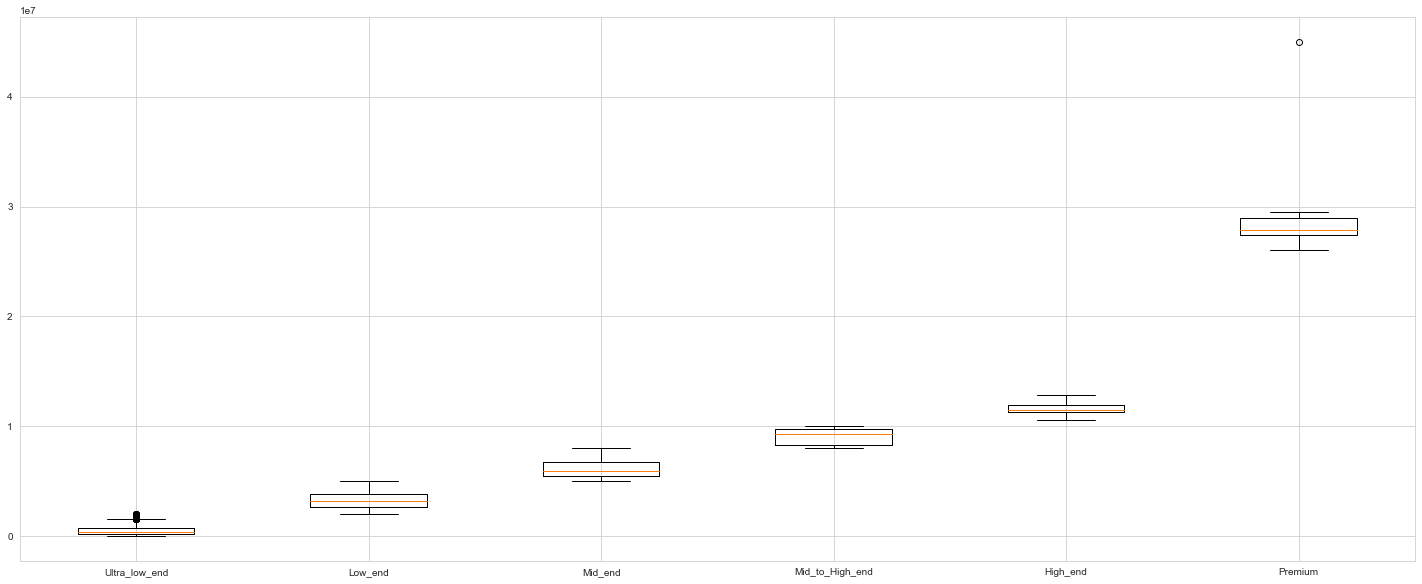

label  lower_whisker  lower_quartile      median  upper_quartile  \
0    Ultra_low_end        1979.01    1.662500e+05    344000.0        712320.0   
1          Low_end     2000000.00    2.650000e+06   3172540.0       3849500.0   
2          Mid_end     5049000.00    5.490000e+06   5948800.0       6760000.0   
3  Mid_to_High_end     8000000.00    8.296641e+06   9292450.0       9743700.0   
4         High_end    10601200.00    1.126220e+07  11513600.0      11964400.0   
5          Premium    26031600.00    2.743090e+07  27890000.0      28915950.0   

   upper_whisker  
0      1525200.0  
1      4990000.0  
2      7990000.0  
3      9996300.0  
4     12857300.0  
5     29490000.0

In [1611]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

Ultra_low_end       = df_test[df_test['segmentation'] == 'Ultra Low-end']['price']
Low_end             = df_test[df_test['segmentation'] == 'Low end']['price']
Mid_end             = df_test[df_test['segmentation'] == 'Mid end']['price']
Mid_to_High_end     = df_test[df_test['segmentation'] == 'Mid to High end']['price']
High_end            = df_test[df_test['segmentation'] == 'High end']['price']
Premium             = df_test[df_test['segmentation'] == 'Premium']['price']

labels = ['Ultra_low_end', 'Low_end', 'Mid_end', 'Mid_to_High_end', 'High_end', 'Premium']

plt.figure(figsize=(25,10))
bp = plt.boxplot([Ultra_low_end, Low_end, Mid_end, Mid_to_High_end, High_end, Premium], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

# Range of revenue

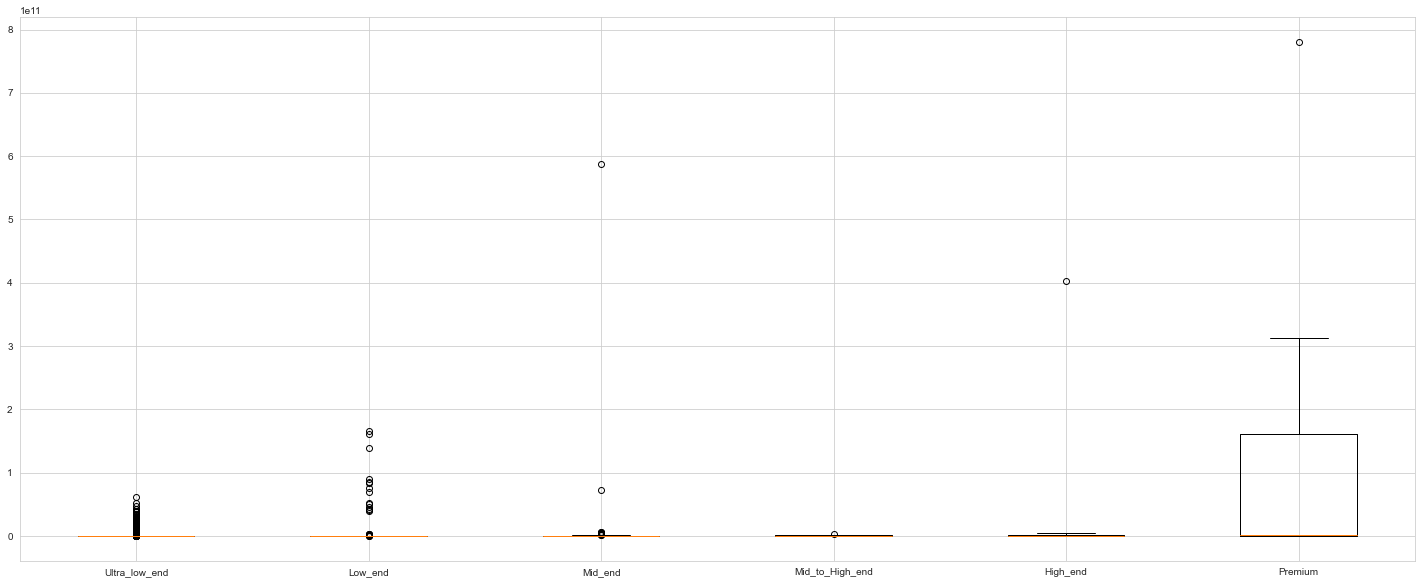

label  lower_whisker  lower_quartile        median  \
0    Ultra_low_end         8000.0       1890000.0  1.100000e+07   
1          Low_end      2000000.0      23899750.0  8.641529e+07   
2          Mid_end      6798800.0      53535600.0  1.767780e+08   
3  Mid_to_High_end      8000000.0     113607750.0  5.605482e+08   
4         High_end     12000000.0     196107250.0  3.786880e+08   
5          Premium     89980000.0     520010000.0  1.828380e+09   

   upper_quartile  upper_whisker  
0    6.027900e+07   1.457210e+08  
1    3.478062e+08   8.333300e+08  
2    7.631601e+08   1.377958e+09  
3    1.099026e+09   1.519913e+09  
4    2.426345e+09   5.284350e+09  
5    1.614187e+11   3.123792e+11

In [1613]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

Ultra_low_end       = df_test[df_test['segmentation'] == 'Ultra Low-end']['total_revenue']
Low_end             = df_test[df_test['segmentation'] == 'Low end']['total_revenue']
Mid_end             = df_test[df_test['segmentation'] == 'Mid end']['total_revenue']
Mid_to_High_end     = df_test[df_test['segmentation'] == 'Mid to High end']['total_revenue']
High_end            = df_test[df_test['segmentation'] == 'High end']['total_revenue']
Premium             = df_test[df_test['segmentation'] == 'Premium']['total_revenue']

labels = ['Ultra_low_end', 'Low_end', 'Mid_end', 'Mid_to_High_end', 'High_end', 'Premium']

plt.figure(figsize=(25,10))
bp = plt.boxplot([Ultra_low_end, Low_end, Mid_end, Mid_to_High_end, High_end, Premium], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

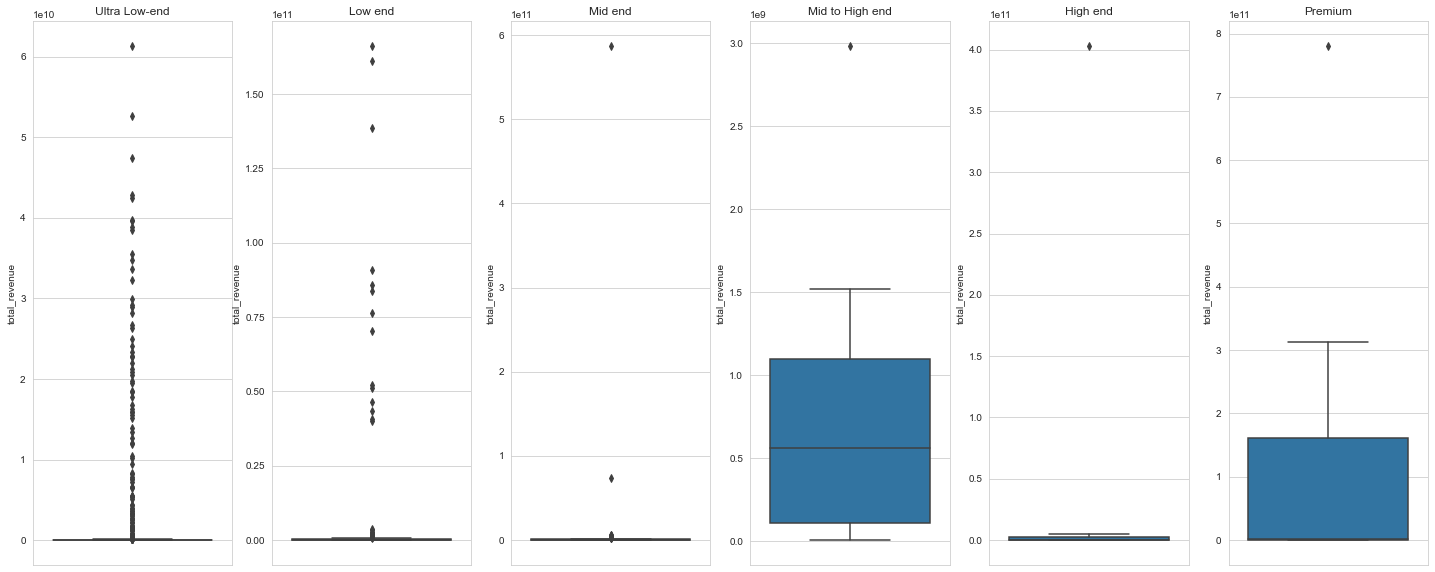

In [1614]:
plt.figure(figsize=(25,10))

plt.subplot(161)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Ultra Low-end'],
            y = 'total_revenue')
plt.title('Ultra Low-end')

plt.subplot(162)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Low end'],
            y = 'total_revenue')
plt.title('Low end')

plt.subplot(163)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Mid end'],
            y = 'total_revenue')
plt.title('Mid end')

plt.subplot(164)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Mid to High end'],
            y = 'total_revenue')
plt.title('Mid to High end')

plt.subplot(165)
sns.boxplot(data=df_test[df_test['segmentation'] == 'High end'],
            y = 'total_revenue')
plt.title('High end')

plt.subplot(166)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Premium'],
            y = 'total_revenue')
plt.title('Premium')

plt.show()

# Quantity sold

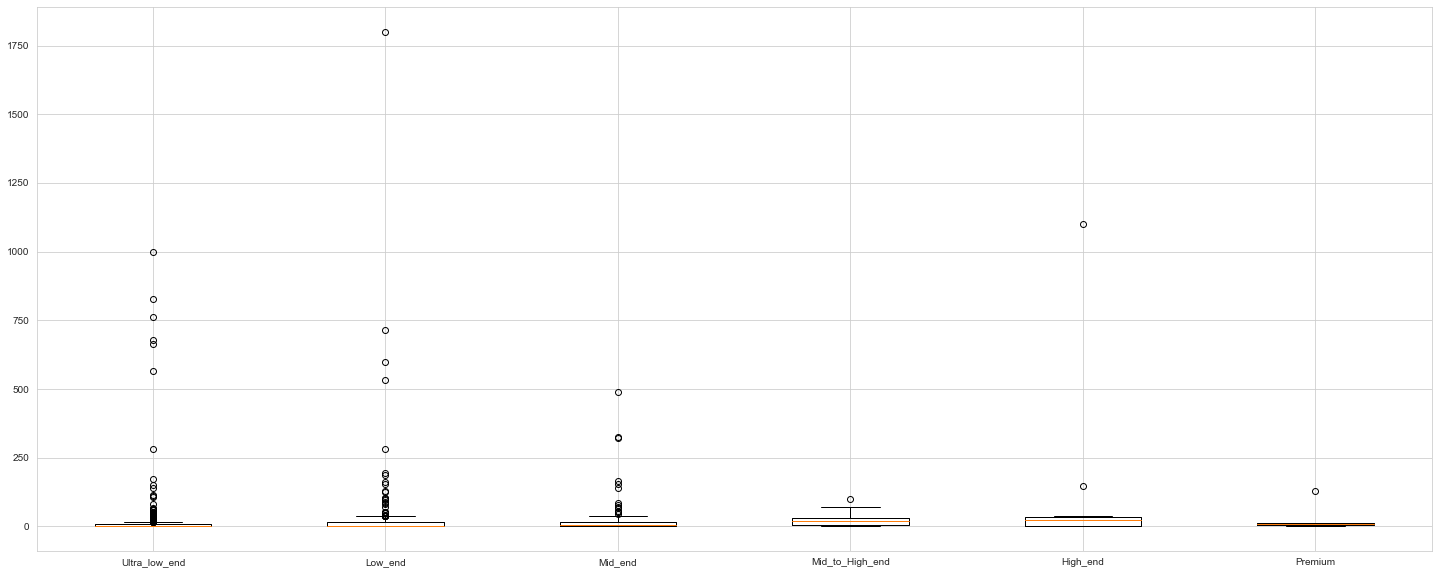

label  lower_whisker  lower_quartile  median  upper_quartile  \
0    Ultra_low_end            1.0            1.00     2.0             7.0   
1          Low_end            1.0            1.00     3.0            15.5   
2          Mid_end            1.0            1.00     4.0            16.0   
3  Mid_to_High_end            1.0            3.25    18.5            30.5   
4         High_end            1.0            1.50    24.0            35.0   
5          Premium            1.0            3.50     8.0            11.5   

   upper_whisker  
0           16.0  
1           36.0  
2           38.0  
3           70.0  
4           38.0  
5           14.0

In [1617]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

Ultra_low_end       = df_test[df_test['segmentation'] == 'Ultra Low-end']['monthly_sold']
Low_end             = df_test[df_test['segmentation'] == 'Low end']['monthly_sold']
Mid_end             = df_test[df_test['segmentation'] == 'Mid end']['monthly_sold']
Mid_to_High_end     = df_test[df_test['segmentation'] == 'Mid to High end']['monthly_sold']
High_end            = df_test[df_test['segmentation'] == 'High end']['monthly_sold']
Premium             = df_test[df_test['segmentation'] == 'Premium']['monthly_sold']

labels = ['Ultra_low_end', 'Low_end', 'Mid_end', 'Mid_to_High_end', 'High_end', 'Premium']

plt.figure(figsize=(25,10))
bp = plt.boxplot([Ultra_low_end, Low_end, Mid_end, Mid_to_High_end, High_end, Premium], labels=labels)
plt.axis('tight')
plt.show()

get_box_plot_data(labels, bp)

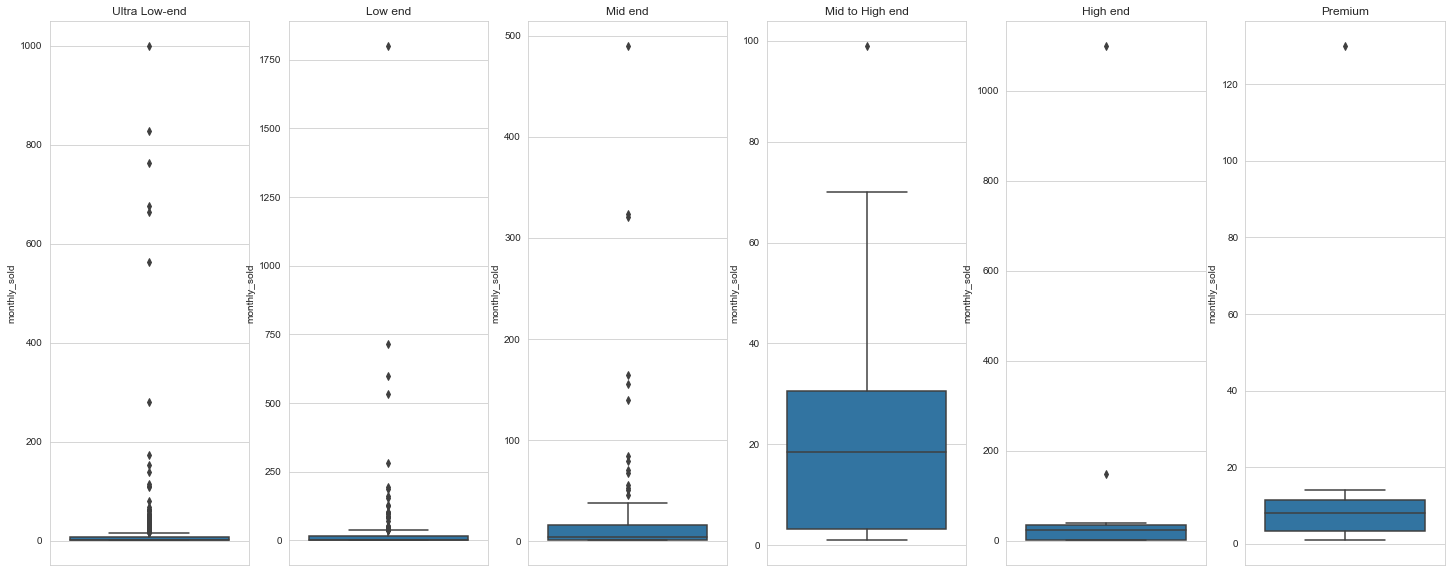

In [1618]:
plt.figure(figsize=(25,10))

plt.subplot(161)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Ultra Low-end'],
            y = 'monthly_sold')
plt.title('Ultra Low-end')

plt.subplot(162)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Low end'],
            y = 'monthly_sold')
plt.title('Low end')

plt.subplot(163)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Mid end'],
            y = 'monthly_sold')
plt.title('Mid end')

plt.subplot(164)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Mid to High end'],
            y = 'monthly_sold')
plt.title('Mid to High end')

plt.subplot(165)
sns.boxplot(data=df_test[df_test['segmentation'] == 'High end'],
            y = 'monthly_sold')
plt.title('High end')

plt.subplot(166)
sns.boxplot(data=df_test[df_test['segmentation'] == 'Premium'],
            y = 'monthly_sold')
plt.title('Premium')

plt.show()

In [1619]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 1 to 1696
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1212 non-null   object 
 1   price                 1212 non-null   float64
 2   sold_out              1212 non-null   float64
 3   monthly_sold          1212 non-null   float64
 4   rating_product        1212 non-null   float64
 5   rating_count_product  1212 non-null   float64
 6   inventory             1212 non-null   float64
 7   company               1212 non-null   object 
 8   shop_name             1212 non-null   object 
 9   shopee_mall_x         1212 non-null   int64  
 10  shop_total_review     1212 non-null   float64
 11  total_products        1212 non-null   object 
 12  response_rate         1212 non-null   float64
 13  time_response         1212 non-null   float64
 14  years_ex              1212 non-null   float64
 15  follower             

In [1681]:
df_test.T

1     \
name                             điện thoại vivo y20 (2021) 4gb + 64gb    
price                                                         3391500.0   
sold_out                                                        49000.0   
monthly_sold                                                     1800.0   
rating_product                                                     4.95   
rating_count_product                                              978.0   
inventory                                                        1711.0   
company                                             VIVO OFFICIAL STORE   
shop_name                                        vivo_official_store_vn   
shopee_mall_x                                                         1   
shop_total_review                                               67000.0   
total_products                                                       28   
response_rate                                                       1.0   
time_response                                                       0.0   
years_ex                                                           36.0   
follower                                                       170500.0   
store_location                                          TP. Hồ Chí Minh   
monthly_event                                                         1   
favorite_product                                                      0   
discount_tag                                                       0.15   
ShopDacBiet                                                           0   
product_url           https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...   
monthly_revenue                                            6104700000.0   
total_revenue                                            166183500000.0   
segmentation                                                    Low end   

                                                                   2     \
name                                               apple iphone 11 64gb   
price                                                        11513600.0   
sold_out                                                        35000.0   
monthly_sold                                                     1100.0   
rating_product                                                     4.83   
rating_count_product                                             1184.0   
inventory                                                           0.0   
company                                            Apple Flagship Store   
shop_name                                          apple_flagship_store   
shopee_mall_x                                                         1   
shop_total_review                                              185000.0   
total_products                                                      129   
response_rate                                                      0.99   
time_response                                                       0.0   
years_ex                                                           36.0   
follower                                                       311300.0   
store_location                                          TP. Hồ Chí Minh   
monthly_event                                                         1   
favorite_product                                                      0   
discount_tag                                                       0.36   
ShopDacBiet                                                           0   
product_url           https://shopee.vn/Apple-iPhone-11-64GB-i.88201...   
monthly_revenue                                           12664960000.0   
total_revenue                                            402976000000.0   
segmentation                                                   High end   

                                                                   3     \
name                  [hàng chính hãng 100%] nokia 1280, điện thoại ...   
price          

Mỗi dòng là 1 shop
Price median
keep inventory
company
shop_name
shopee_mall_x
total_products
follower
store_location
monthly_event
favorite_product
discount_tag
ShopDacBiet
len(tên shop)

predict: years_ex
MSE = 0 là bỏ thừa feature
Random forest
SVM